In [2]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# Interactive plots
%matplotlib notebook

# Load all packages used
import matplotlib.pyplot as plt
import numpy as np
import mypackage

TensorFlow version is 2.1.0


Using TensorFlow backend.


In [55]:
# # Load the dataset
# X, Y, info = mypackage.Dataset.load("data/tomra", only_with_contaminant=True)
# X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)

# X_test, X_train, scaler = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# # X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=3, plot=True)

# print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

In [33]:
wavelengths = mypackage.Dataset.TOMRA_WAVELENGTHS

# The fake dataset is by default a absorbance dataset
fake_data = mypackage.FakeDataset(wavelengths=wavelengths)
X, Y = fake_data.get_images(30)

X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(X, Y, testRatio=0.3)
# X_test, X_train, scaler = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=30, plot=False)

print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

[1 2] (9, 64, 64, 1) (0.13826331358403393, 3.504513132562035) (9, 64, 64, 208)


<IPython.core.display.Javascript object>


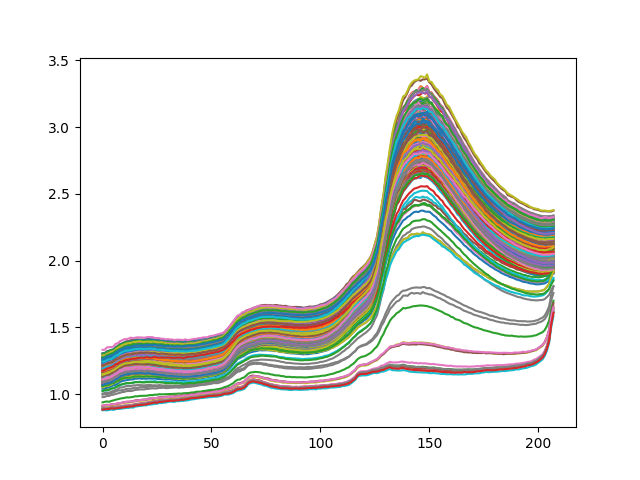

In [34]:
plt.figure()
numb, x, y, k = np.where(Y_test == 1)
index = np.random.choice(len(x), size=881, replace=False)
for i, j in zip(x[index], y[index]):
    plt.plot(X_test[0, i, j, :])
    

<IPython.core.display.Javascript object>


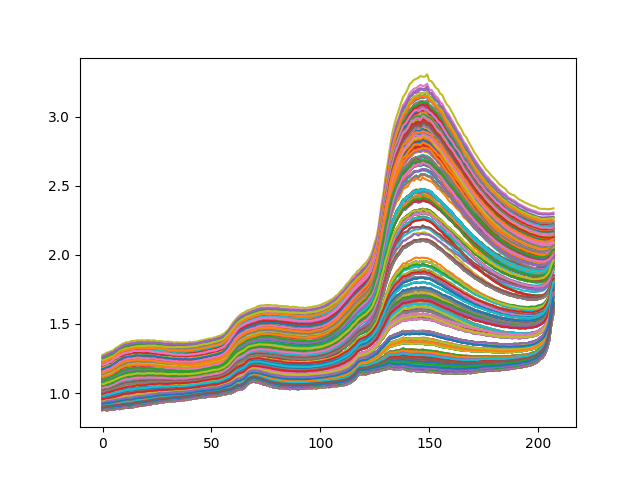

In [35]:
plt.figure()
numb, x, y, k = np.where(Y_test == 2)
for i, j in zip(x, y):
    plt.plot(X_test[0, i, j, :])

# Test the HybridSN

In [57]:
n_train = 16
n_test  = 4
model = mypackage.HybridSN(X_train[:n_train], Y_train[:n_train], X_test[:n_test], Y_test[:n_test])
model.summary()

count, n, m, k = (16, 64, 64, 30)
X.shape = (256, 256, 30)
X.shape = (256, 256, 30), Y.shape = (256, 256, 1)
count, n, m, k = (4, 64, 64, 30)
X.shape = (128, 128, 30)
X.shape = (128, 128, 30), Y.shape = (128, 128, 1)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 25, 25, 30, 1)     0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 23, 23, 24, 8)     512       
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 21, 21, 20, 16)    5776      
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 19, 19, 18, 32)    13856     
_________________________________________________________________
reshape_2 (Reshape)          (None, 19, 19, 576)       0         
________________________________________

In [58]:
model.train(epochs=4)

Epoch 1/4
66/66 [==============================] - 1955s 30s/step - loss: 0.0646 - accuracy: 0.9708 - val_loss: 0.0464 - val_accuracy: 0.9798

Epoch 00001: accuracy improved from -inf to 0.97085, saving model to HybridSN-best-model.hdf5
Epoch 2/4
66/66 [==============================] - 1951s 30s/step - loss: 0.0224 - accuracy: 0.9910 - val_loss: 0.0831 - val_accuracy: 0.9829

Epoch 00002: accuracy improved from 0.97085 to 0.99105, saving model to HybridSN-best-model.hdf5
Epoch 3/4
66/66 [==============================] - 1951s 30s/step - loss: 0.0180 - accuracy: 0.9926 - val_loss: 0.0991 - val_accuracy: 0.9823

Epoch 00003: accuracy improved from 0.99105 to 0.99261, saving model to HybridSN-best-model.hdf5
Epoch 4/4
66/66 [==============================] - 1950s 30s/step - loss: 0.0164 - accuracy: 0.9929 - val_loss: 0.0501 - val_accuracy: 0.9872

Epoch 00004: accuracy improved from 0.99261 to 0.99294, saving model to HybridSN-best-model.hdf5


<IPython.core.display.Javascript object>


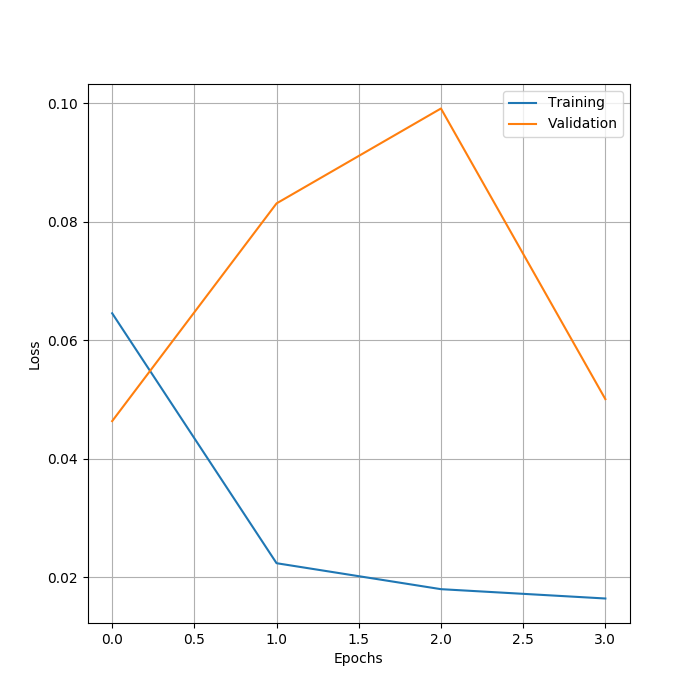

<IPython.core.display.Javascript object>


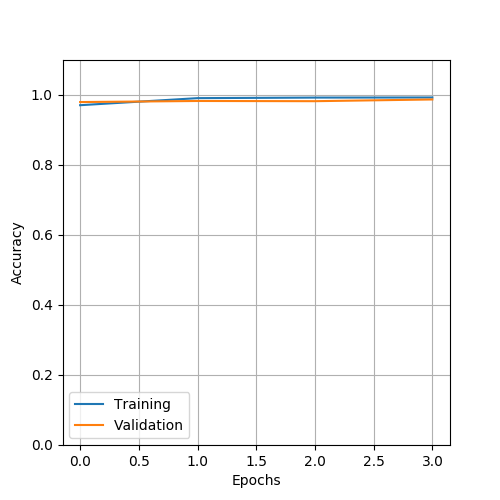

In [59]:
model.plot_training_results()

              precision    recall  f1-score   support

           1       0.99      1.00      0.99     35579
           2       0.94      0.74      0.83      1285

    accuracy                           0.99     36864
   macro avg       0.97      0.87      0.91     36864
weighted avg       0.99      0.99      0.99     36864



<IPython.core.display.Javascript object>


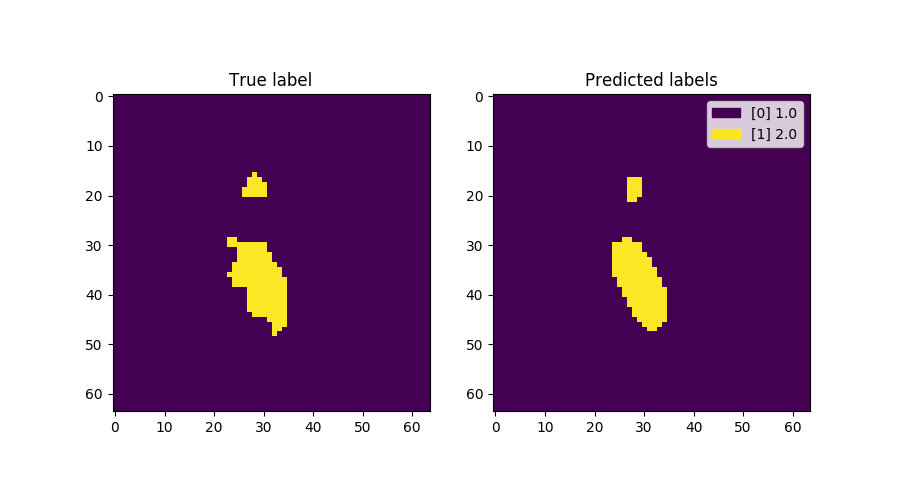

In [60]:
model.predict(X_test, Y_test)

In [43]:
_, n, m, k = X_test[:1].shape

margin = int((model.windowSize - 1) / 2)
selectable_pixels = model._HybridSN__get_selectable_pixels(n, m, margin)
y_pred_test = np.zeros((n, m))
# TODO: For each (r, c) do the prediction and collect the predictions to a reconstructed image
# _, x, y, _ = np.where(Y_test[:1] == 1)
# selectable_pixels = zip(x, y)
for r, c in selectable_pixels:
    patch = X_test[:1][:1, r - margin:marginr + margin + 1, c - margin:c + margin + 1]

    patch = patch.reshape(*(patch.shape), 1)
    prediction = model.model.predict(patch)
    y_pred_test[r - margin, c - margin] = np.argmax(prediction, axis=-1)

In [42]:
y_pred_test_NoChange = y_pred_test.copy()

<IPython.core.display.Javascript object>


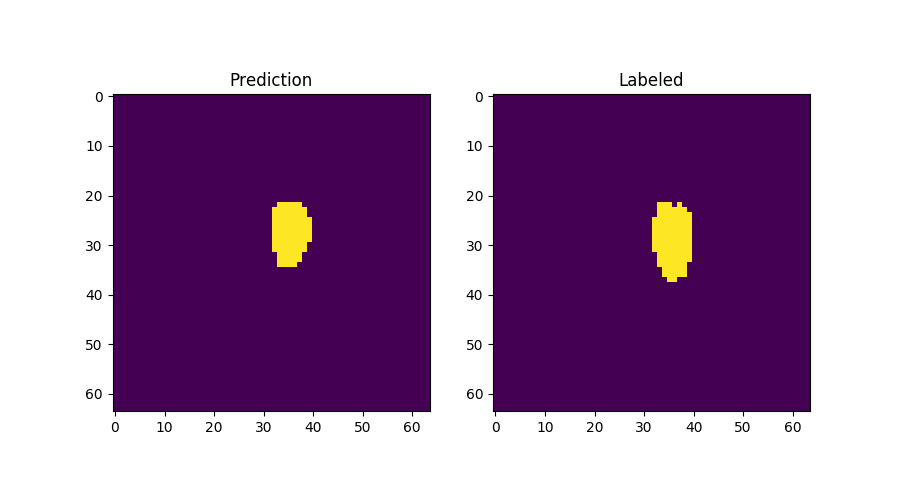

In [44]:
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.title("Prediction")
plt.imshow(y_pred_test)
plt.subplot(122)
plt.title("Labeled")
plt.imshow(Y_test[0, :, :, 0]);

In [50]:
X_pca = X_test[:, :, :, :3]
X_pca.shape

(9, 64, 64, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>


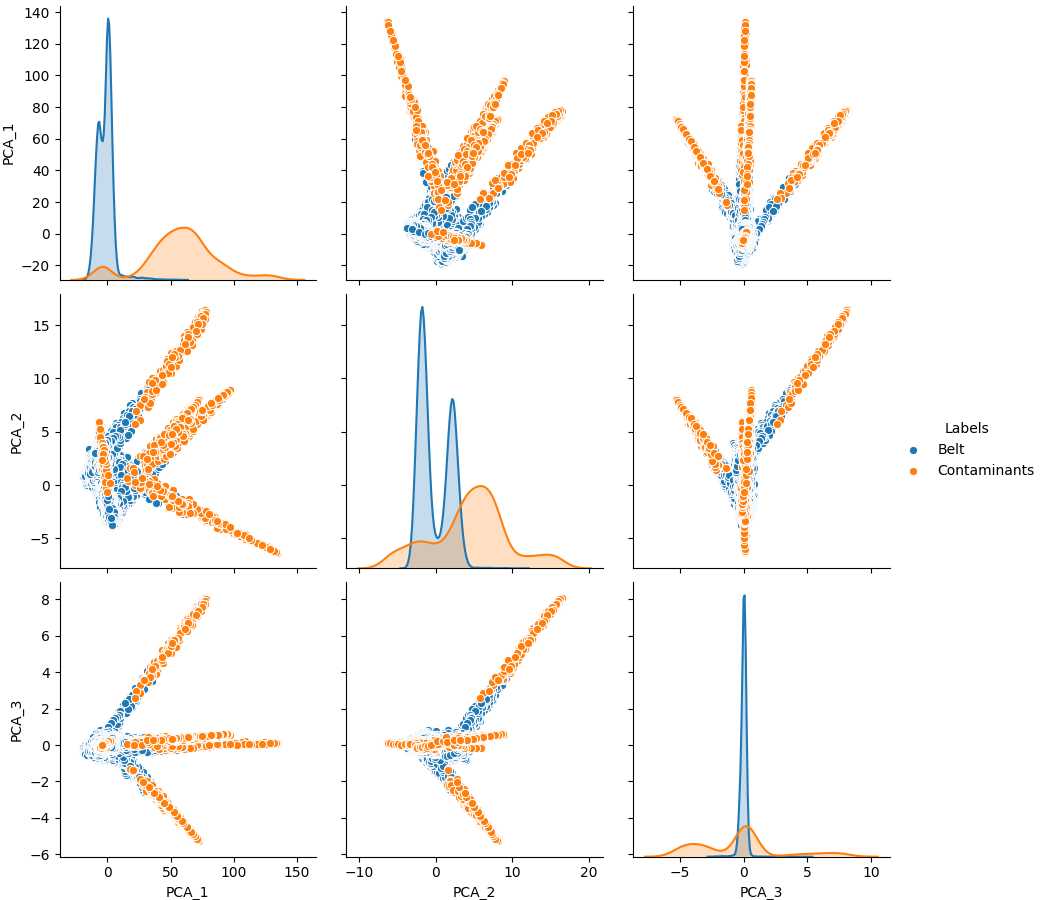

In [53]:
import seaborn as sns
import pandas as pd
X_pca = X_test[:, :, :, :3]
n_items, n, m, k = X_pca.shape
df = pd.DataFrame(X_pca.reshape((n_items*n*m, k)), columns=['PCA_1', 'PCA_2', 'PCA_3'])
df['Labels'] = Y_test.reshape((n_items*n*m, 1)).copy()
items = ['Belt', 'Contaminants']
for i, item in enumerate(items):
    df['Labels'][df['Labels'] == i+1] = item
sns.pairplot(df, hue='Labels', height=3)
plt.show()

<IPython.core.display.Javascript object>


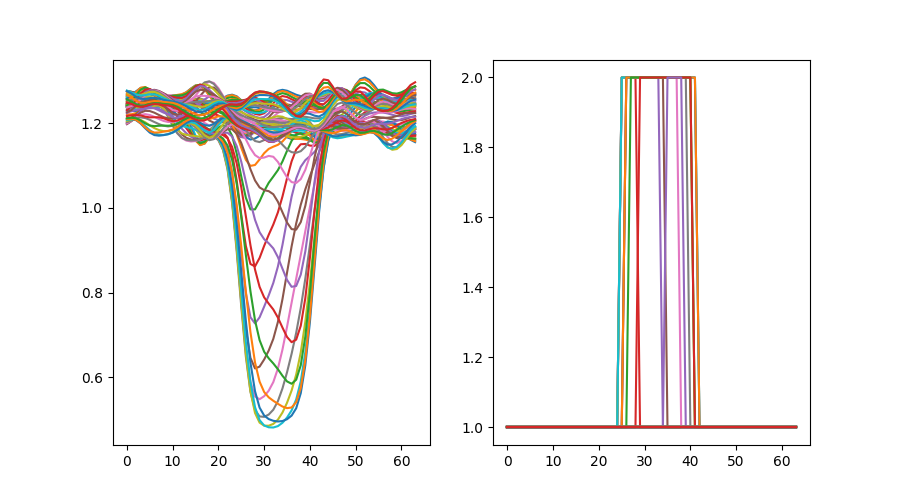

In [66]:
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.plot(X[0, :, :, 6])
plt.subplot(122)
plt.plot(Y[0, :, :, 0]);

<IPython.core.display.Javascript object>


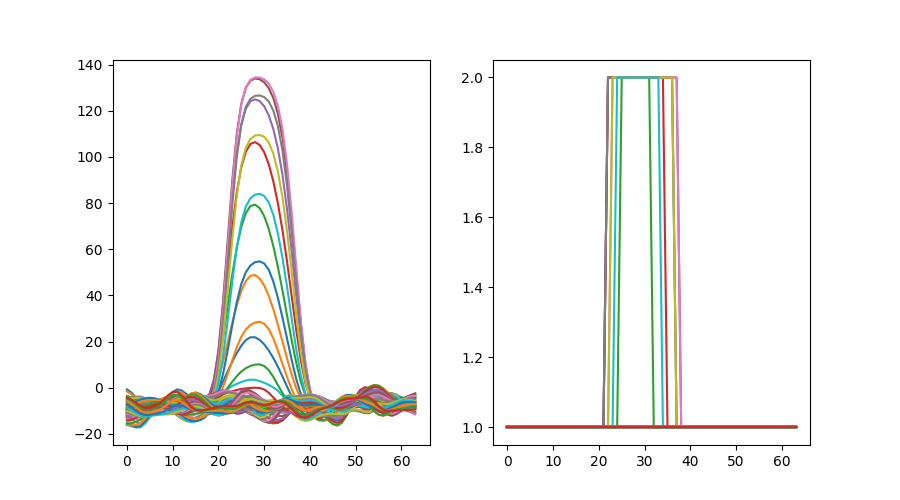

<IPython.core.display.Javascript object>


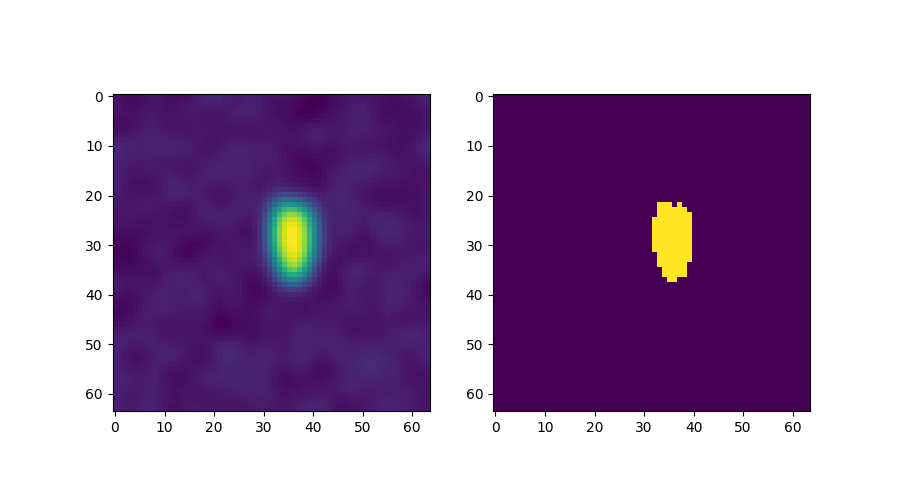

In [45]:
%matplotlib notebook

plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.plot(X_test[0, :, :, 0])
plt.subplot(122)
plt.plot(Y_test[0, :, :, 0]);

plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.title("Input image")
plt.imshow(X_test[0, :, :, 0])
plt.subplot(122)
plt.title("True label")
plt.imshow(Y_test[0, :, :, 0]);

# Testing SVM

In [3]:
# Load the real dataset
dataset_folder = "data/tomra"
obvious_plastics = ["20200213_120044_FM_fillet_repeat_sample_B_32", "20200213_120111_FM_fillet_repeat_sample_B_33", "20200213_120158_FM_fillet_repeat_sample_B_34", "20200213_120308_FM_fillet_repeat_sample_B_36", "20200213_120339_FM_fillet_repeat_sample_B_37", "20200213_120359_FM_fillet_repeat_sample_B_38"]
X, Y, info = mypackage.Dataset.load_files(obvious_plastics, dataset_folder, only_one_contaminant_type=True)

enlarged_X, enlarged_Y = mypackage.Dataset.make_zoomed_in_dataset(X, Y, size=32, sample_multiplication=10, contaminant_type=3)

X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(enlarged_X, enlarged_Y, testRatio=0.3)

# X_test, X_train, _ = mypackage.Dataset.scale(X_test, X_train, scaler='GlobalStandardization')
# # X_test, X_train = mypackage.Dataset.PCA(X_test, X_train, n_components=30, plot=True, whiten=True)

print(np.unique(Y_test), Y_test.shape, (X_test.min(), X_test.max()), X_test.shape)

[1. 2. 3.] (18, 32, 32, 1) (1.6682685613632202, 54.98072052001953) (18, 32, 32, 208)


In [5]:
# # Load the real dataset
# dataset_folder = "data/tomra"
# obvious_plastics = ["20200213_120044_FM_fillet_repeat_sample_B_32", "20200213_120111_FM_fillet_repeat_sample_B_33", "20200213_120158_FM_fillet_repeat_sample_B_34", "20200213_120308_FM_fillet_repeat_sample_B_36", "20200213_120339_FM_fillet_repeat_sample_B_37"]
# X_train, Y_train, info = mypackage.Dataset.load_files(obvious_plastics, dataset_folder, only_one_contaminant_type=True)
# X_train, Y_train = mypackage.Dataset.make_zoomed_in_dataset(X_train, Y_train, size=32, sample_multiplication=5, contaminant_type=3)

# X_test, Y_test, info = mypackage.Dataset.load_files(["20200213_120359_FM_fillet_repeat_sample_B_38"], dataset_folder, only_one_contaminant_type=True)
# X_train, Y_train = mypackage.Dataset.make_zoomed_in_dataset(X_test, Y_test, size=32, sample_multiplication=5, contaminant_type=3)

In [7]:
X, Y, info = mypackage.Dataset.load("data/tomra", only_with_contaminant=True)

enlarged_X, enlarged_Y = mypackage.Dataset.make_zoomed_in_dataset(X, Y, size=32, sample_multiplication=7, contaminant_type=3)

X_train, X_test, Y_train, Y_test = mypackage.Dataset.train_test_split(enlarged_X, enlarged_Y, testRatio=0.3)

              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97     11314
         2.0       0.96      0.98      0.97     34859
         3.0       0.97      0.82      0.89      6051

    accuracy                           0.96     52224
   macro avg       0.96      0.93      0.94     52224
weighted avg       0.96      0.96      0.96     52224



<IPython.core.display.Javascript object>


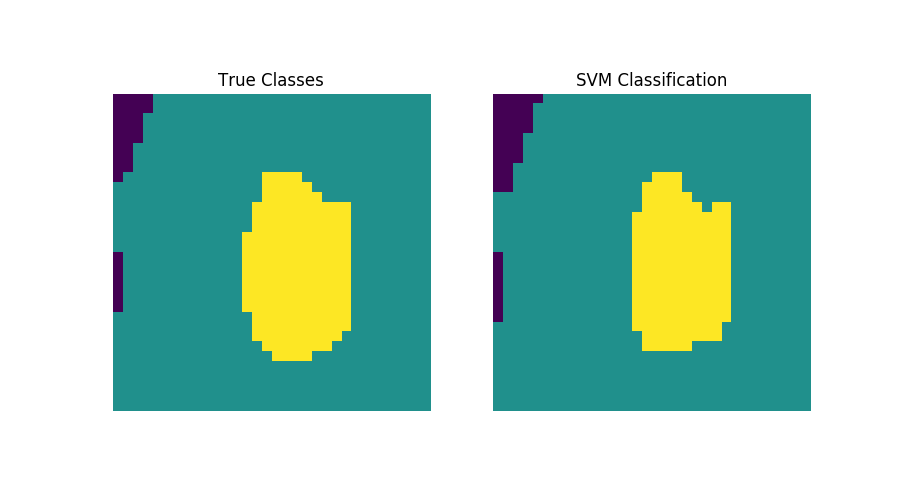

In [8]:
from sklearn import svm
from sklearn.metrics import classification_report

train = mypackage.StackTransform(X_train, Y_train)
test = mypackage.StackTransform(X_test, Y_test)

svc_classifier = svm.SVC(C=1, kernel='rbf', decision_function_shape='ovr')
svc_classifier.fit(train.X_stack(), train.Y_stack().ravel())
Y_hat = svc_classifier.predict(test.X_stack())
classification = classification_report(test.Y_stack(), Y_hat) # .flatten()
print(classification)

Y_hat = test.Unstack(Y_hat, k=1)

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.title("True Classes")
plt.imshow(np.squeeze(Y_test[0]))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("SVM Classification")
plt.imshow(np.squeeze(Y_hat[0]))
plt.axis('off');

              precision    recall  f1-score   support

           1       0.99      0.99      0.99    200211
           2       0.95      0.97      0.96     36685
           3       0.95      0.78      0.86      3104

    accuracy                           0.99    240000
   macro avg       0.97      0.92      0.94    240000
weighted avg       0.99      0.99      0.99    240000



<IPython.core.display.Javascript object>


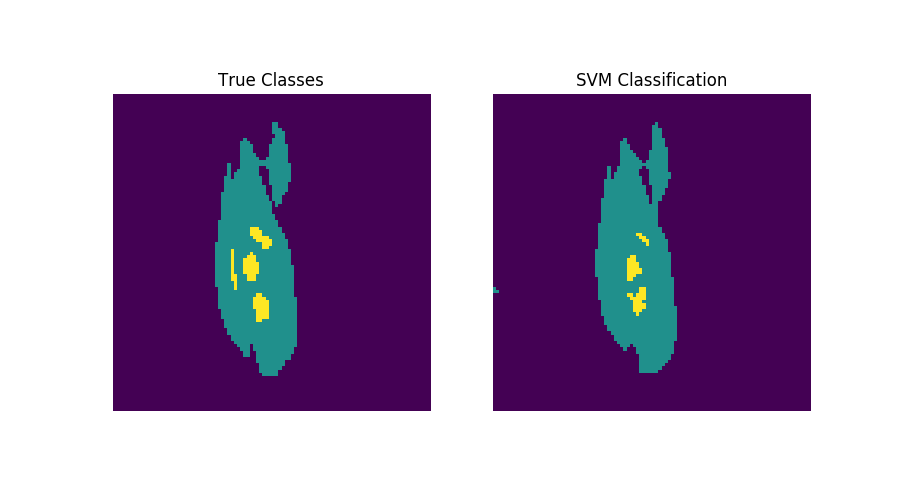

<IPython.core.display.Javascript object>


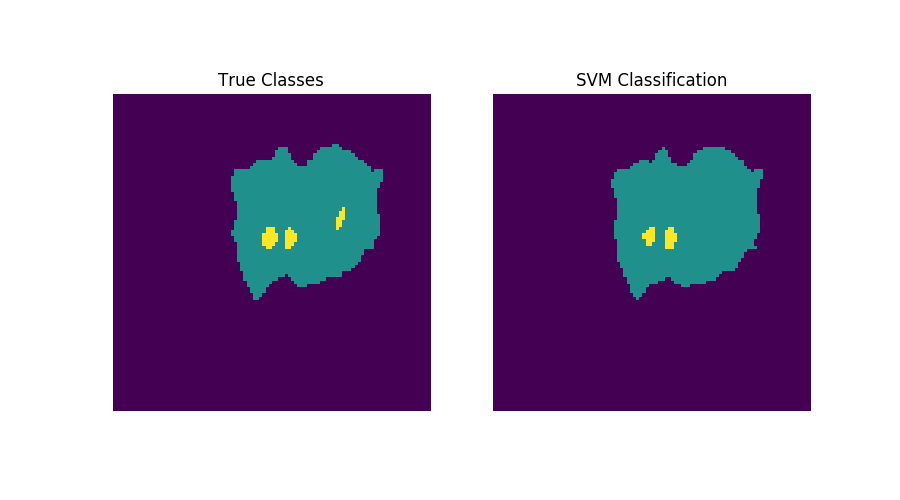

<IPython.core.display.Javascript object>


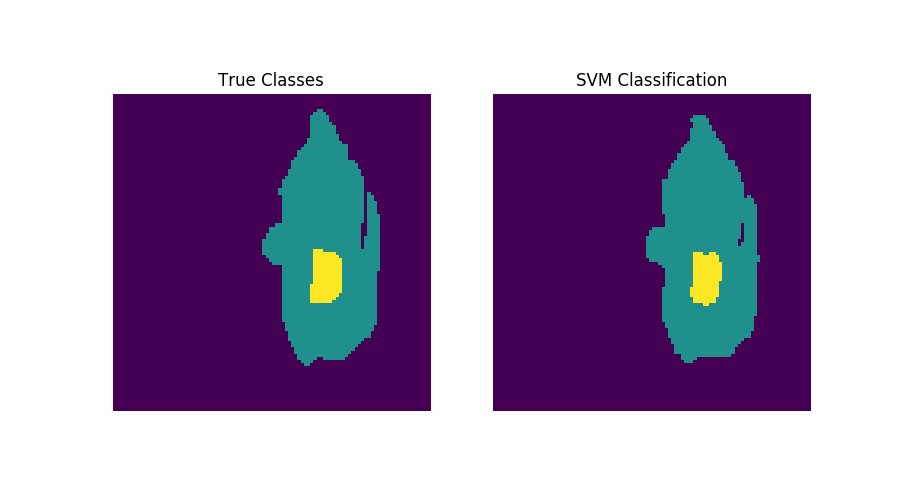

<IPython.core.display.Javascript object>


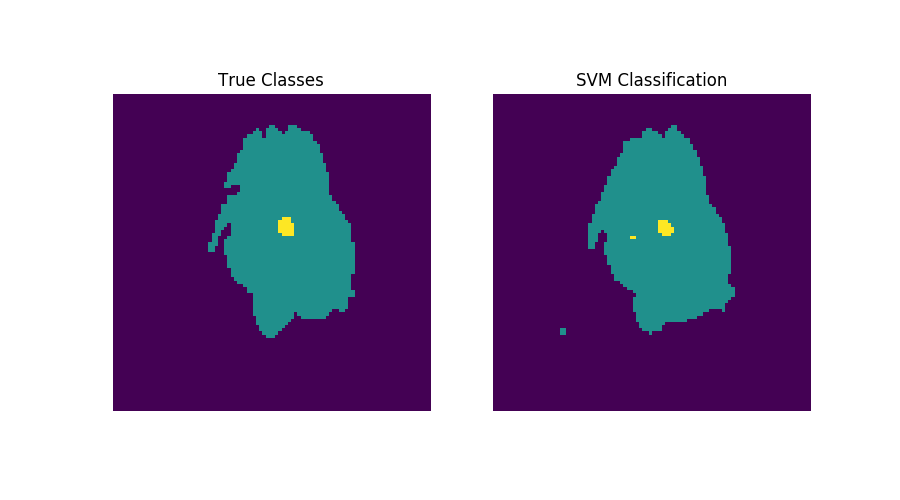

<IPython.core.display.Javascript object>


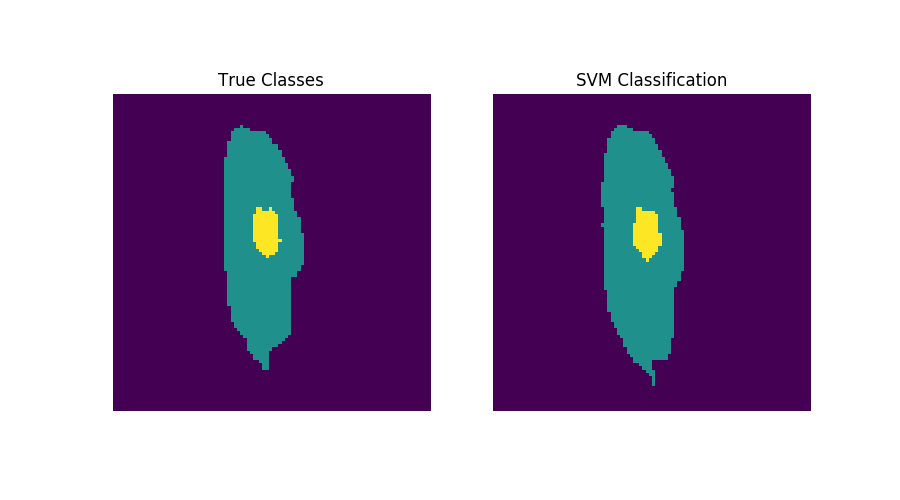

<IPython.core.display.Javascript object>


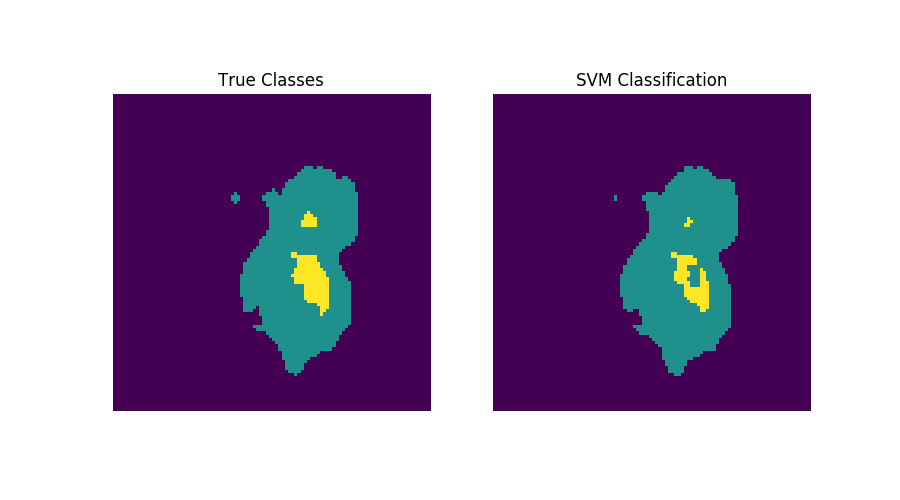

<IPython.core.display.Javascript object>


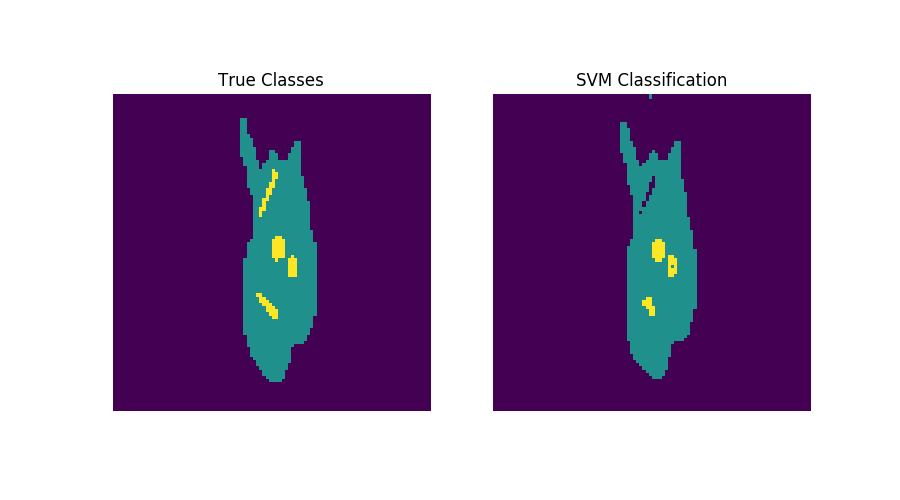

<IPython.core.display.Javascript object>


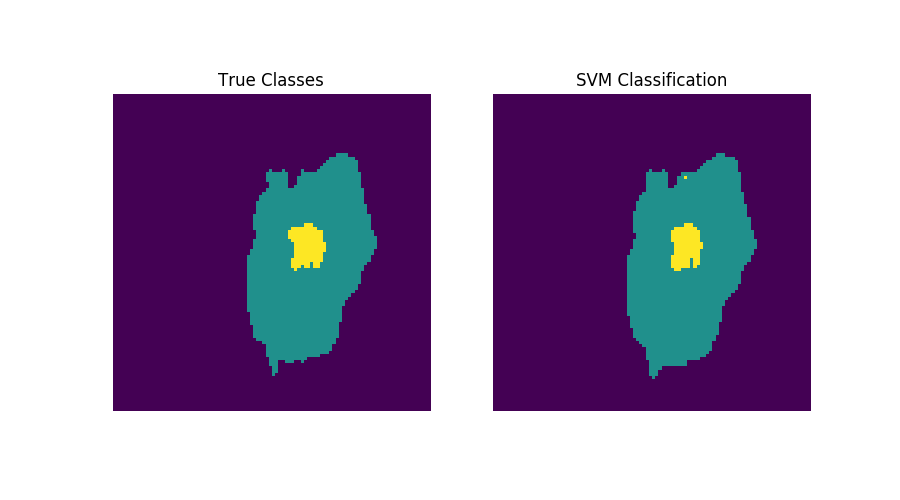

<IPython.core.display.Javascript object>


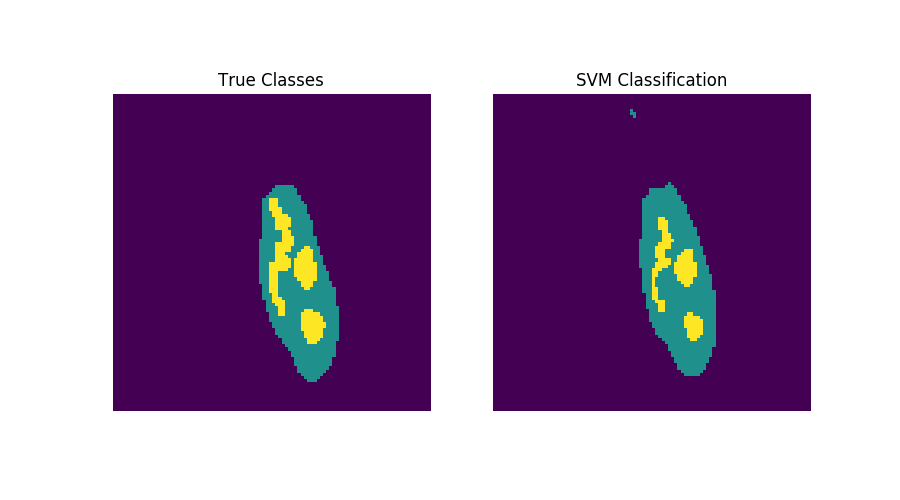

<IPython.core.display.Javascript object>


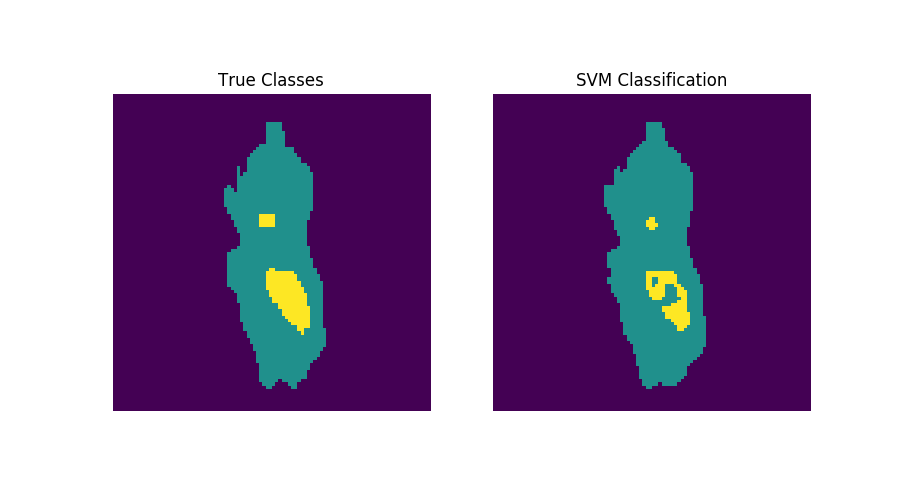

<IPython.core.display.Javascript object>


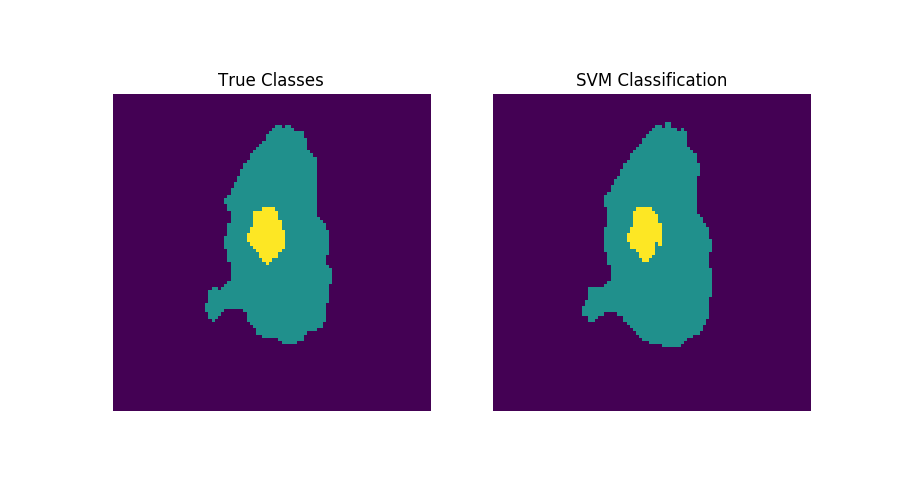

<IPython.core.display.Javascript object>


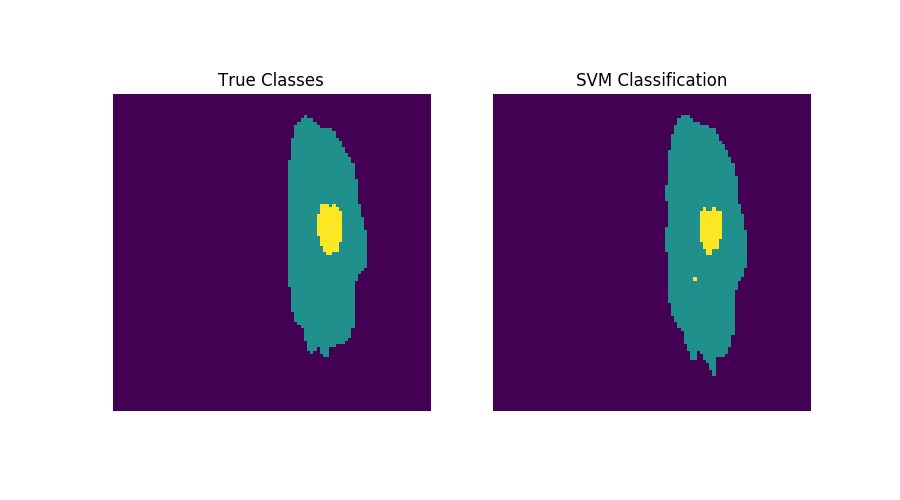

<IPython.core.display.Javascript object>


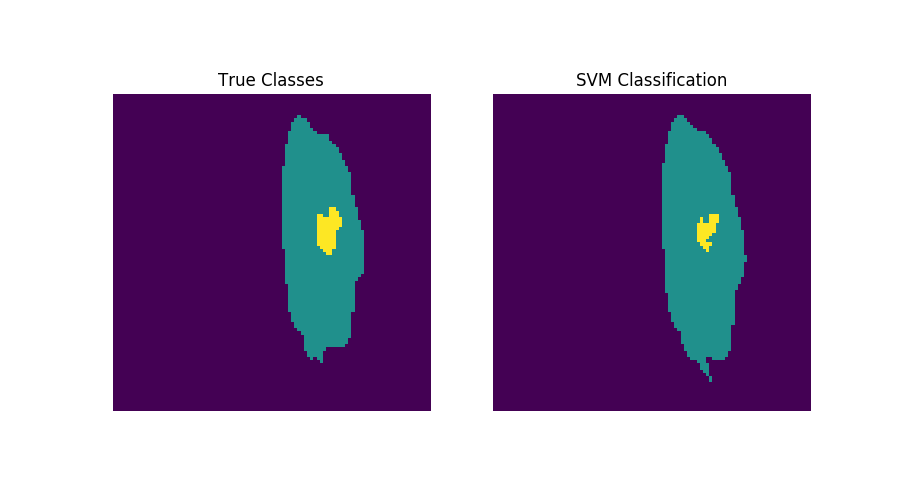

<IPython.core.display.Javascript object>


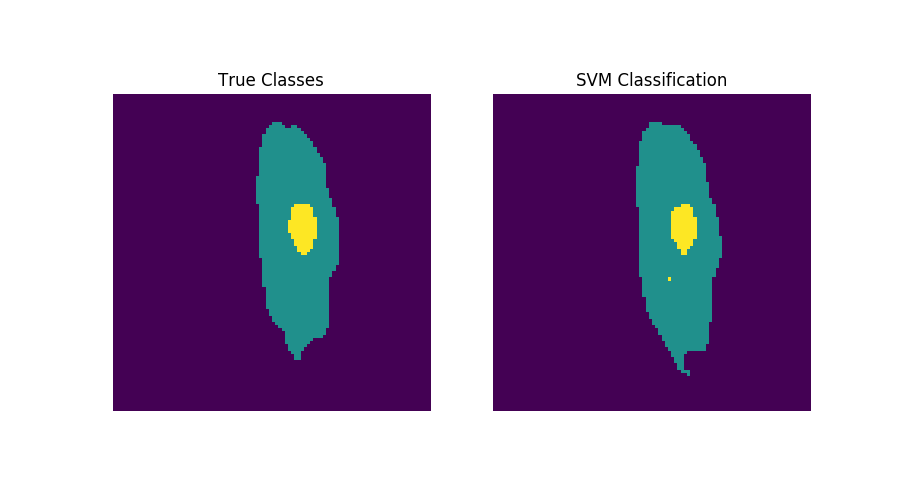

<IPython.core.display.Javascript object>


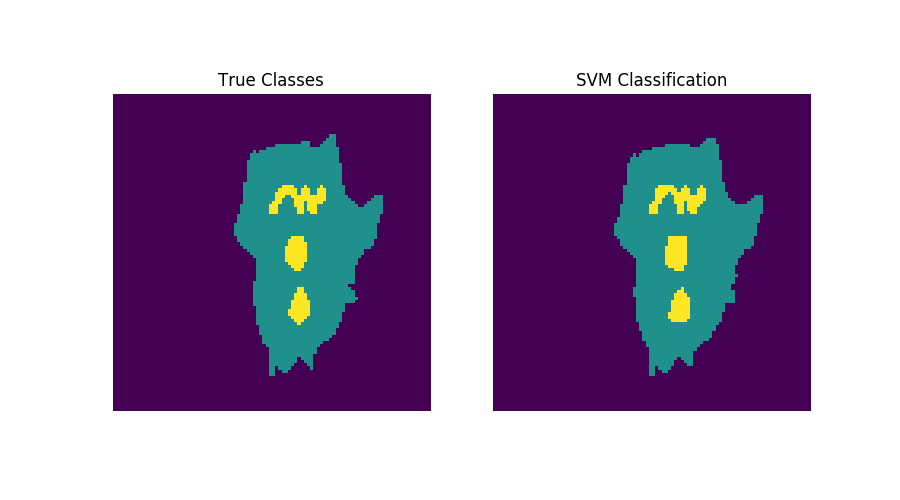

<IPython.core.display.Javascript object>


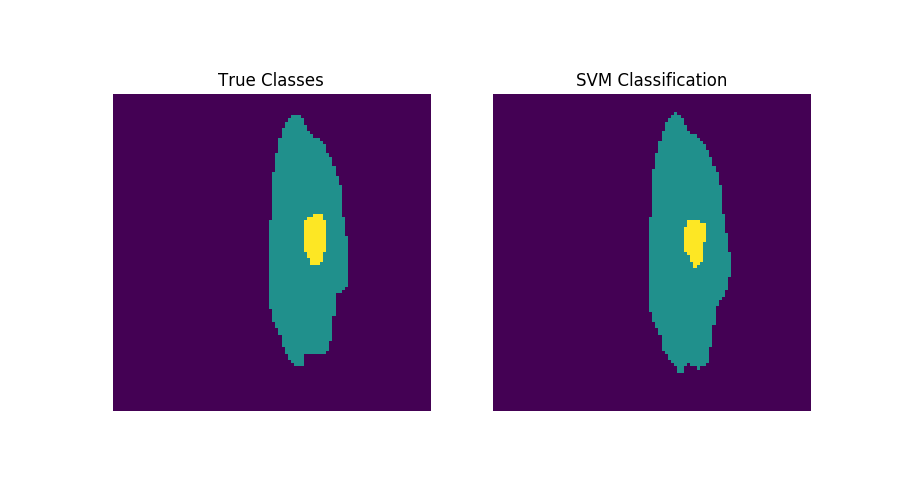

<IPython.core.display.Javascript object>


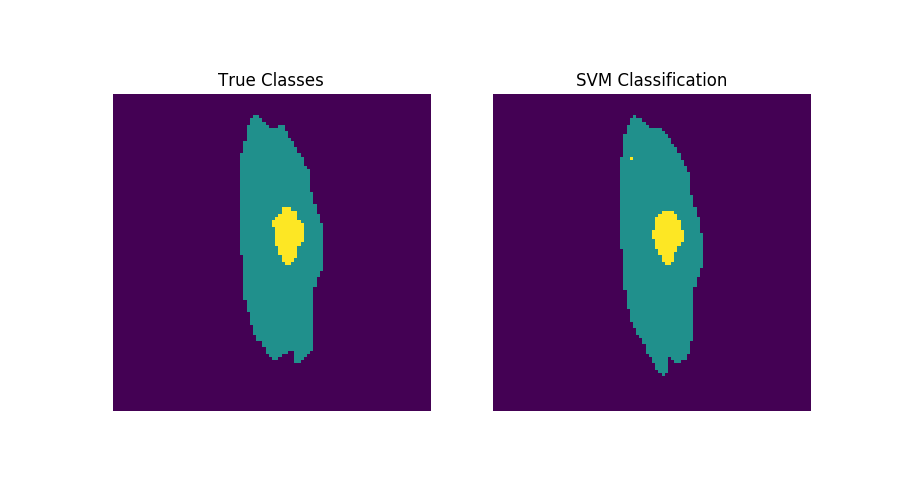

<IPython.core.display.Javascript object>


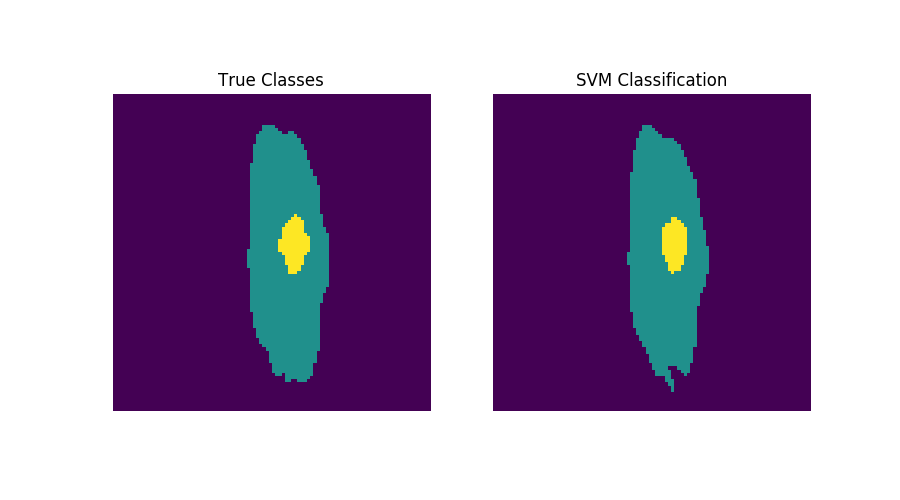

<IPython.core.display.Javascript object>


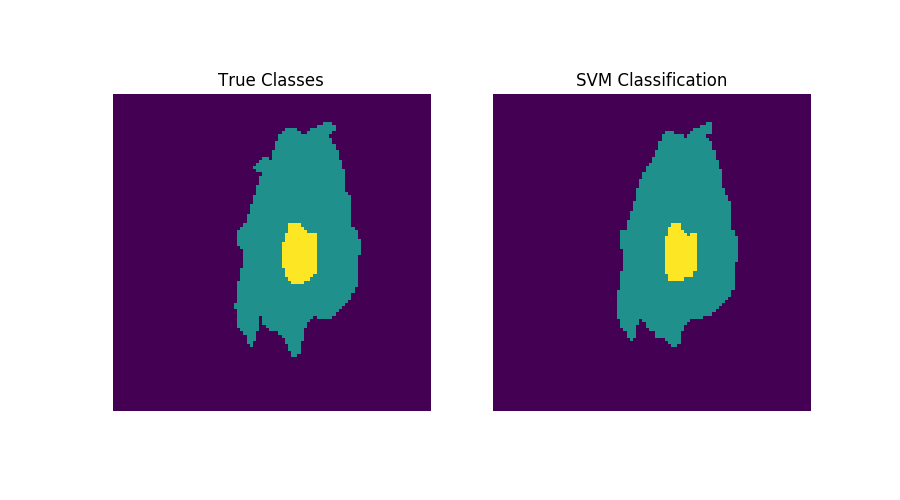

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


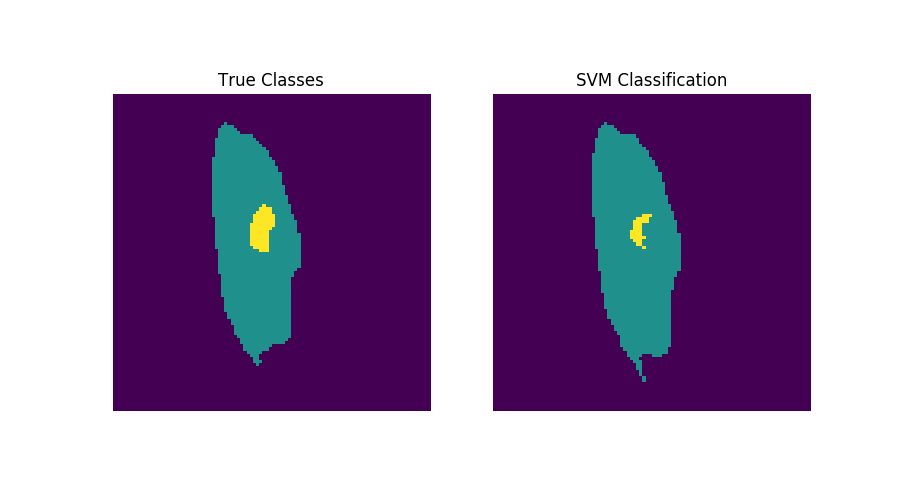

<IPython.core.display.Javascript object>


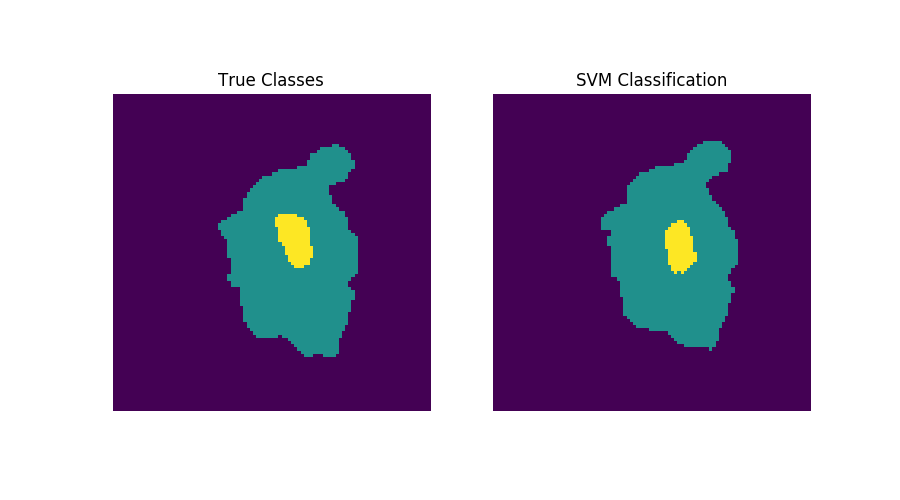

<IPython.core.display.Javascript object>


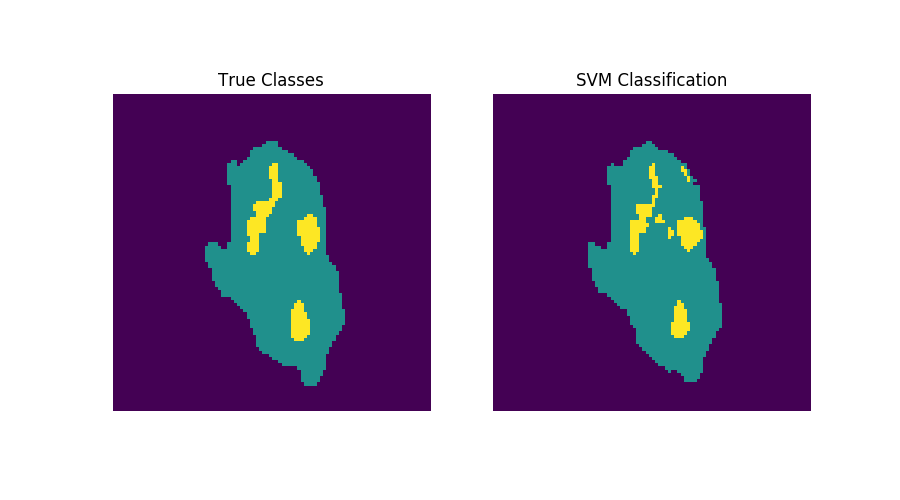

<IPython.core.display.Javascript object>


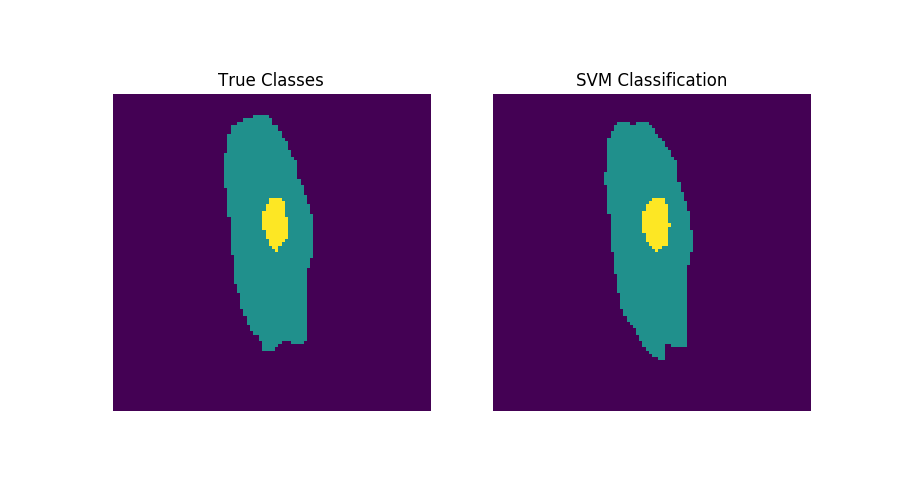

<IPython.core.display.Javascript object>


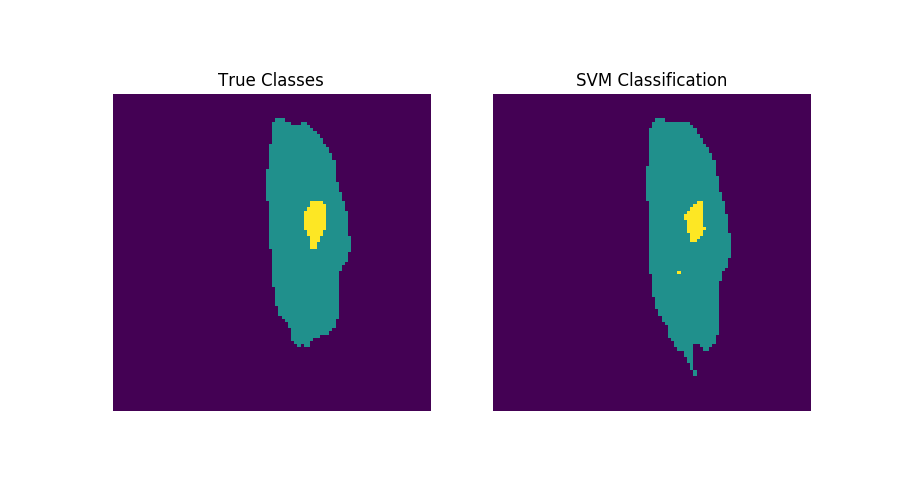

In [13]:
# data = mypackage.StackTransform(X, Y)
# Y_hat = svc_classifier.predict(data.X_stack())
classification = classification_report(data.Y_stack(), Y_hat) # .flatten()
print(classification)

Y_hat = data.Unstack(Y_hat, k=1)

for i in range(len(X)):
    plt.figure(figsize=(9, 5))
    plt.subplot(1, 2, 1)
    plt.title("True Classes")
    plt.imshow(np.squeeze(Y[i]))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title("SVM Classification")
    plt.imshow(np.squeeze(Y_hat[i]))
    plt.axis('off');


# Testing Logistic Regression

0.8807215853322128
For all test data the weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8807
F1_score = 0.9644
Precision_score = 0.9644
Recall_score = 0.9644


/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


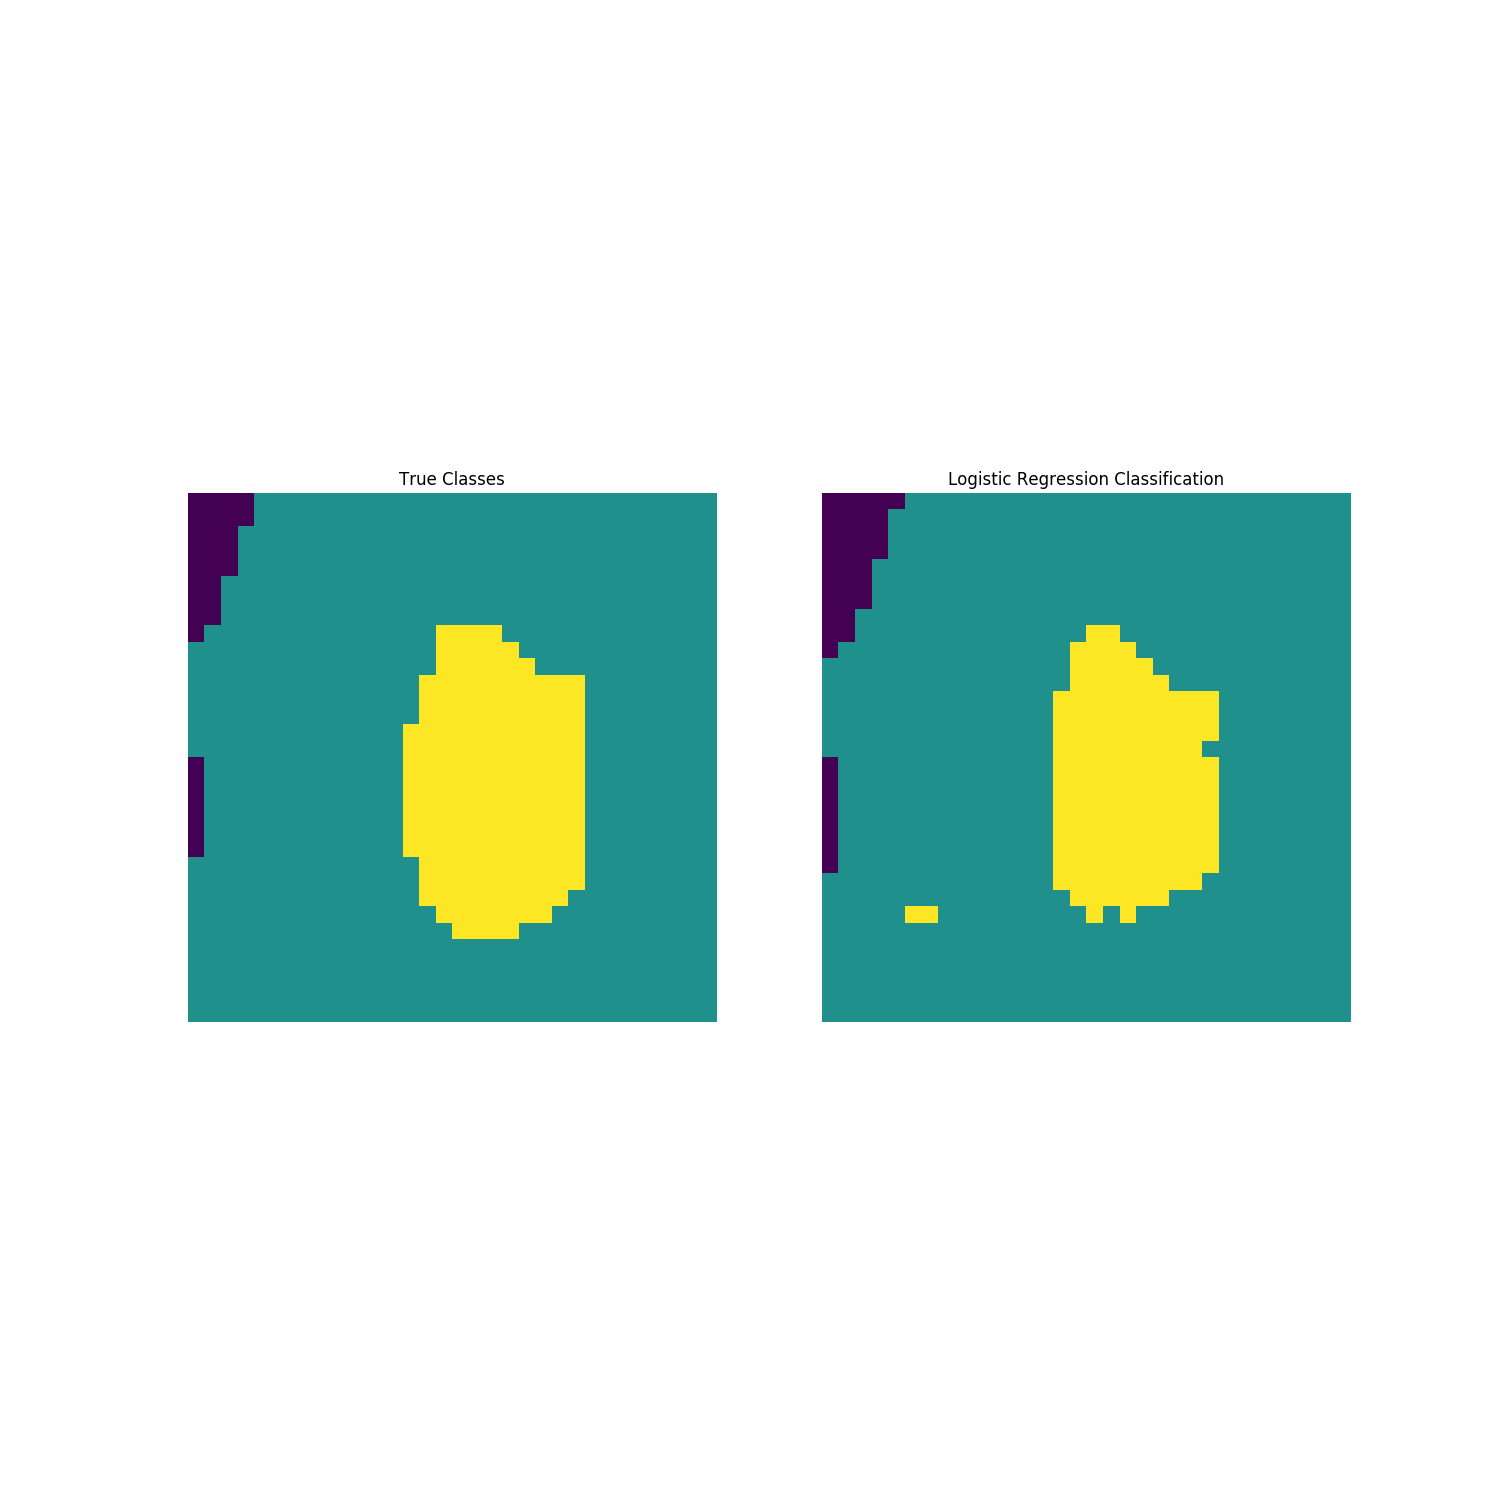

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8575


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


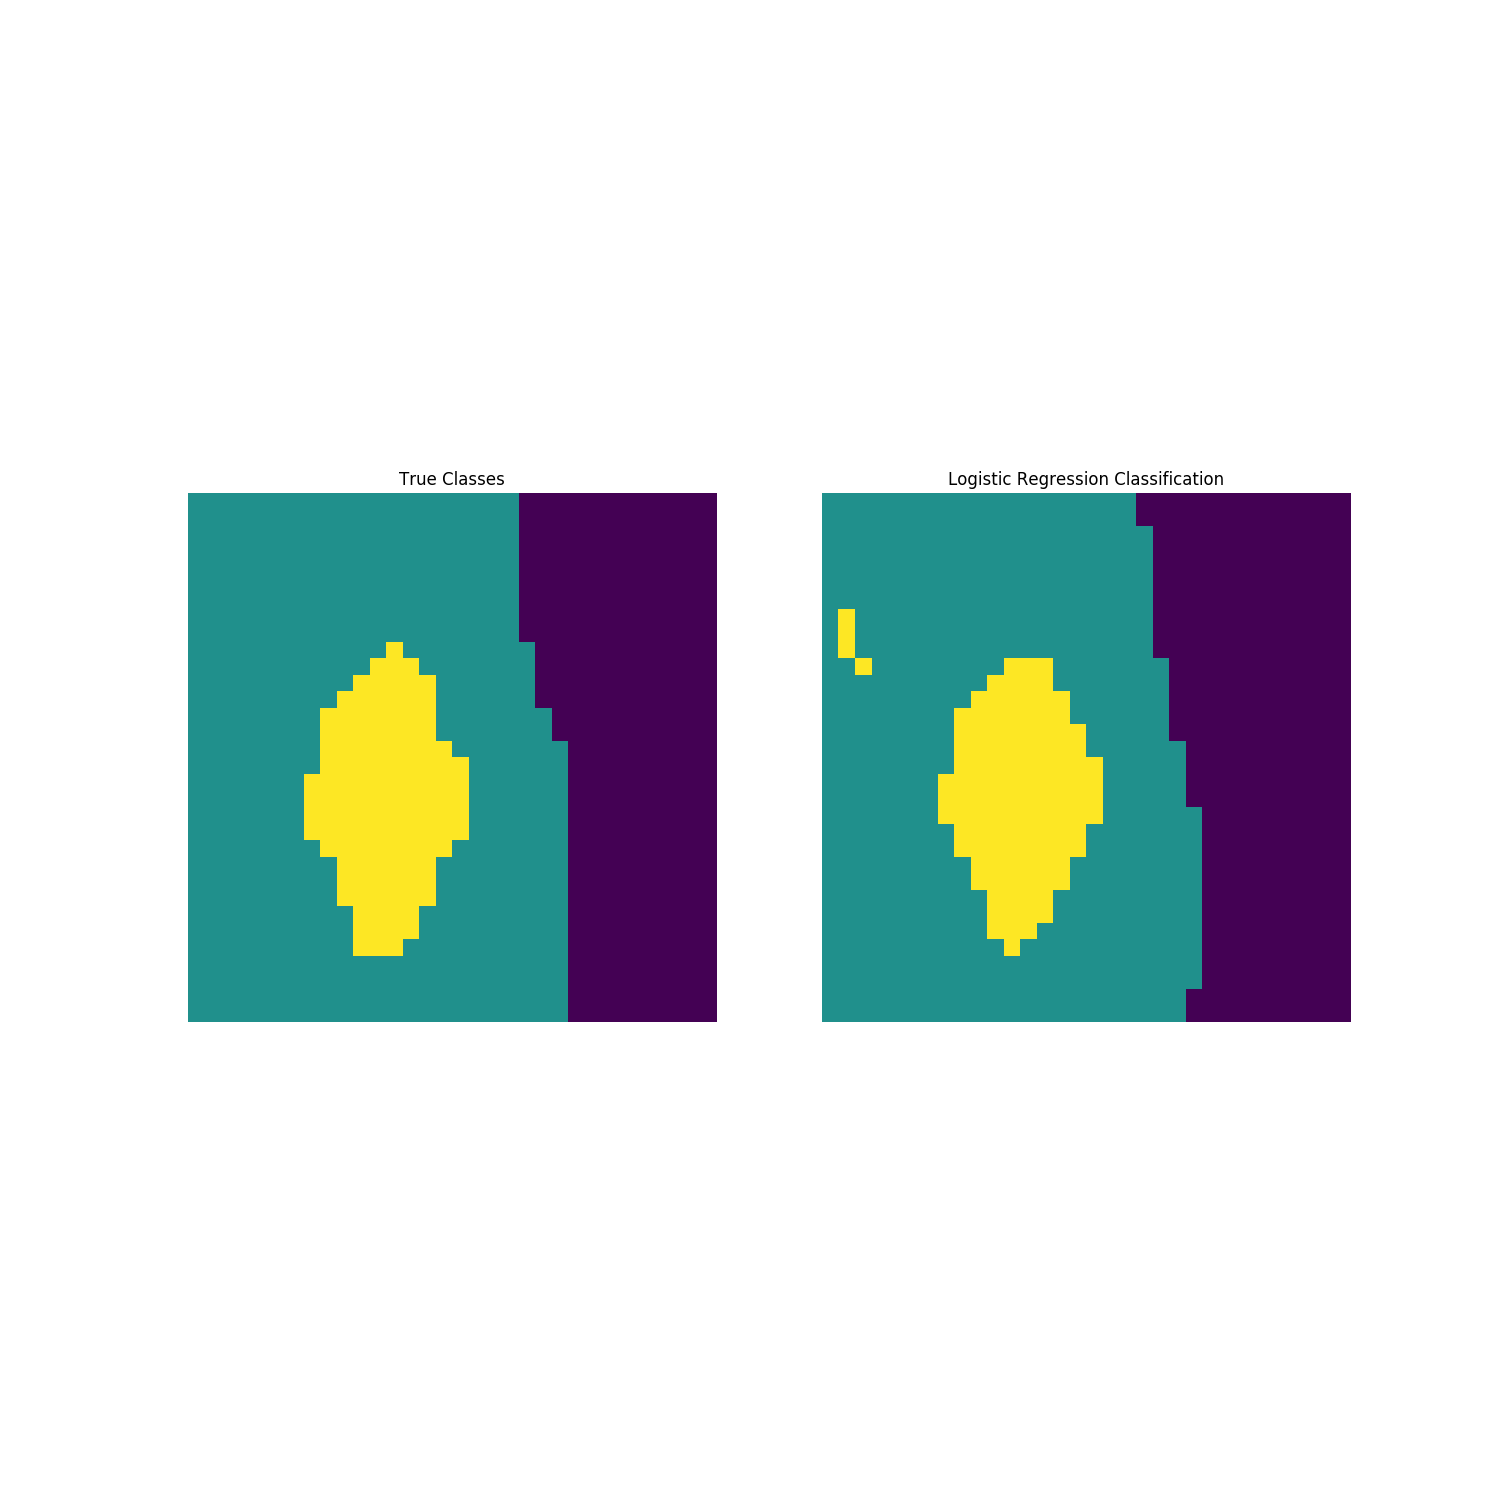

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9354


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


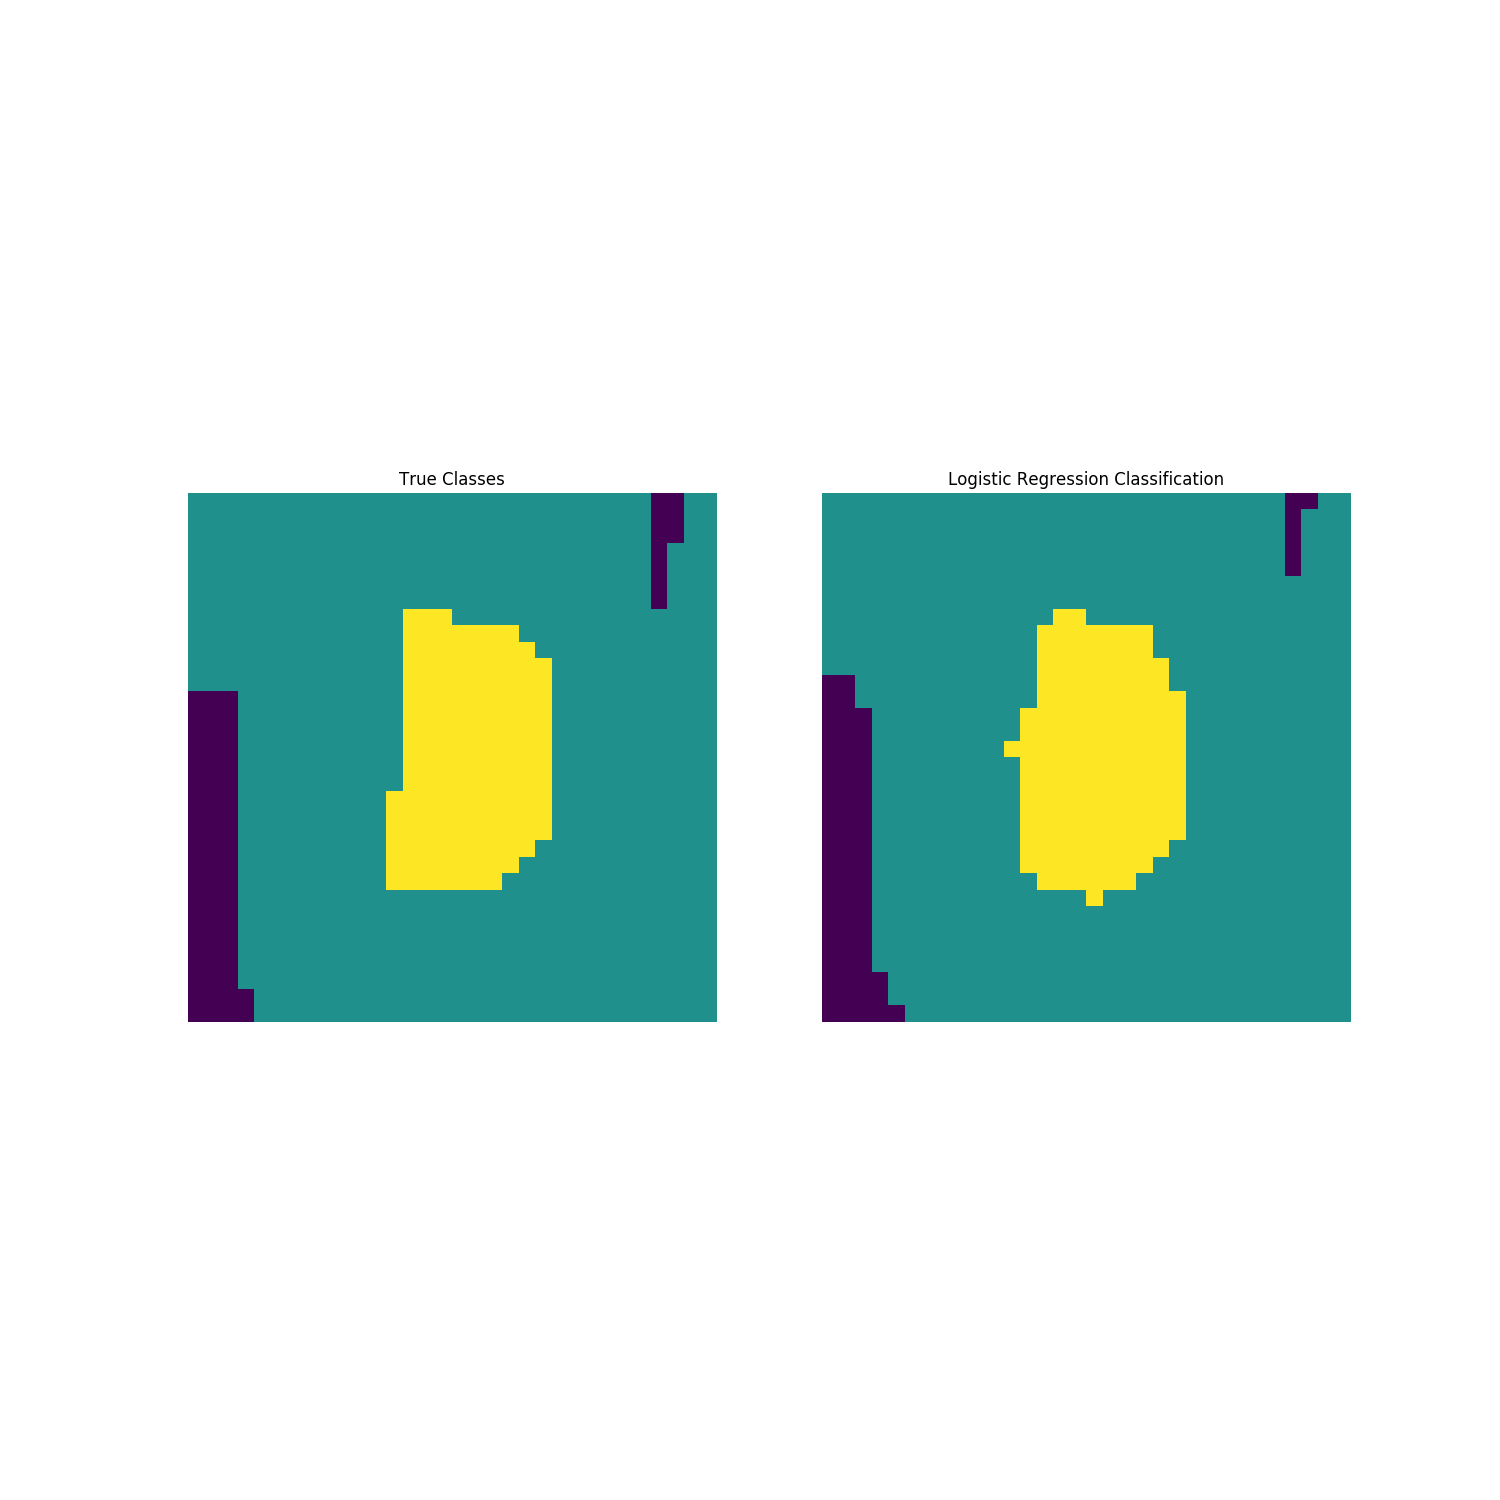

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9699


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


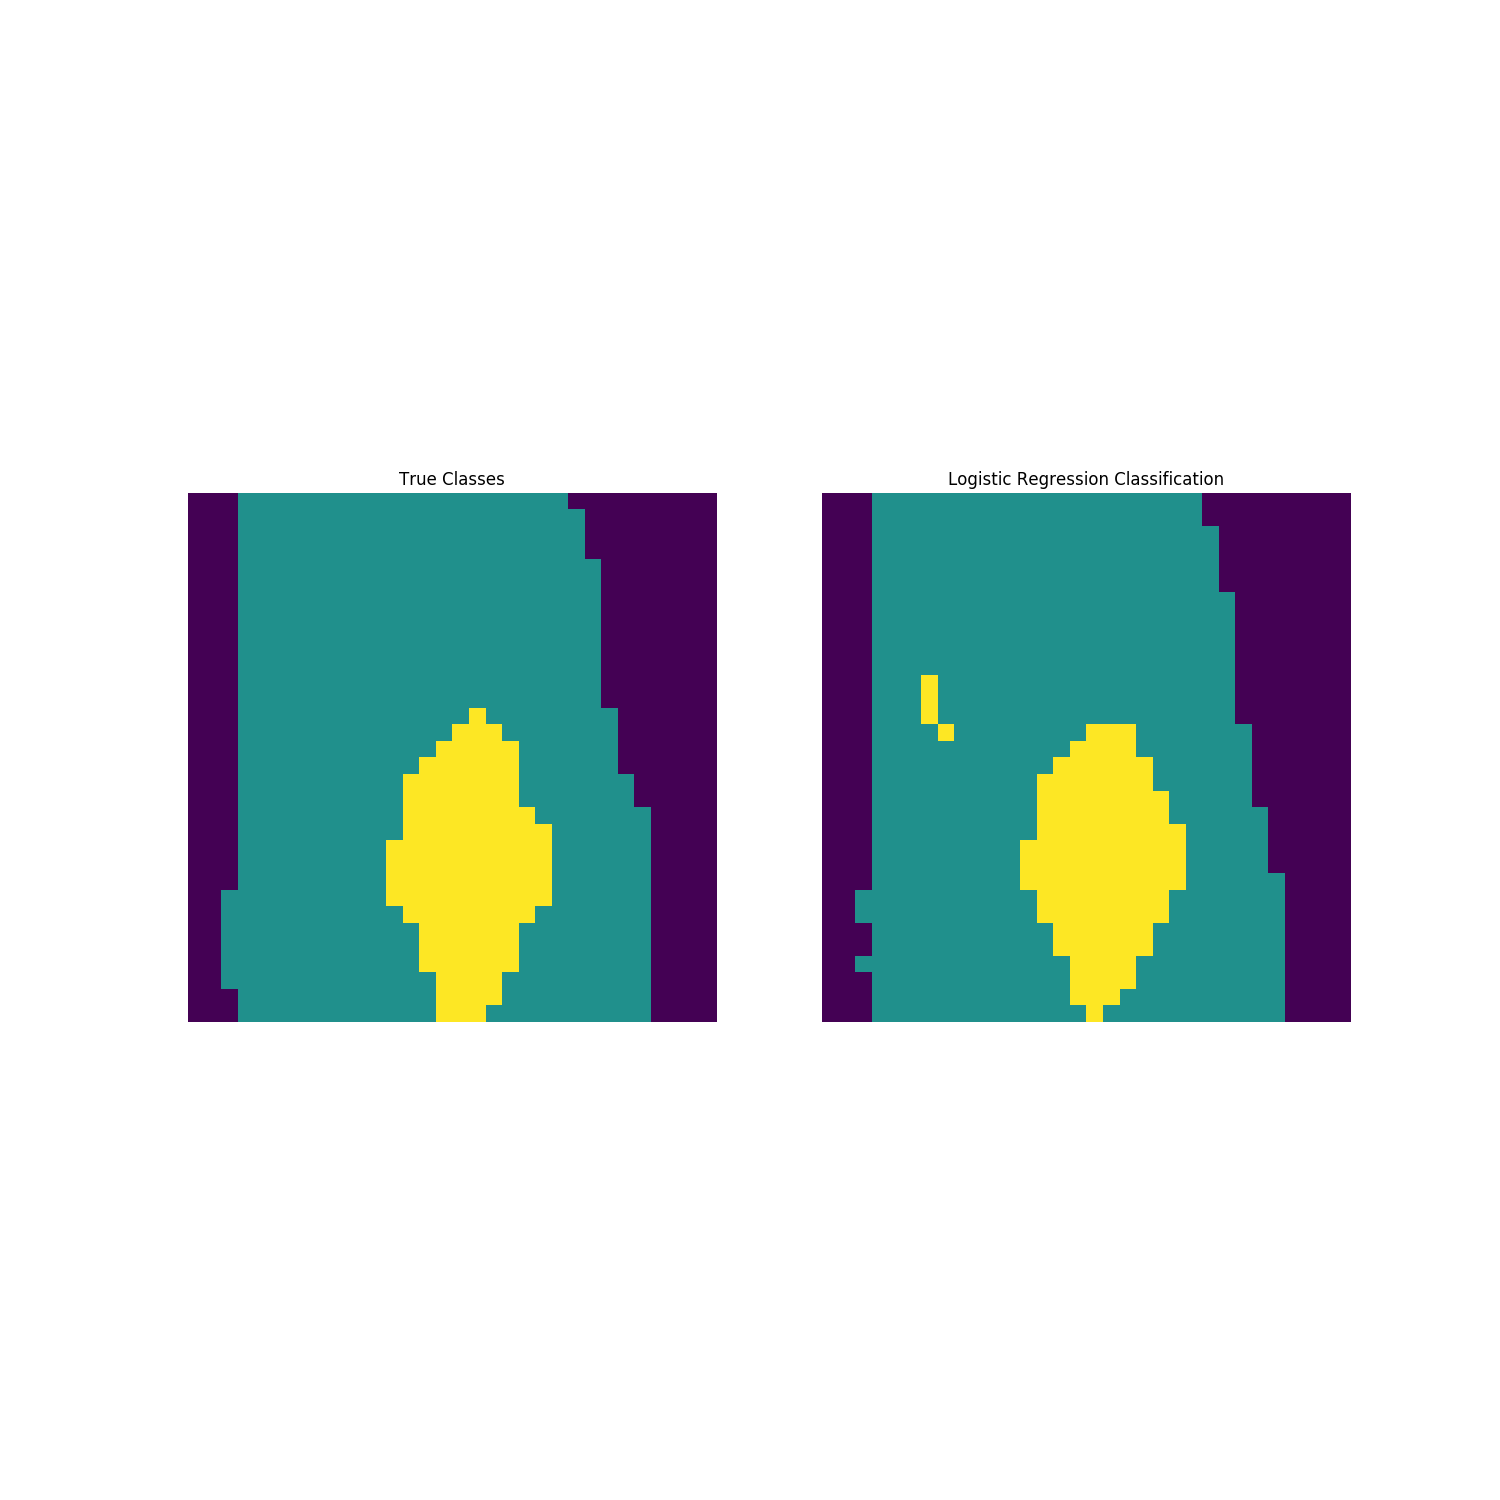

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9359


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


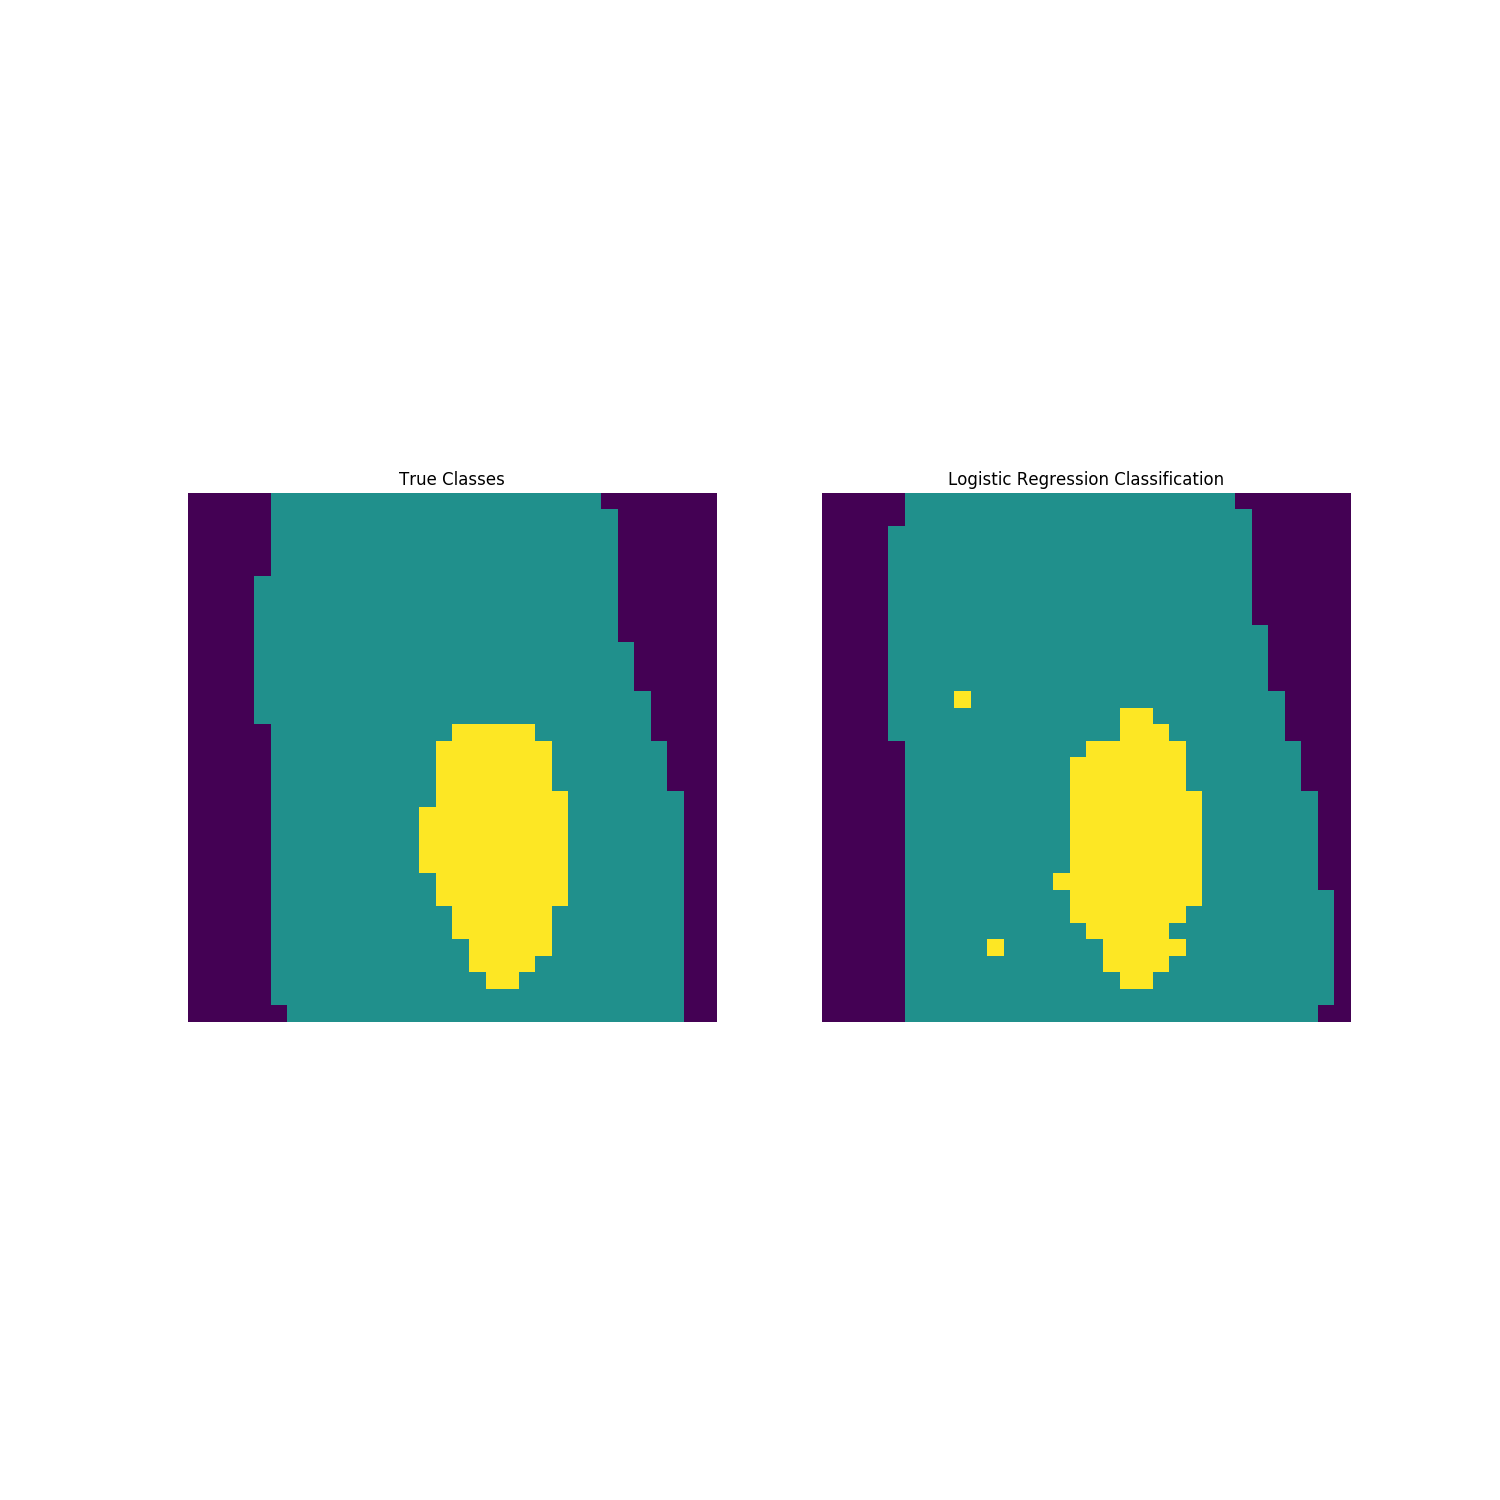

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9412


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


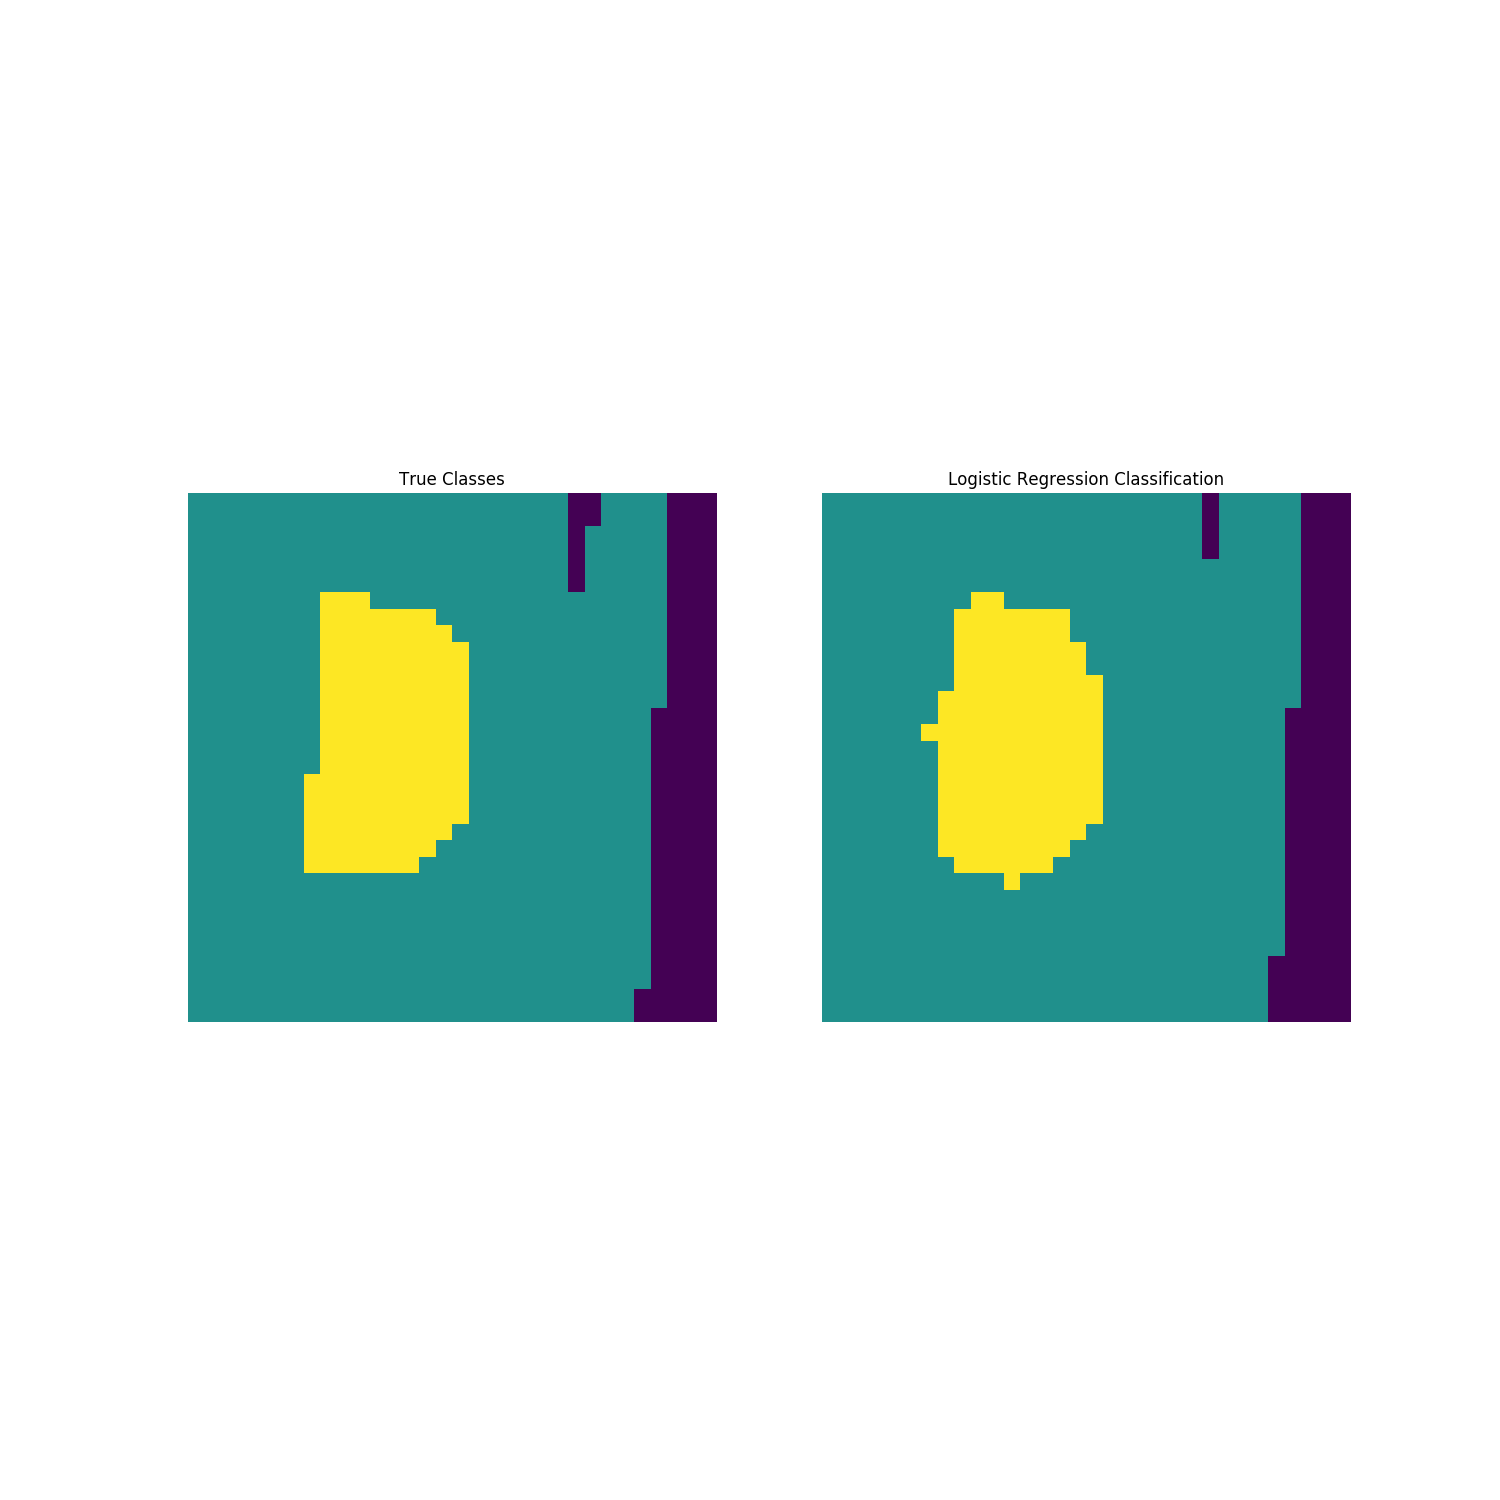

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9700


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


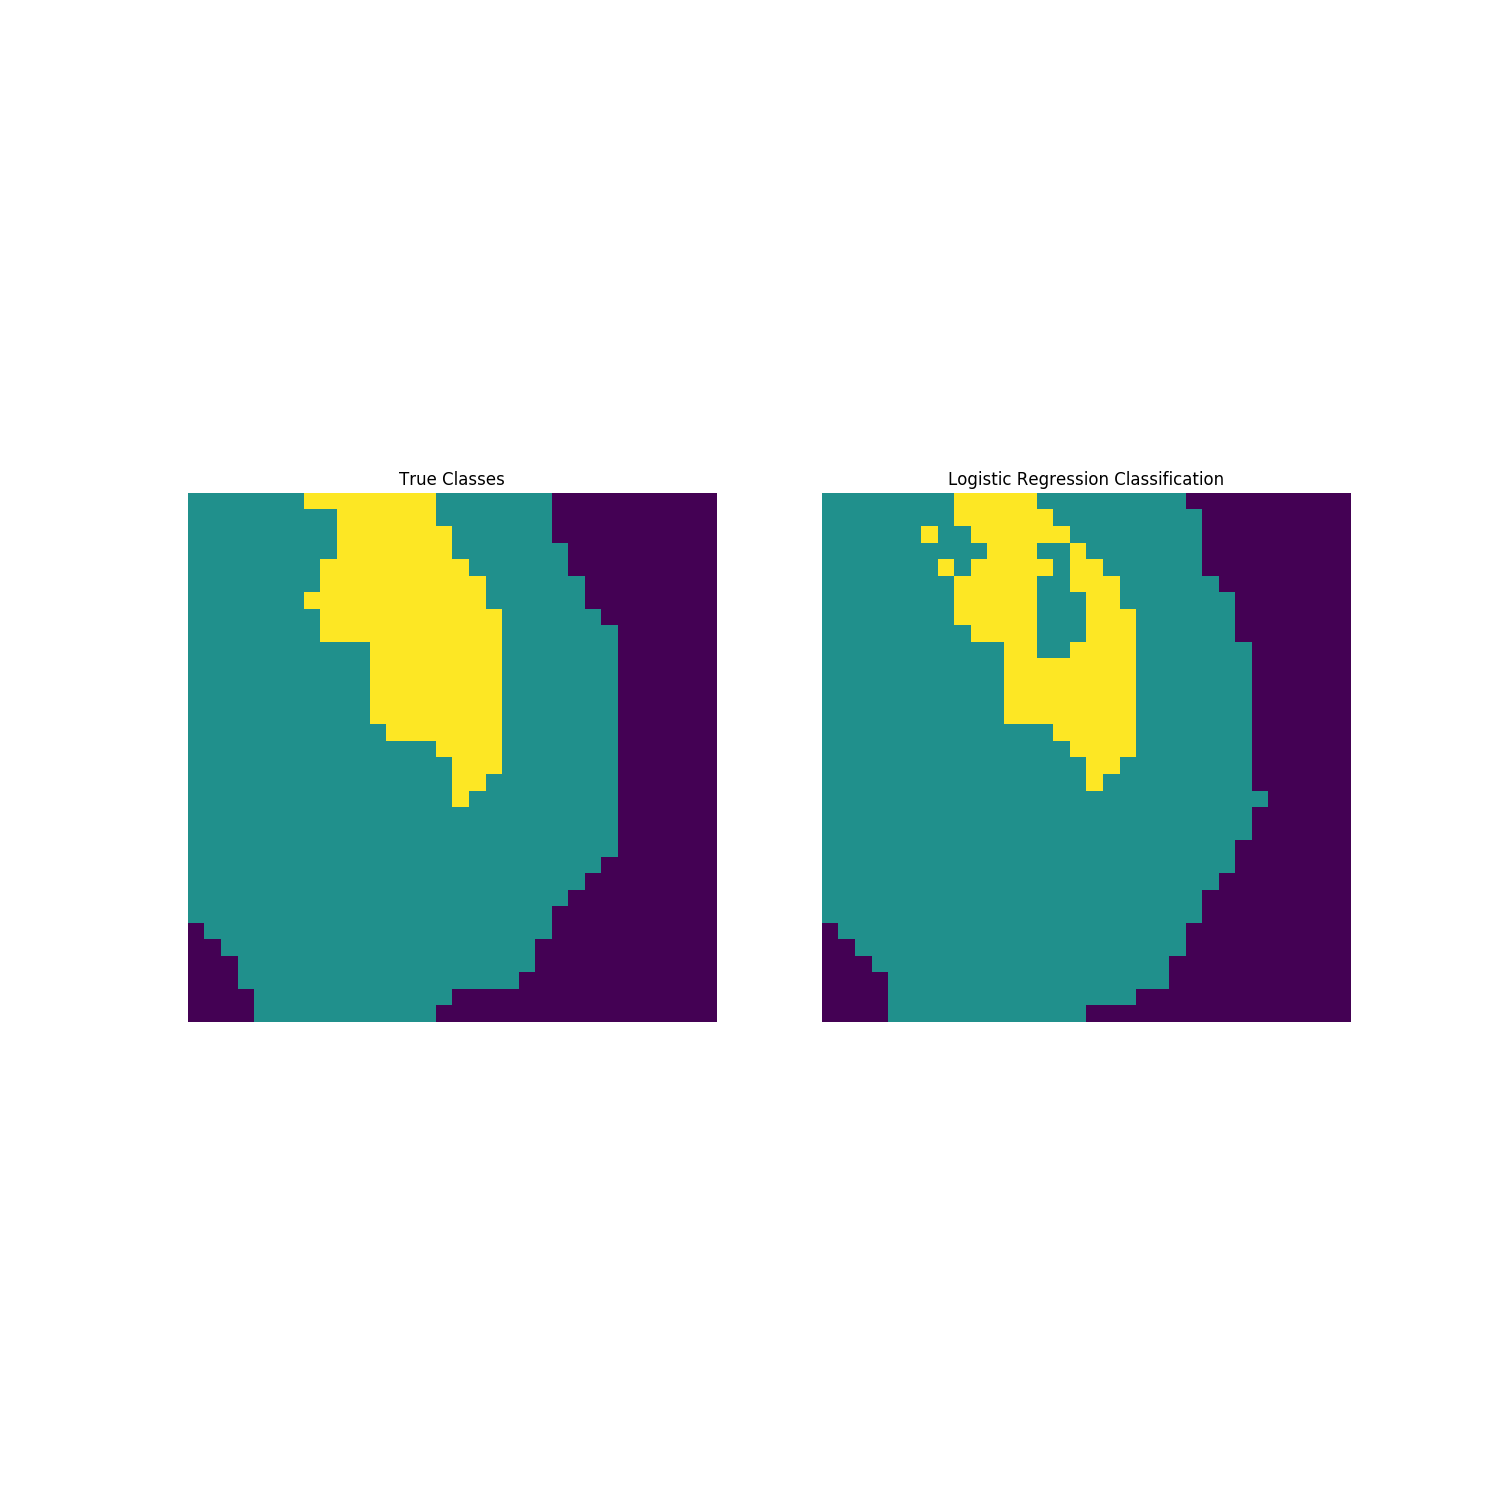

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8188


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


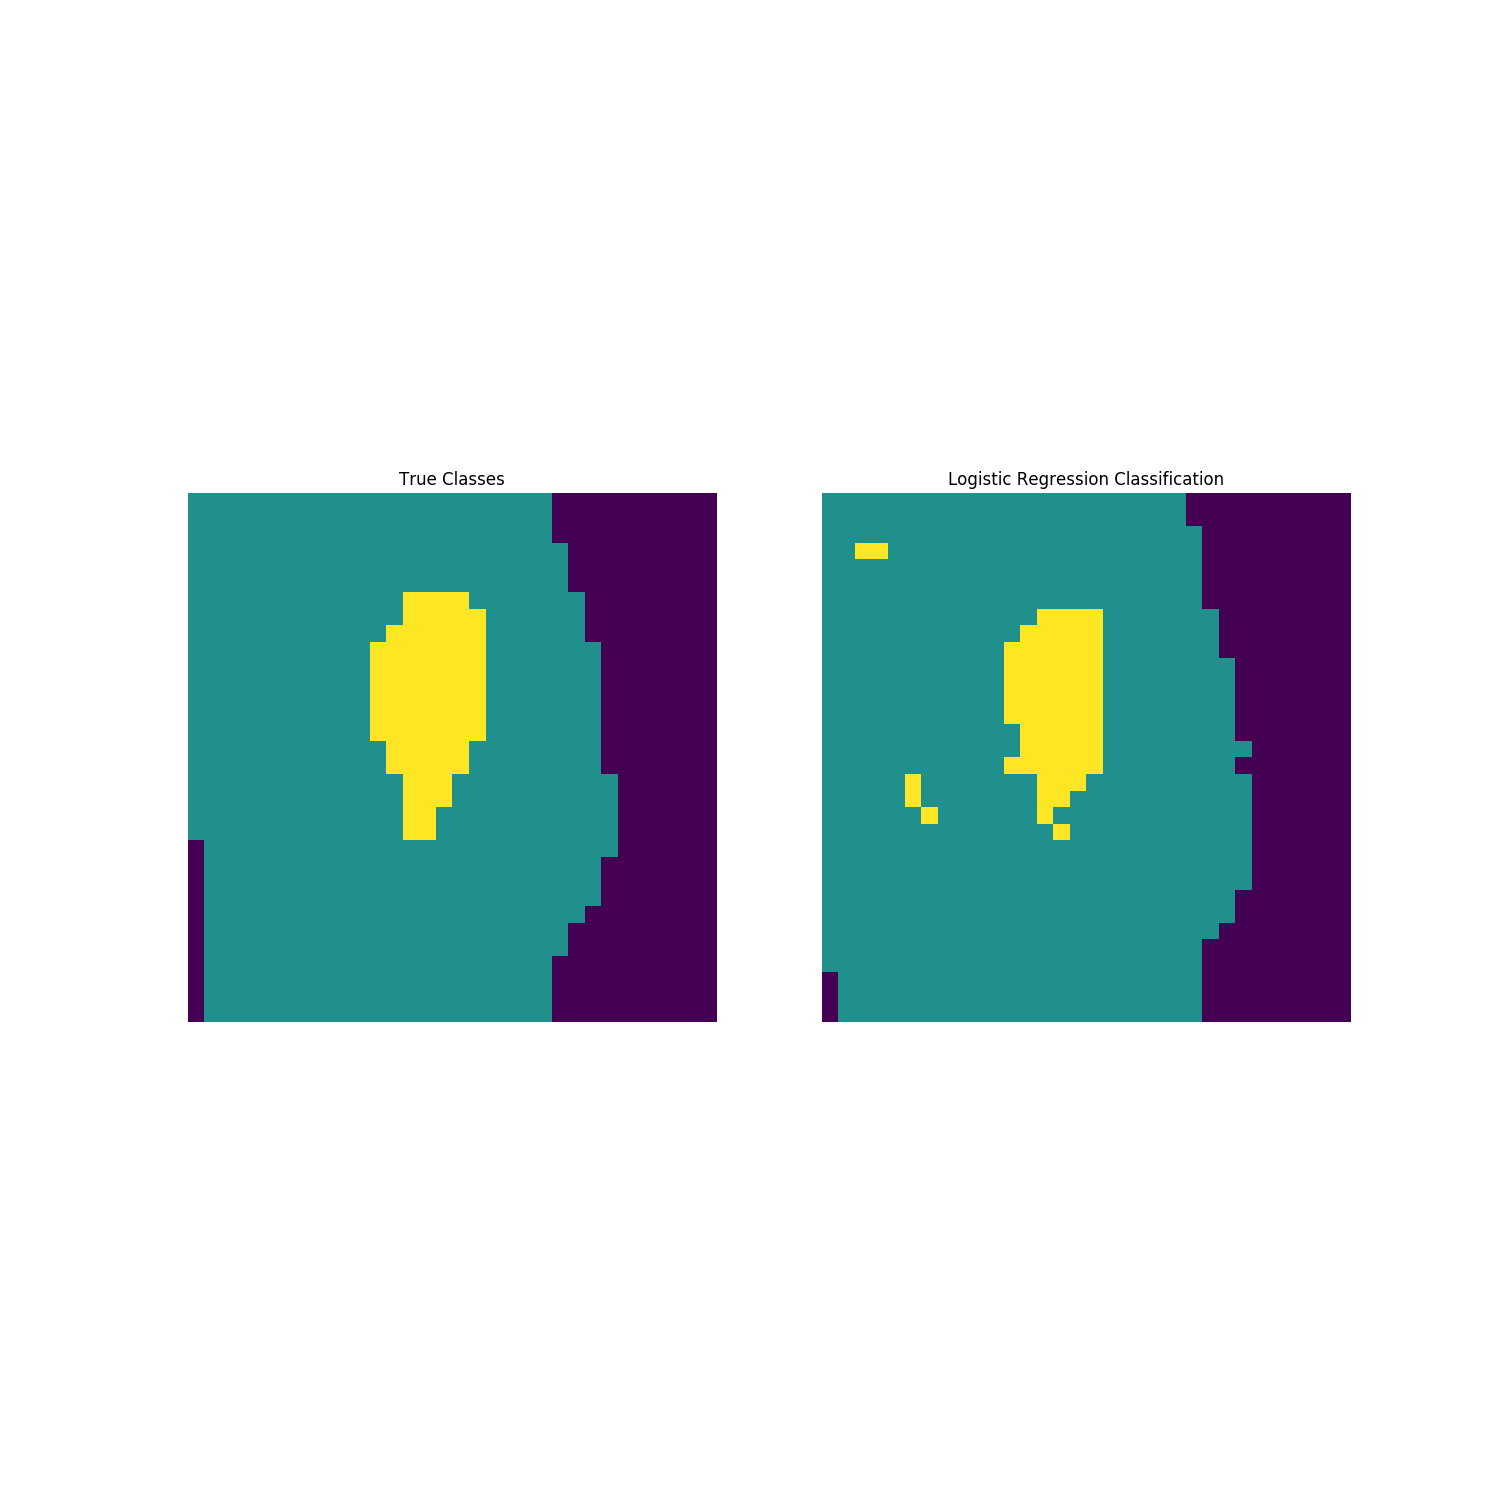

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8524


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


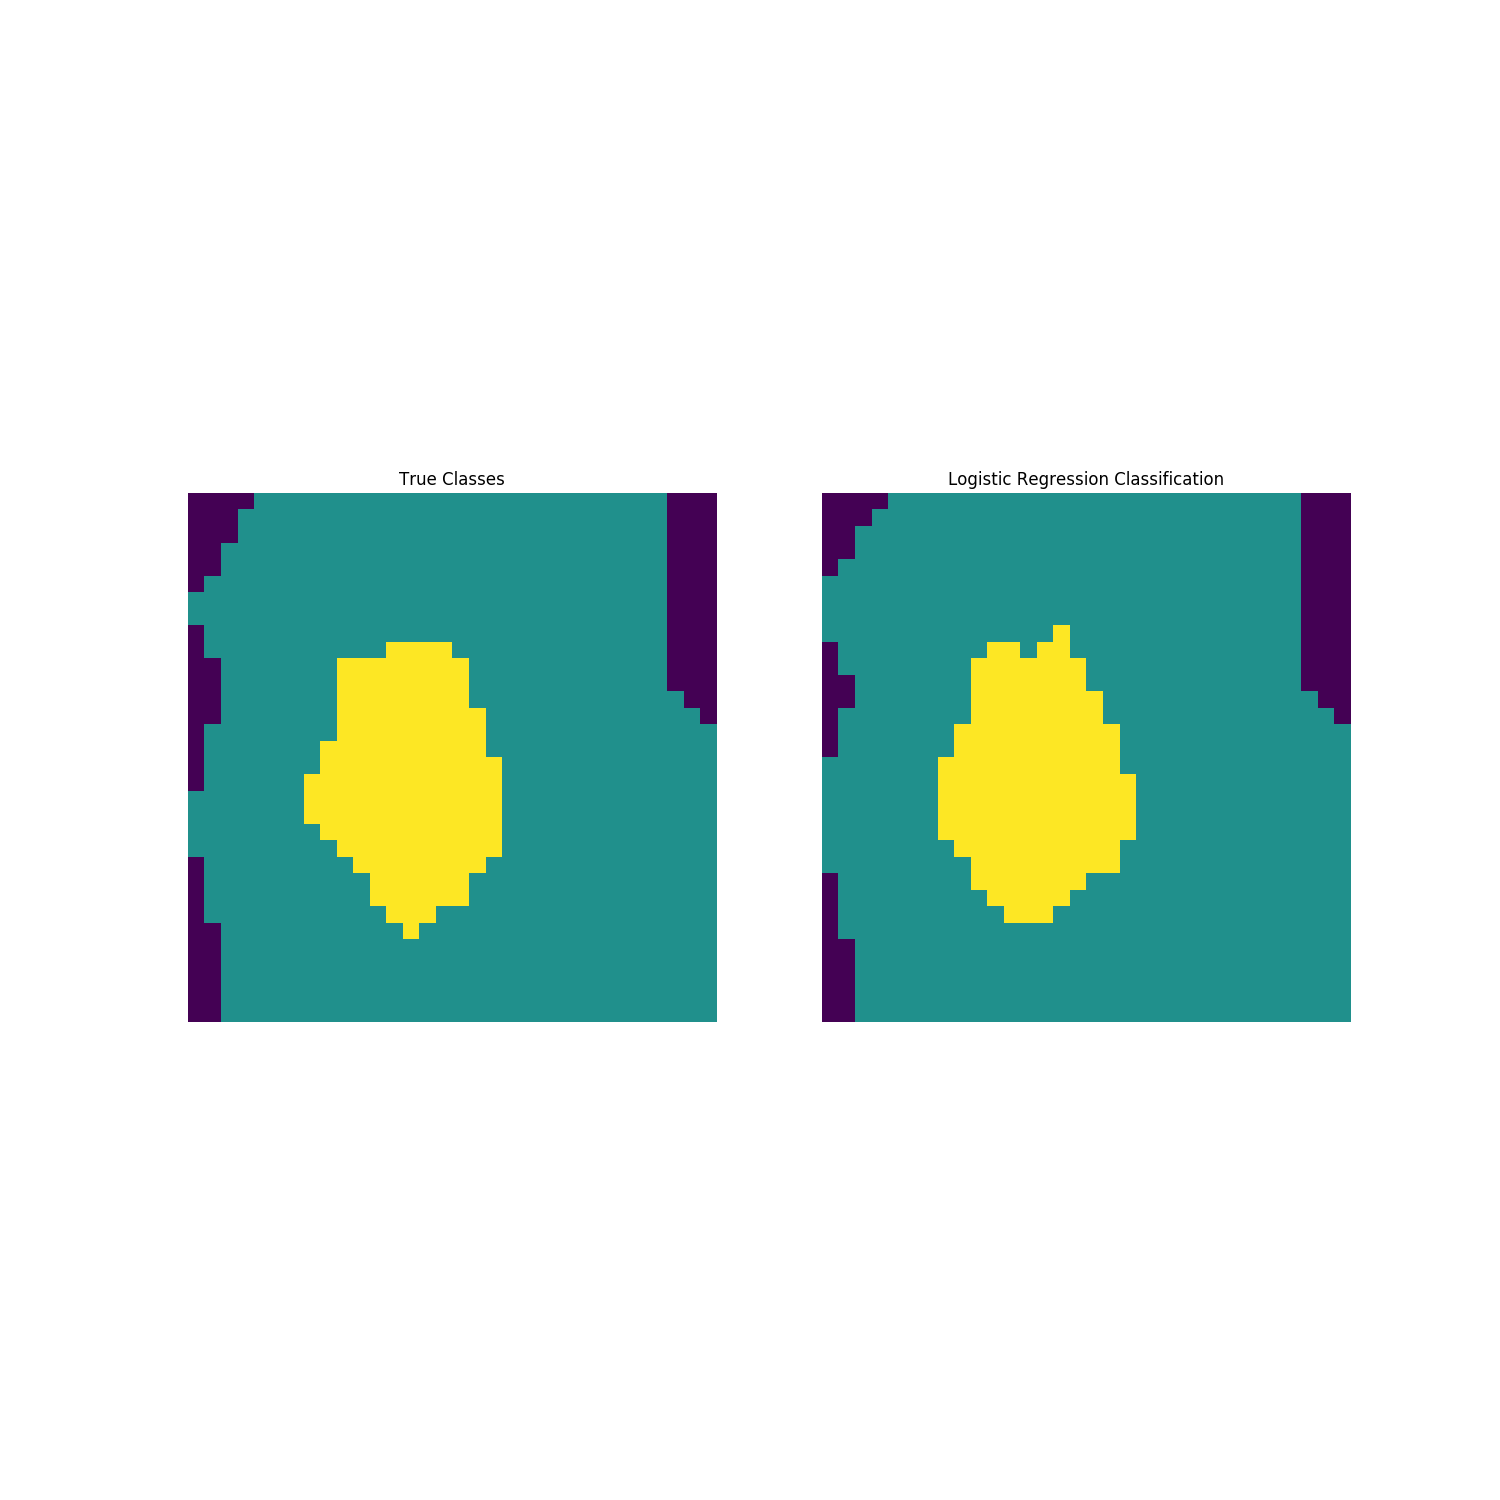

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9328


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


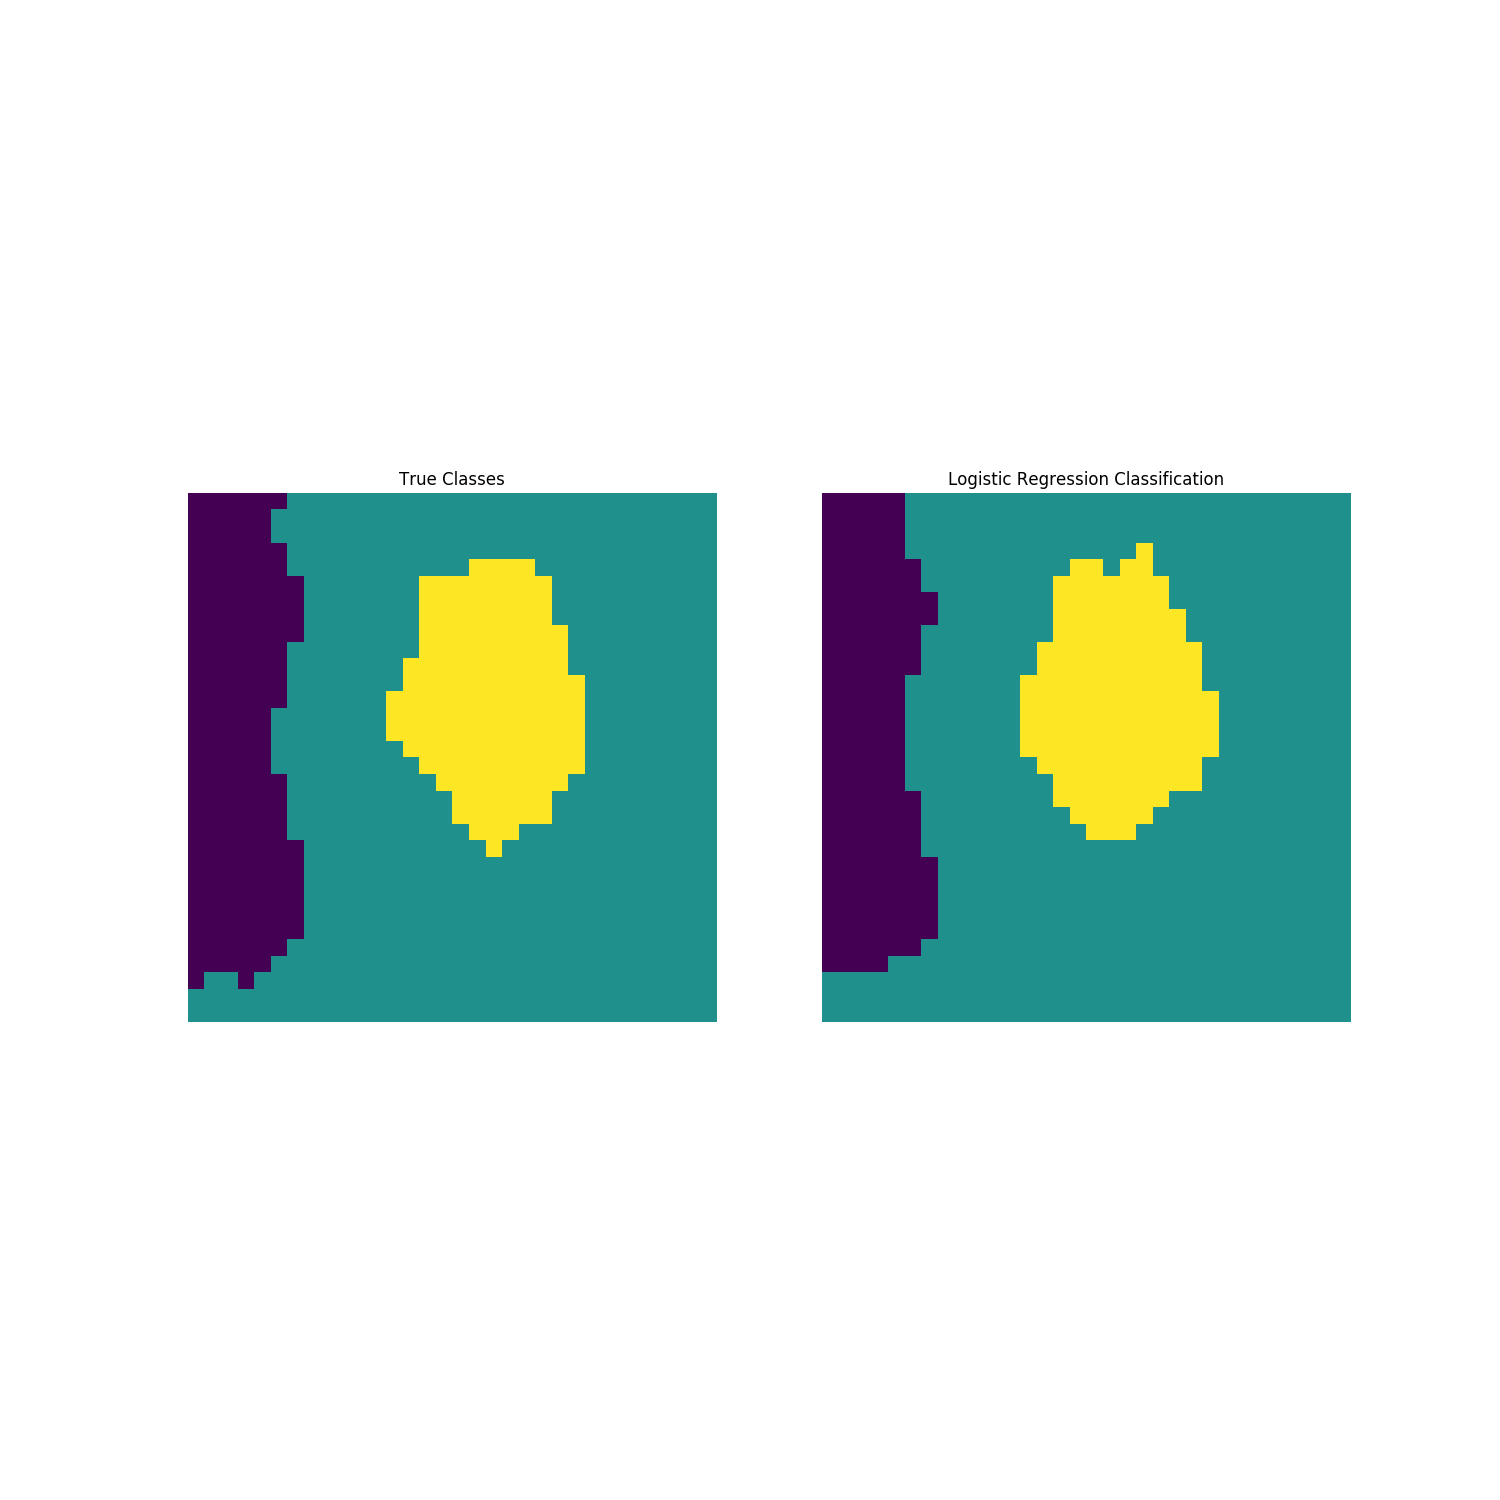

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9311


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


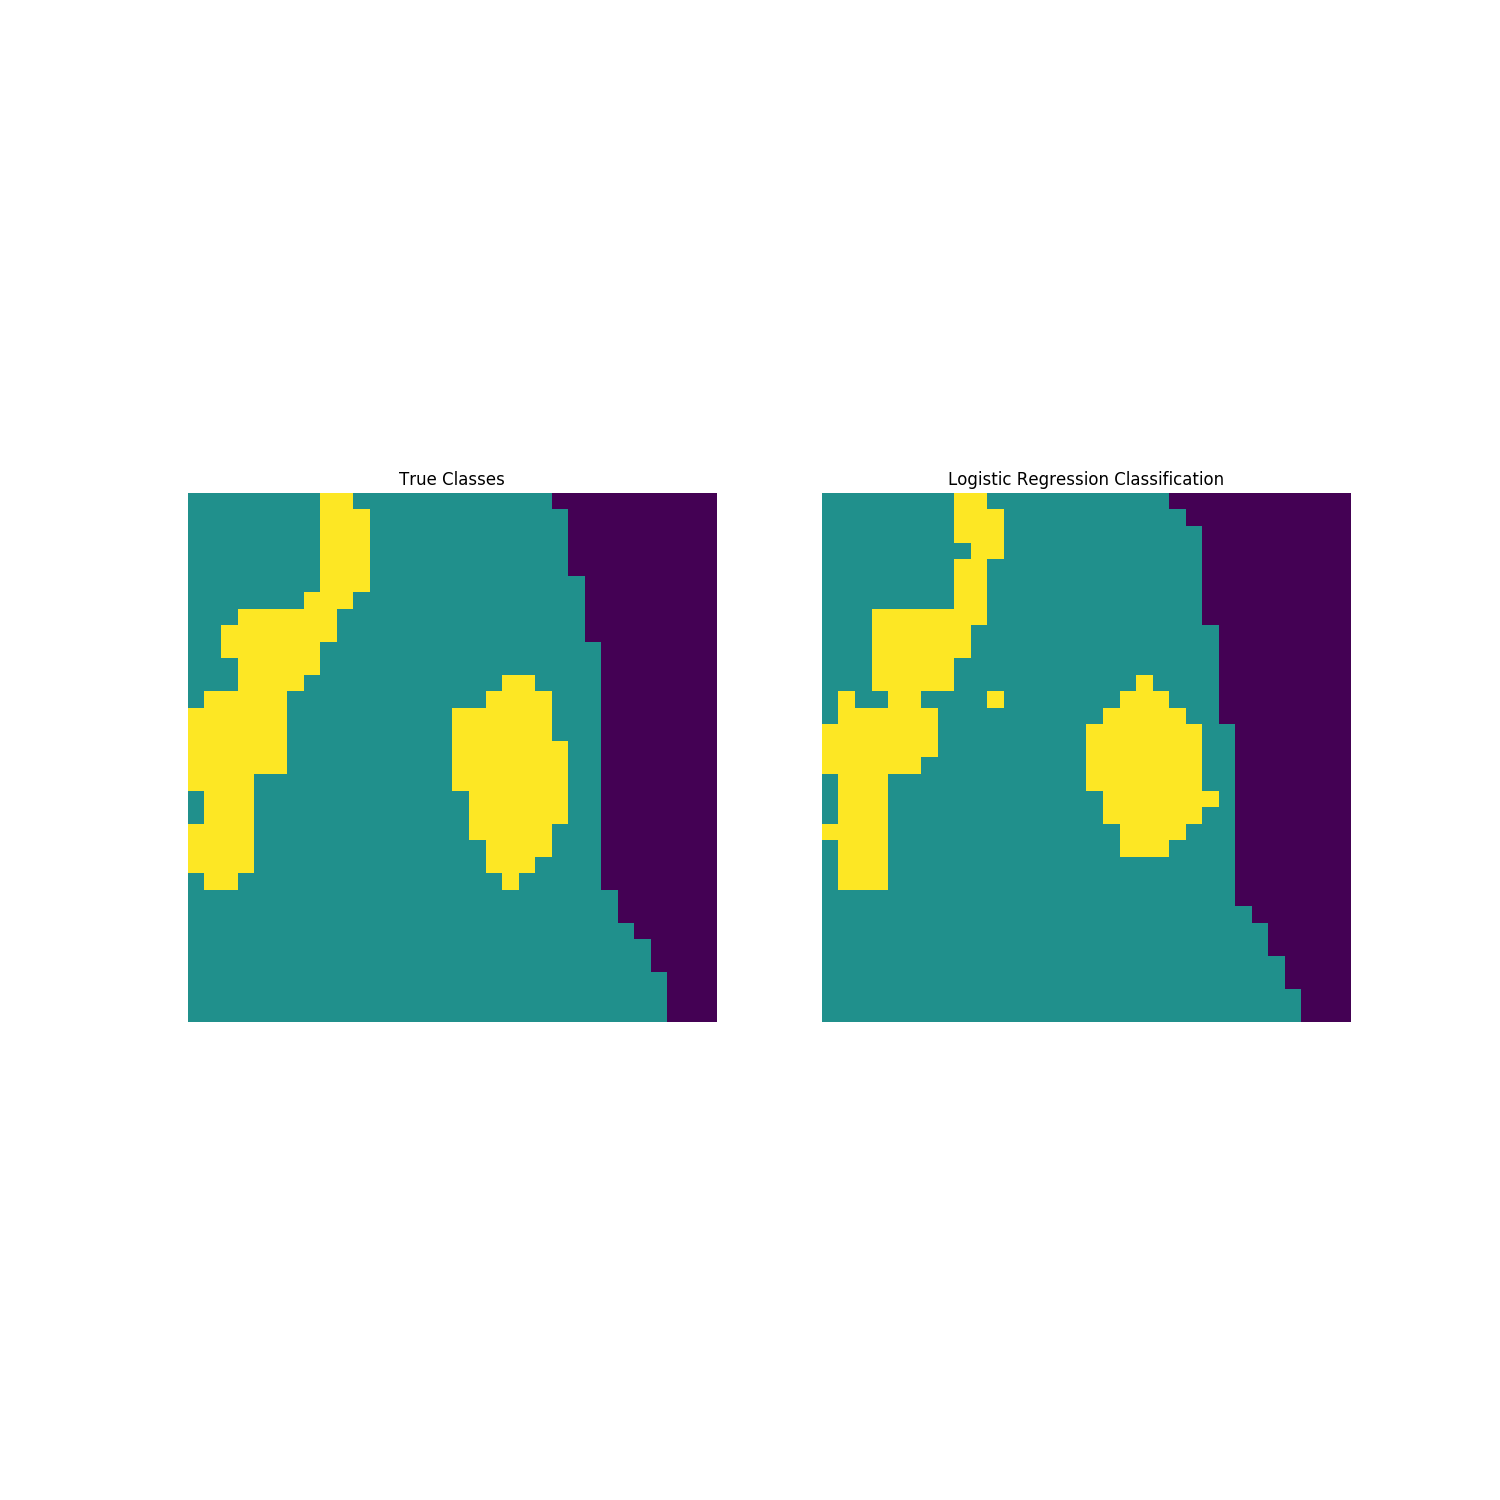

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8876


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


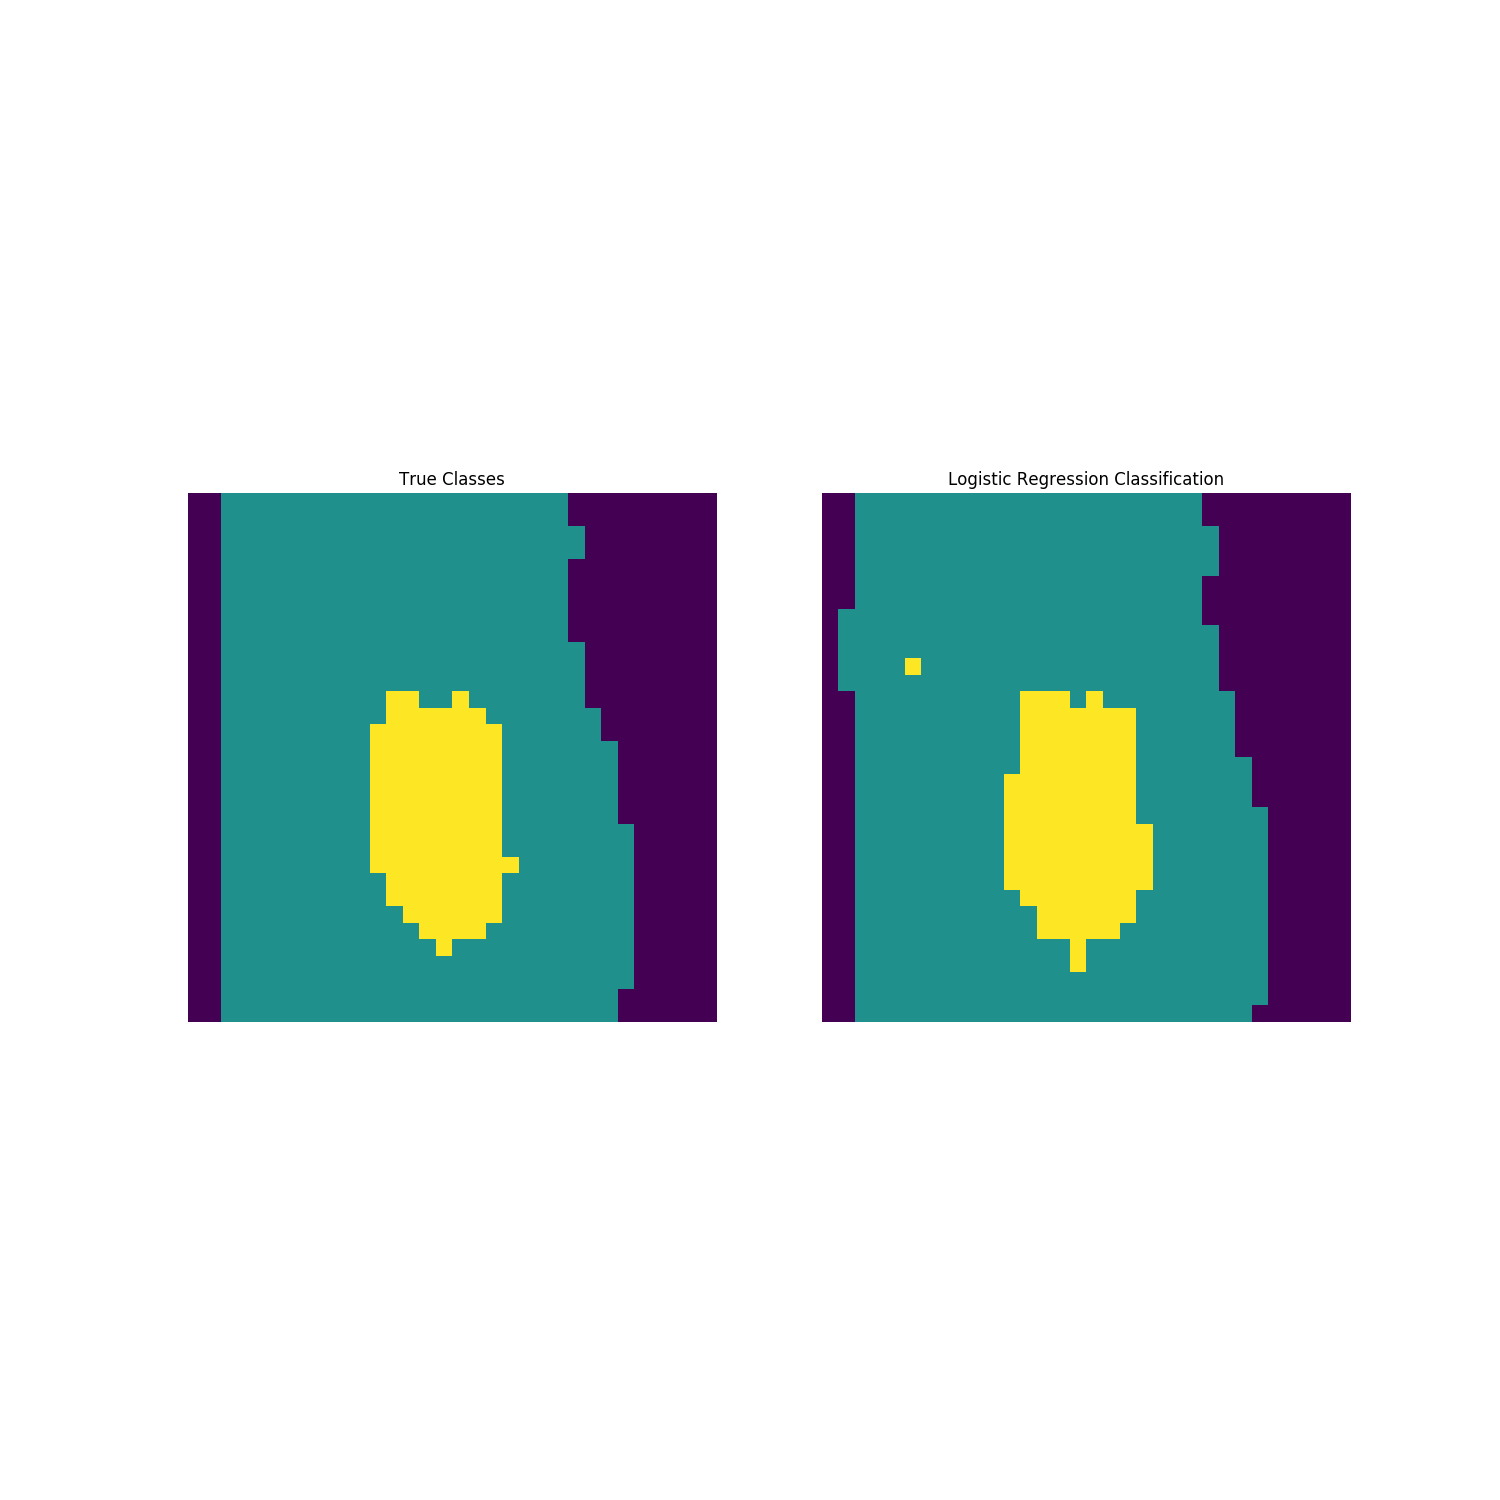

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9748


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


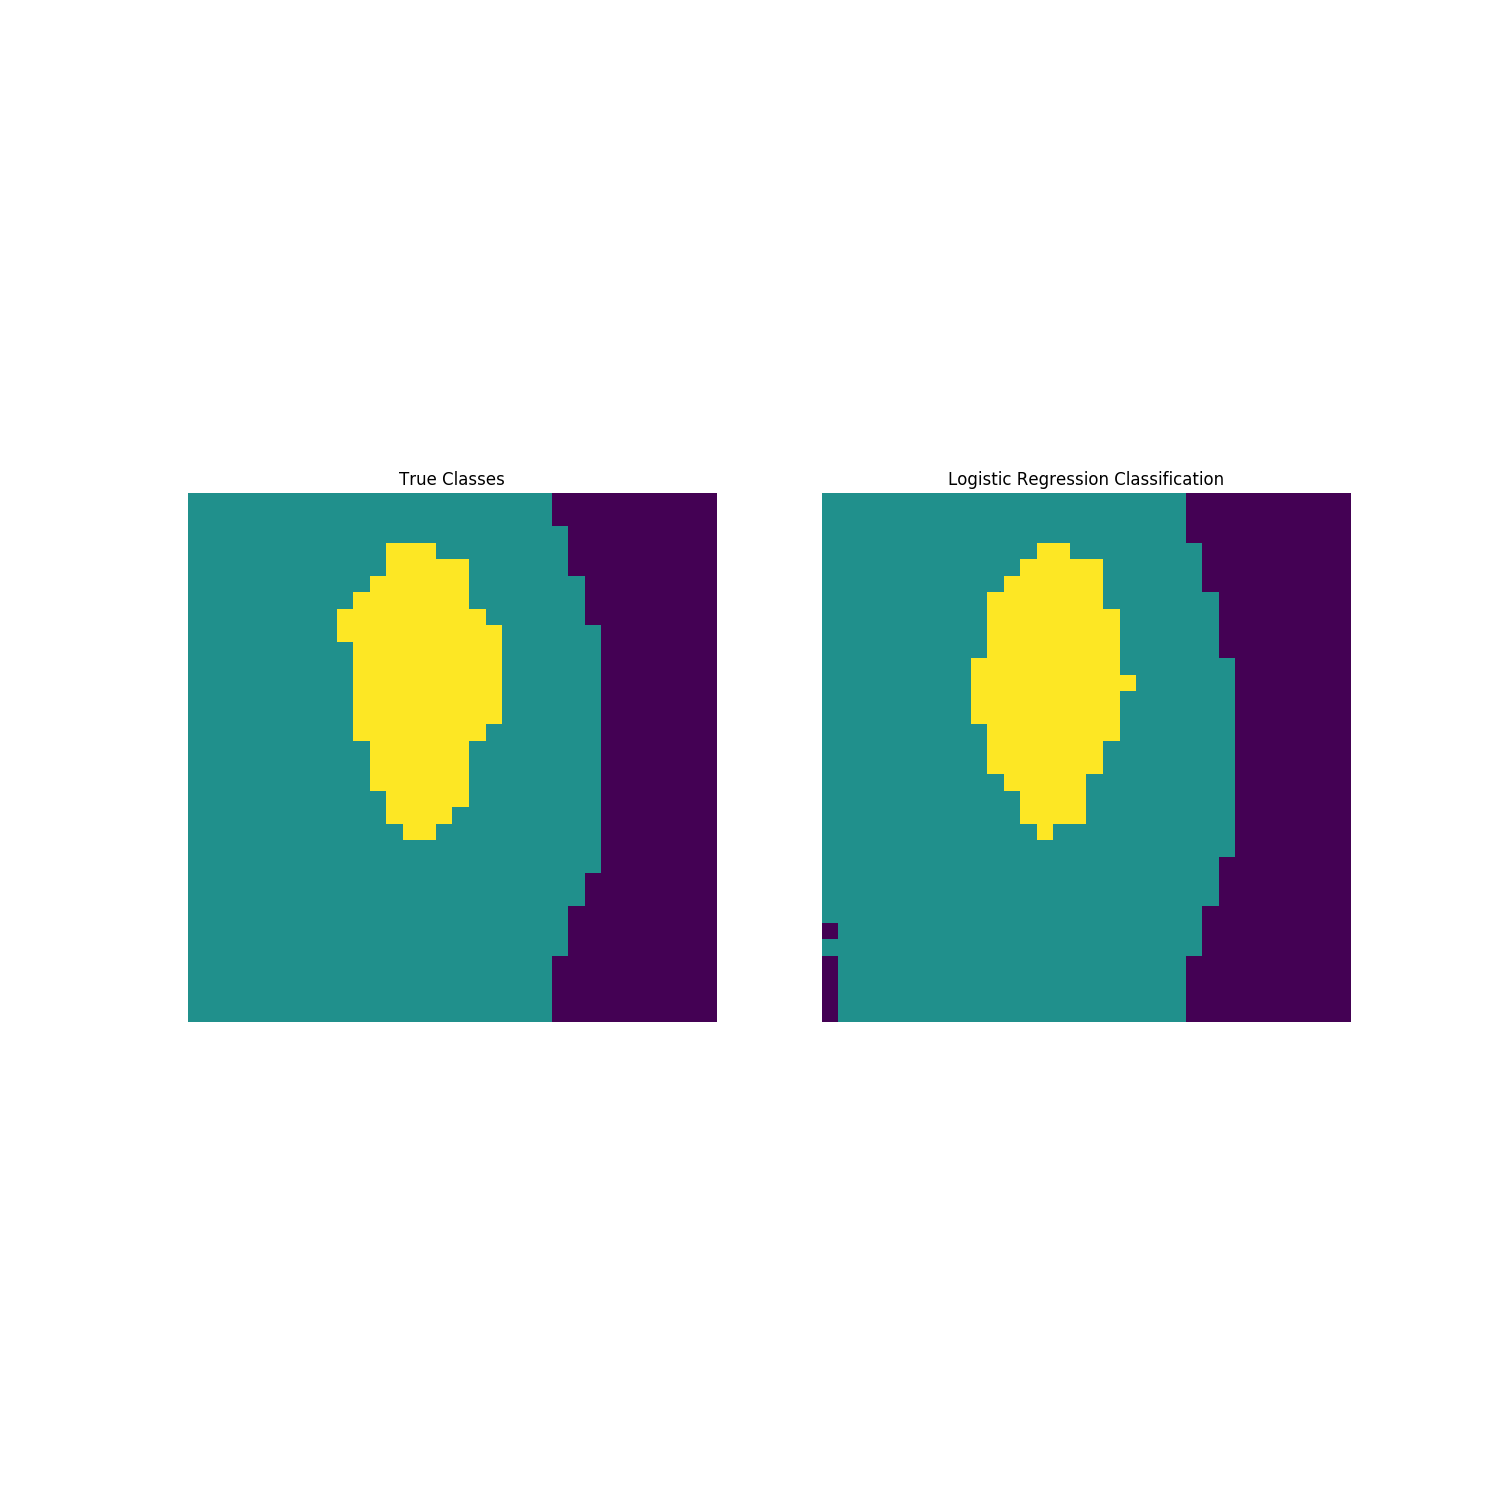

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9235


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


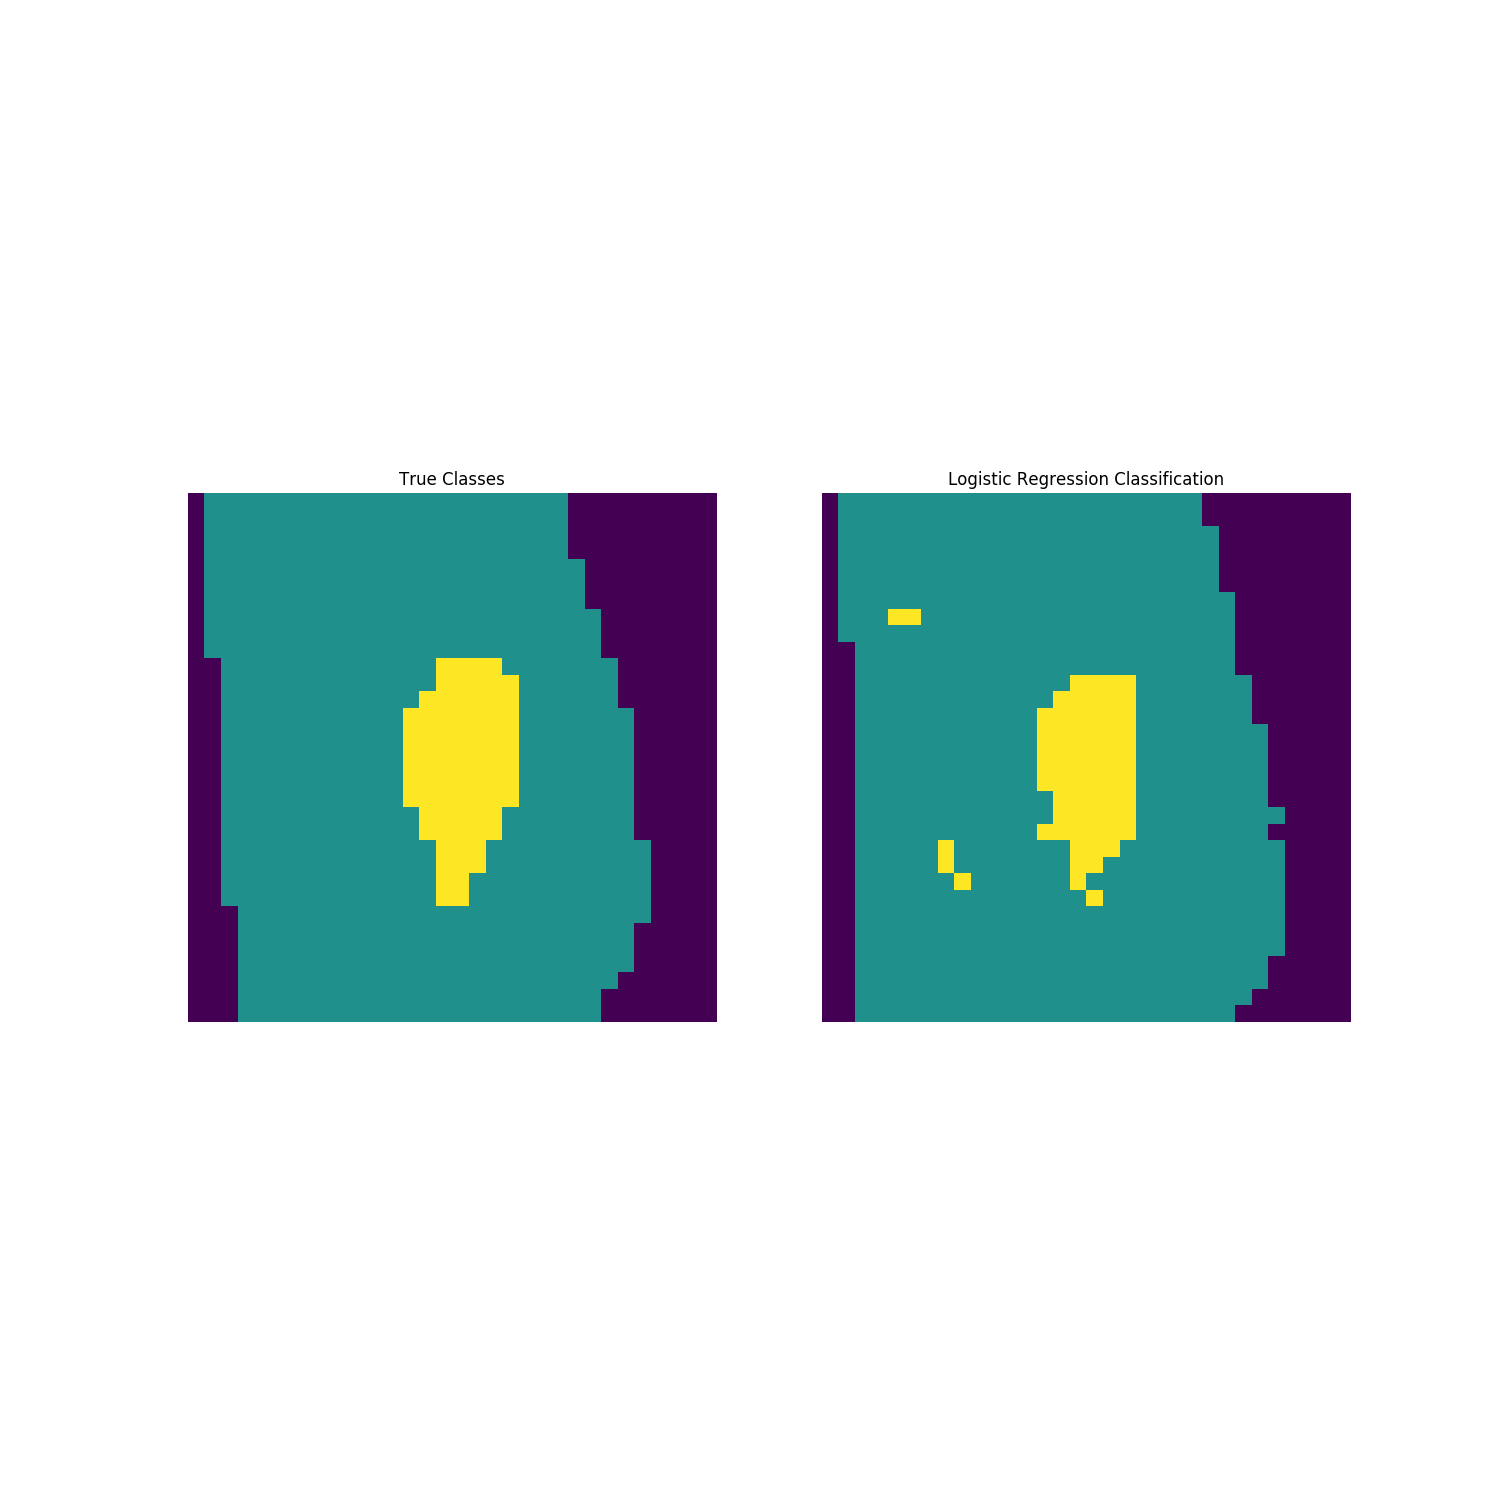

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8526


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


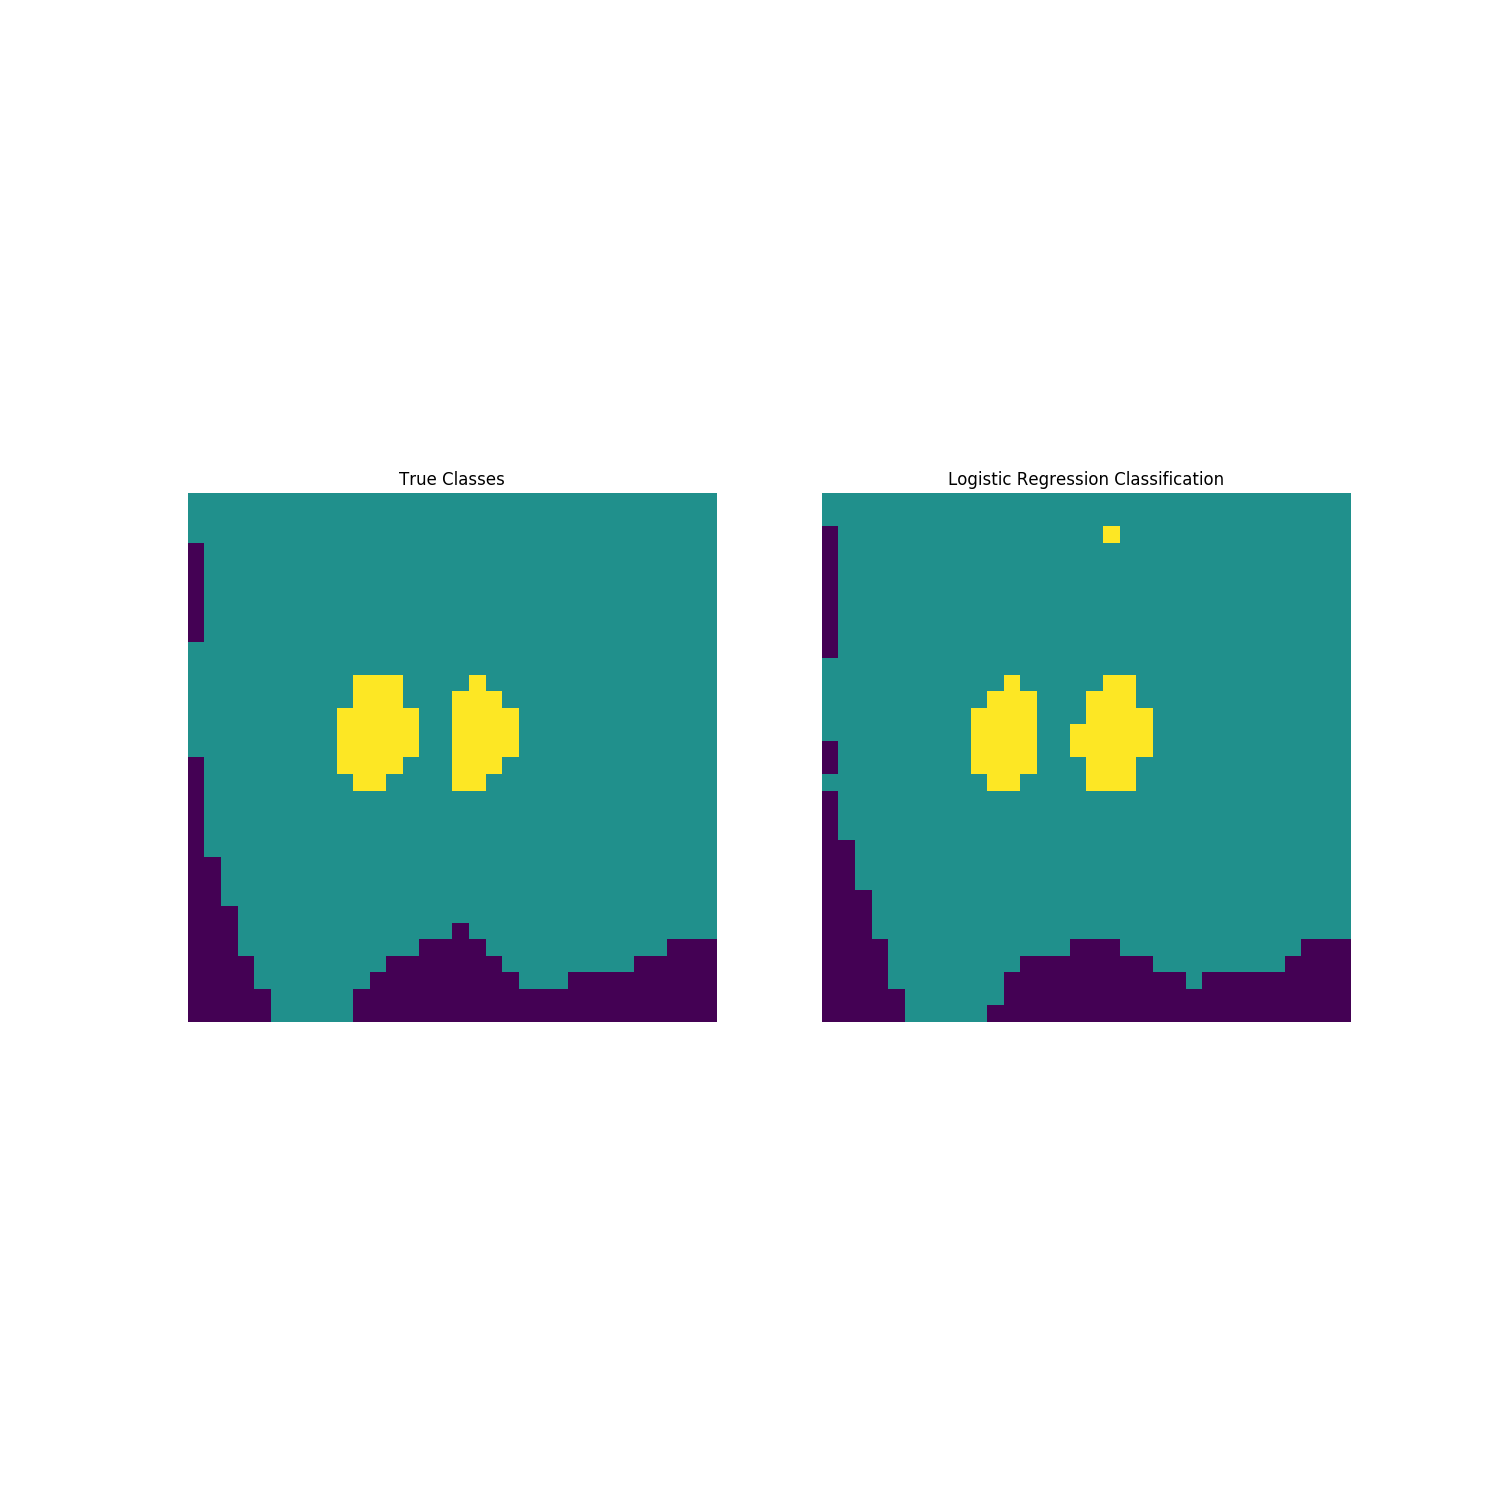

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9370


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


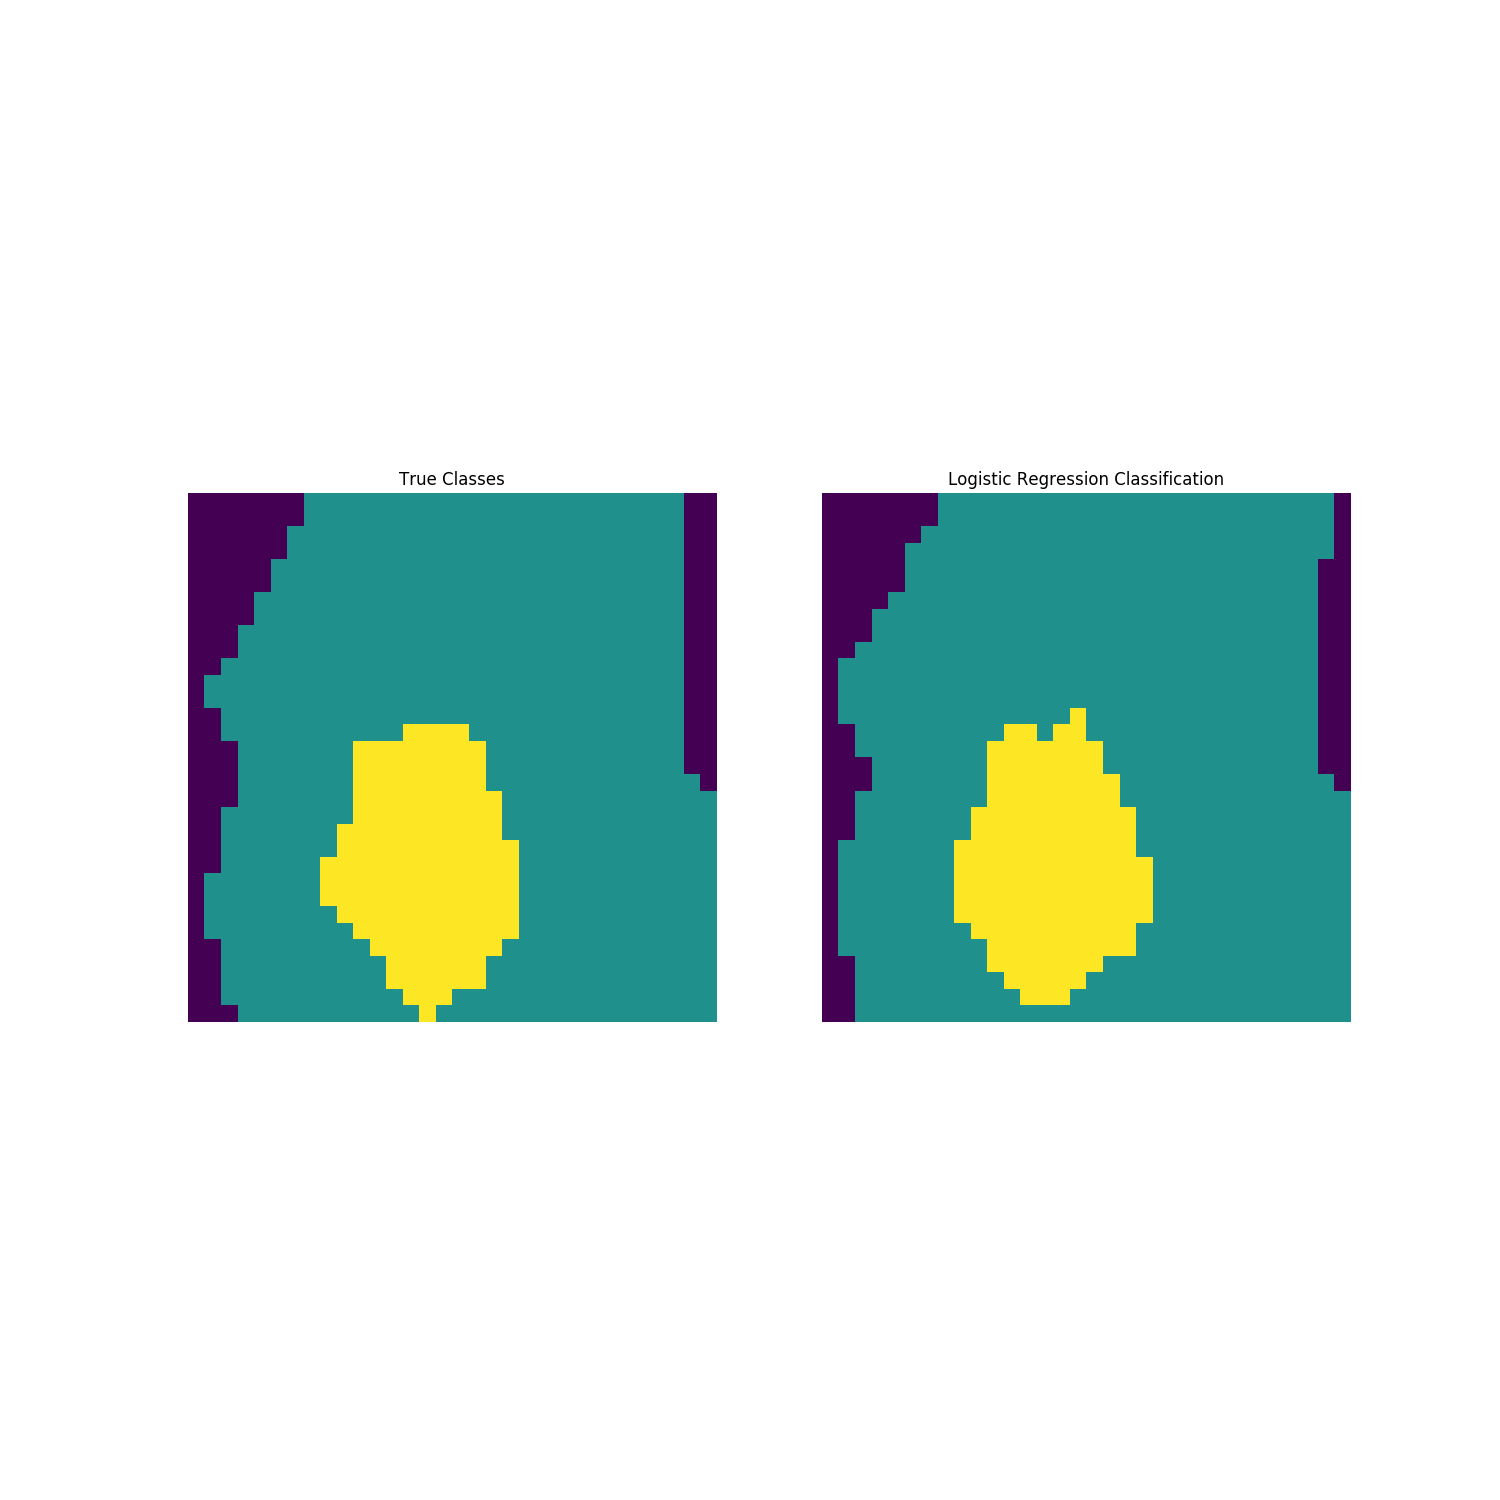

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9320


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


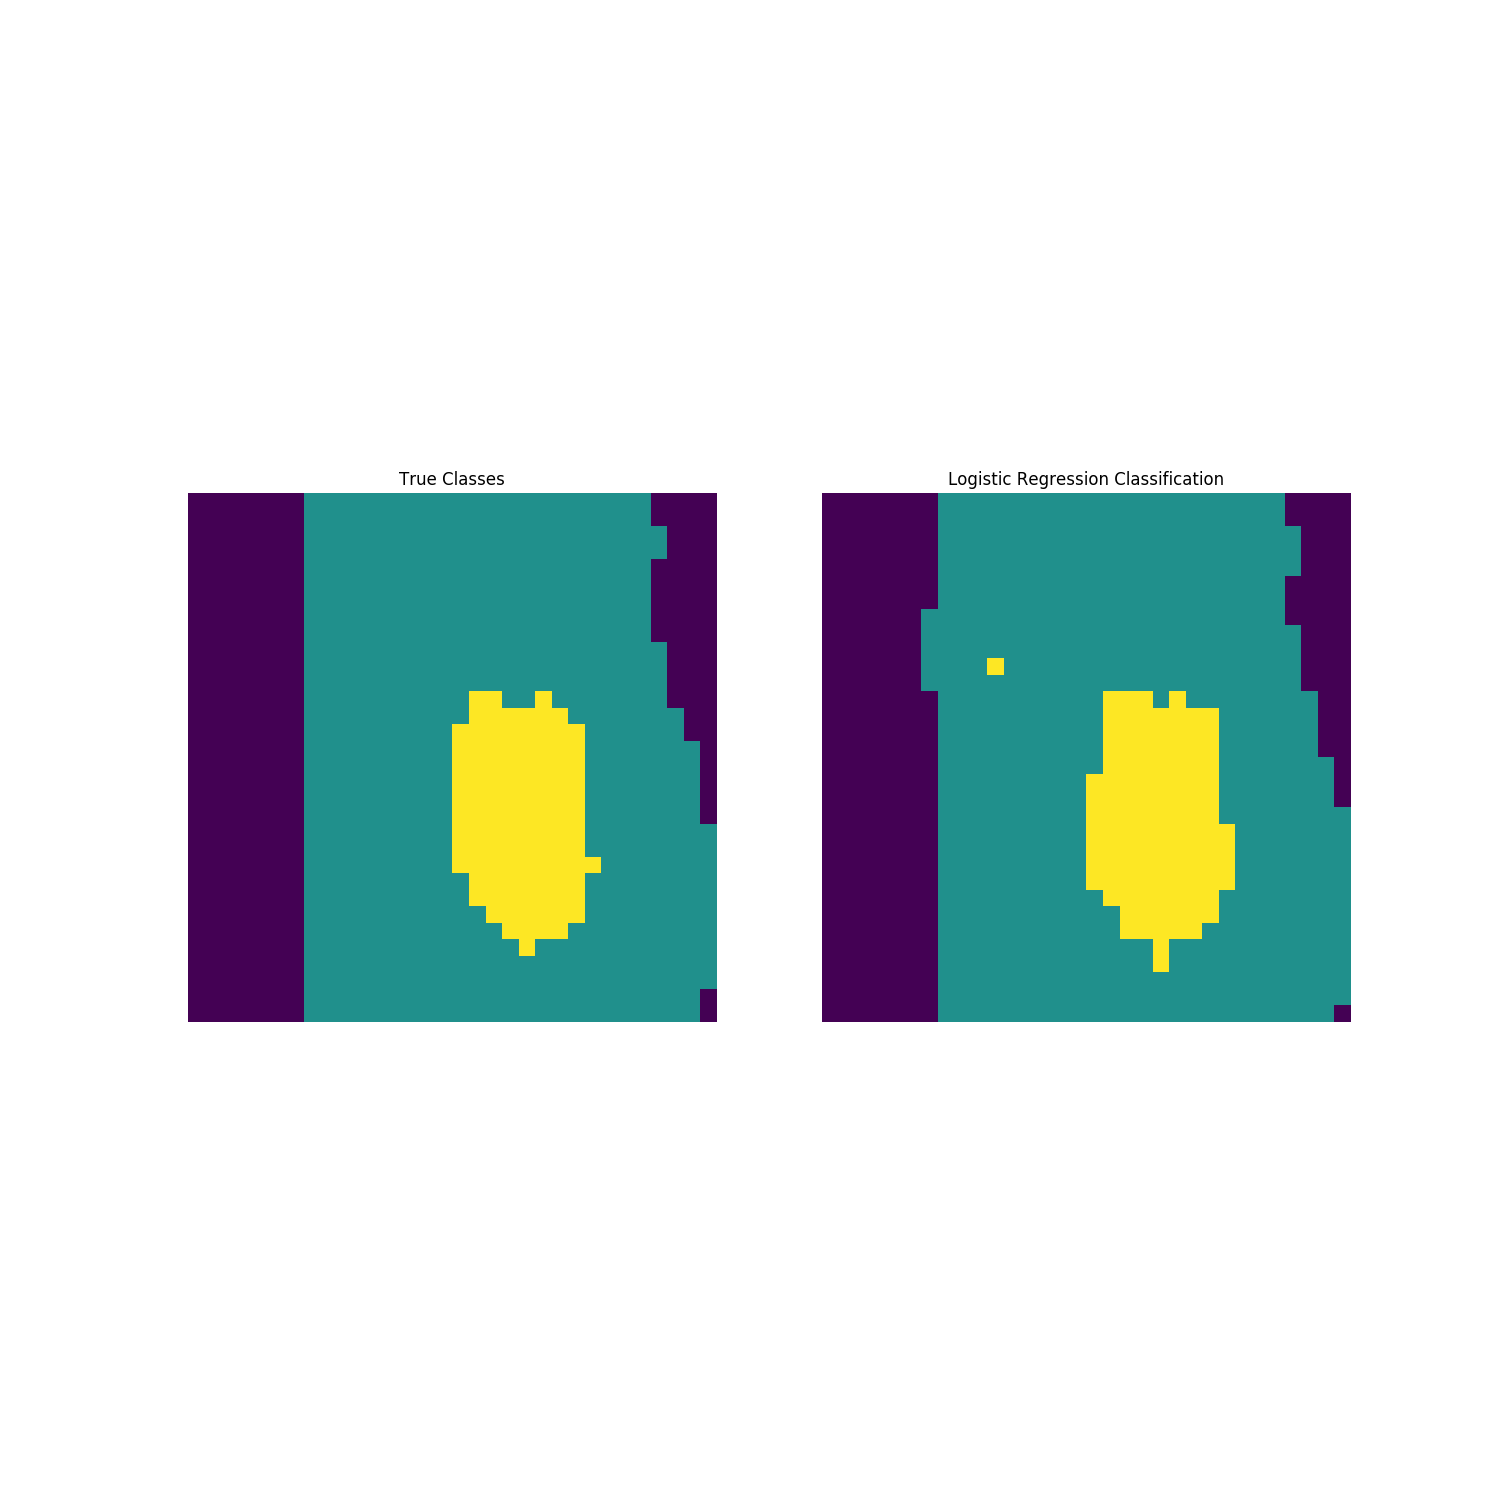

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9748


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


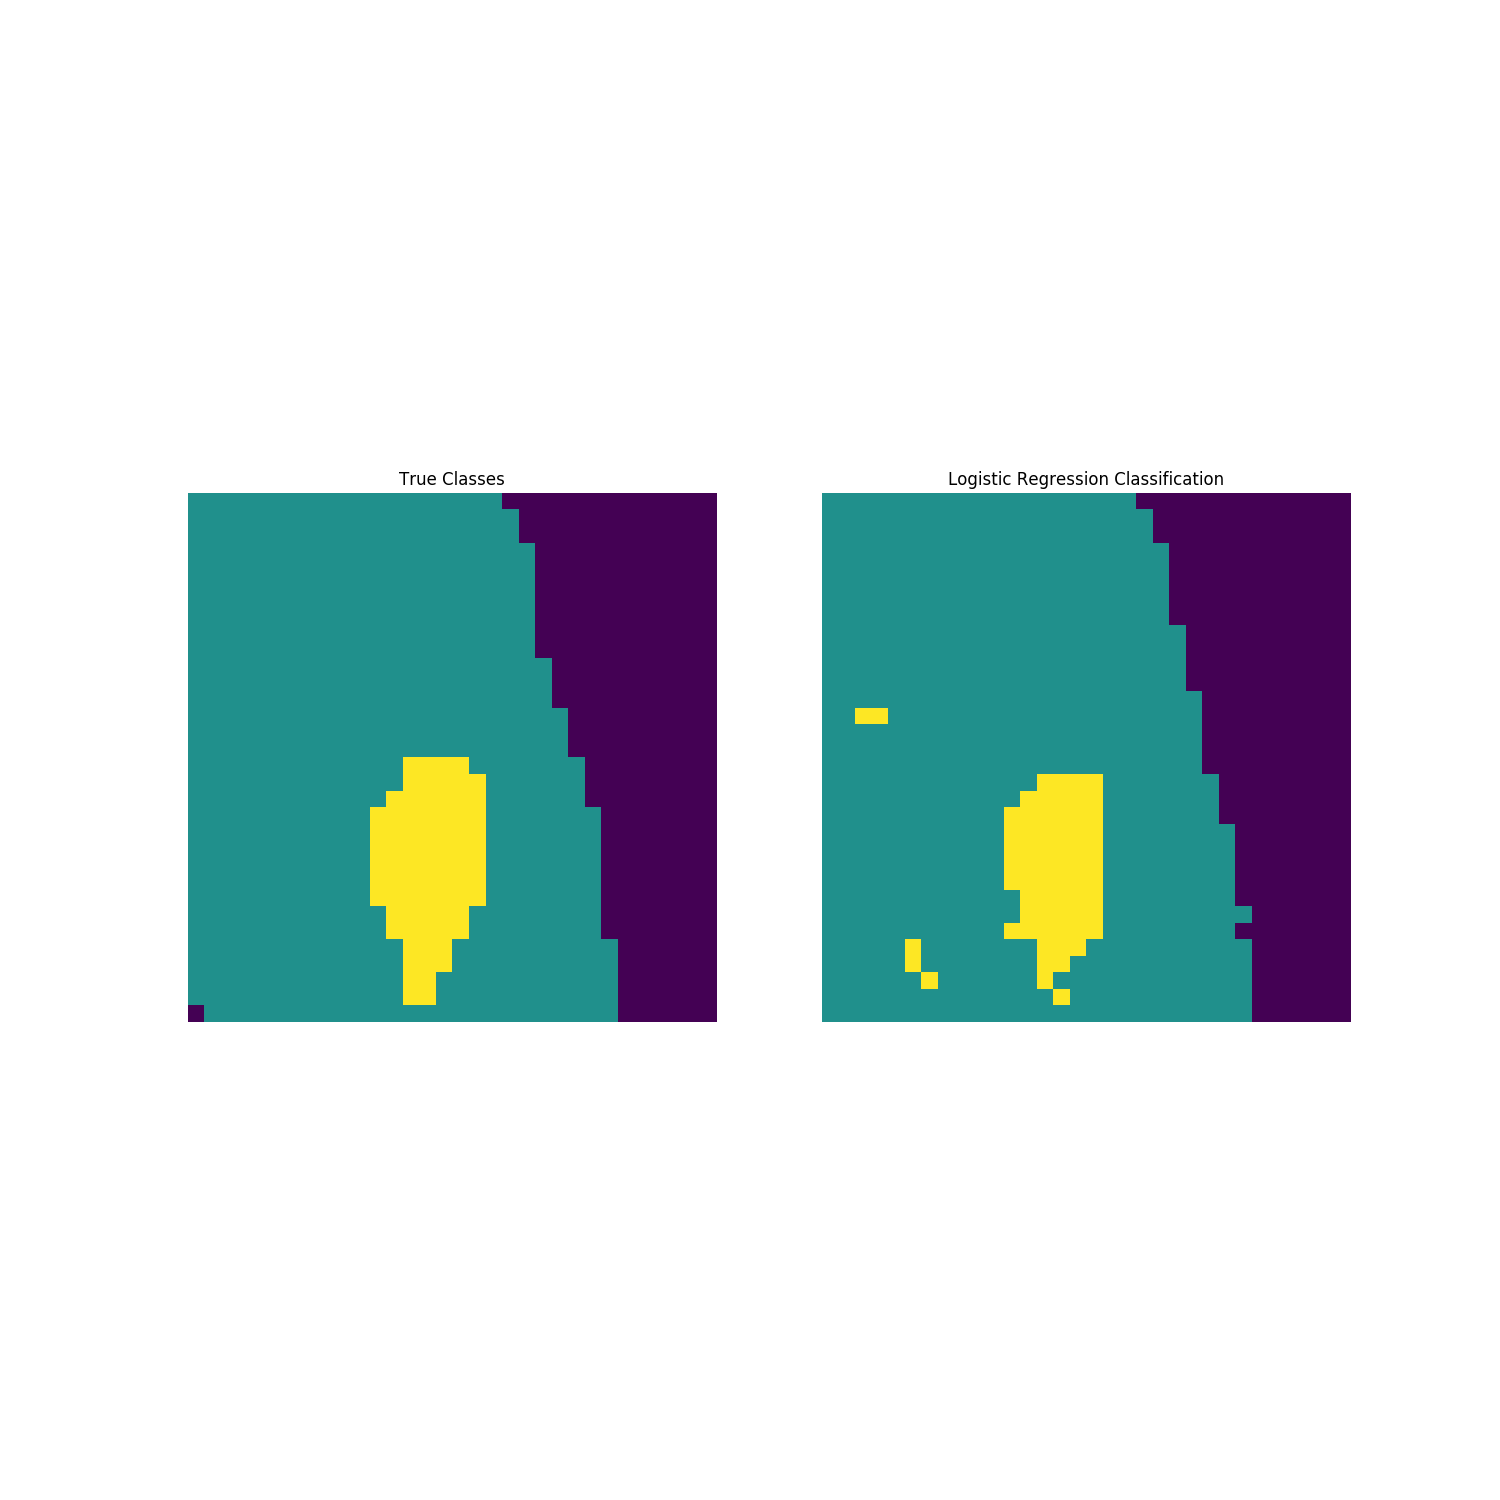

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8512


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


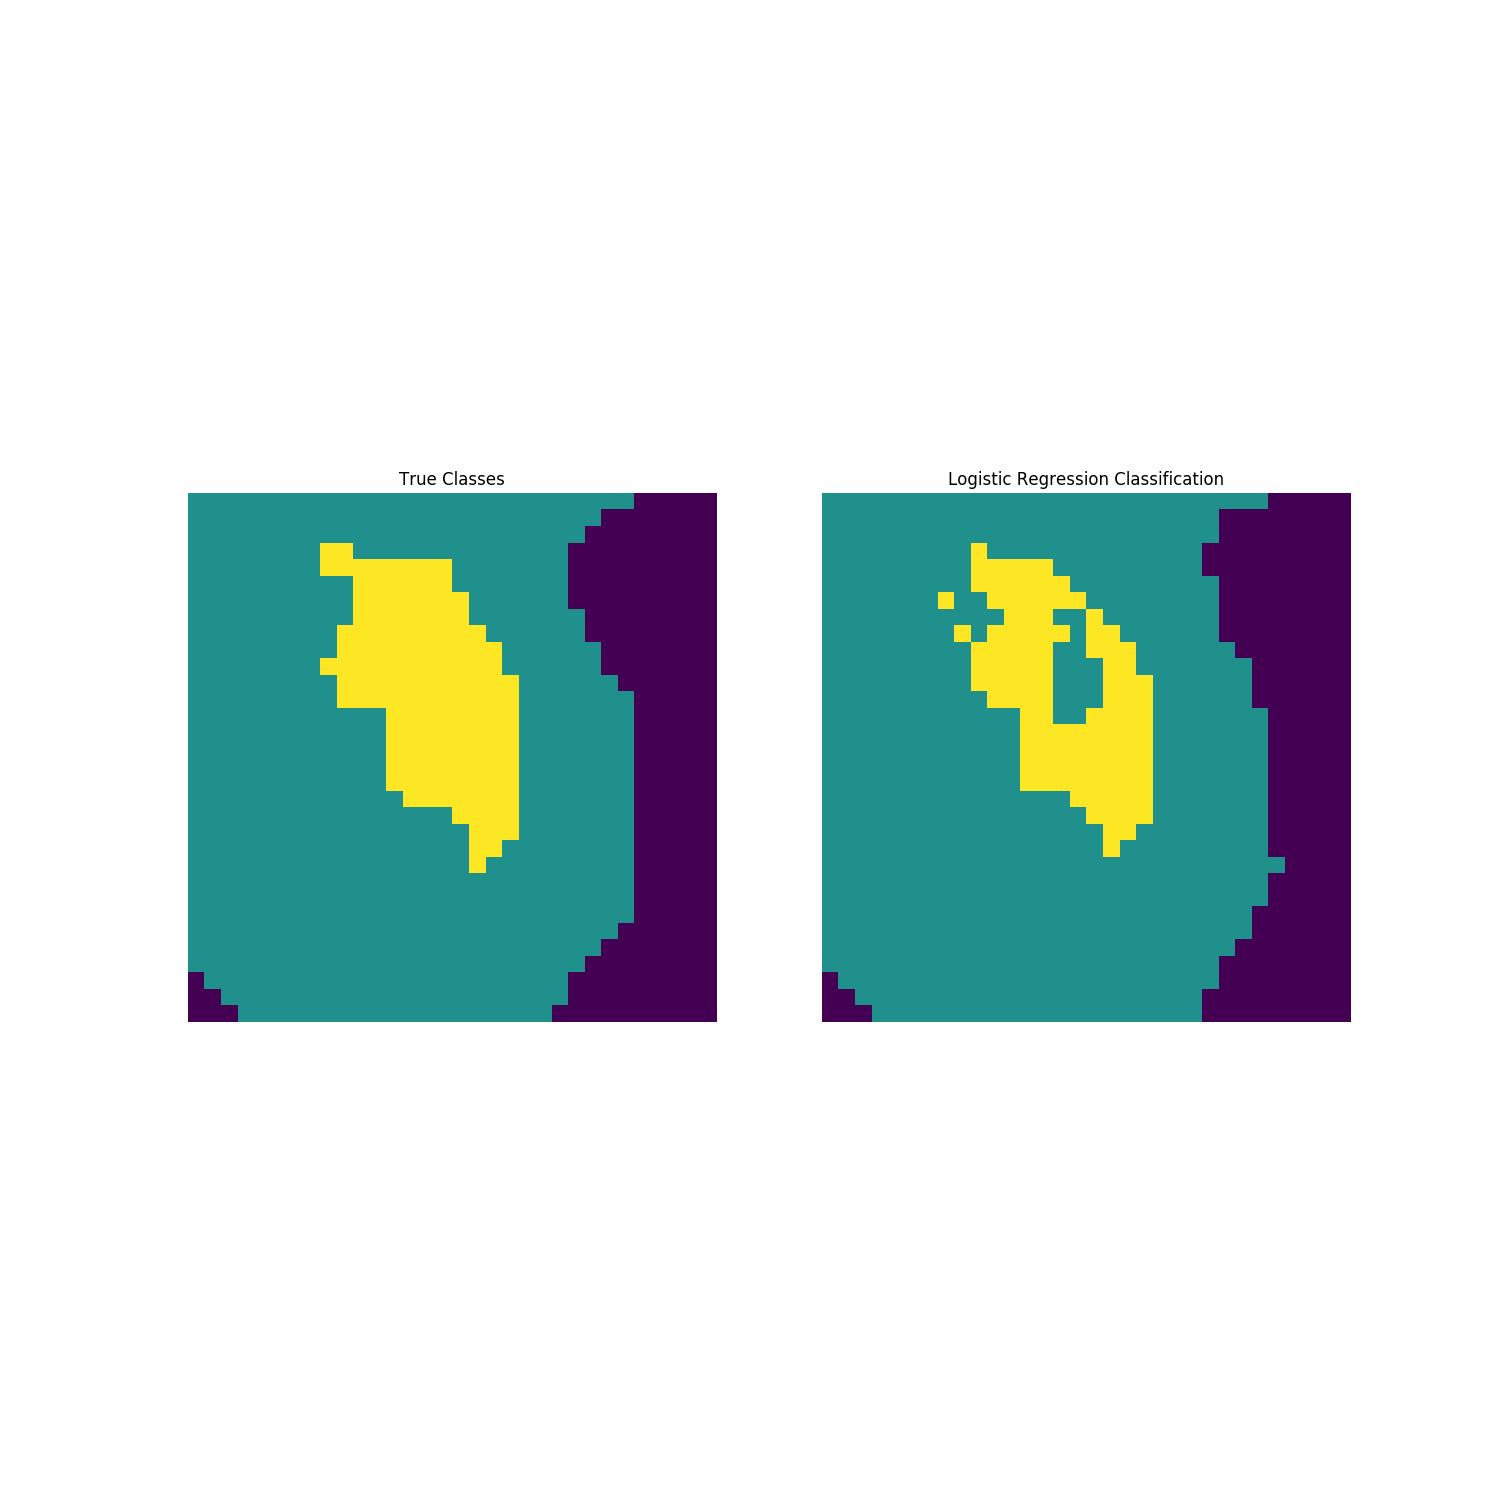

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8184


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


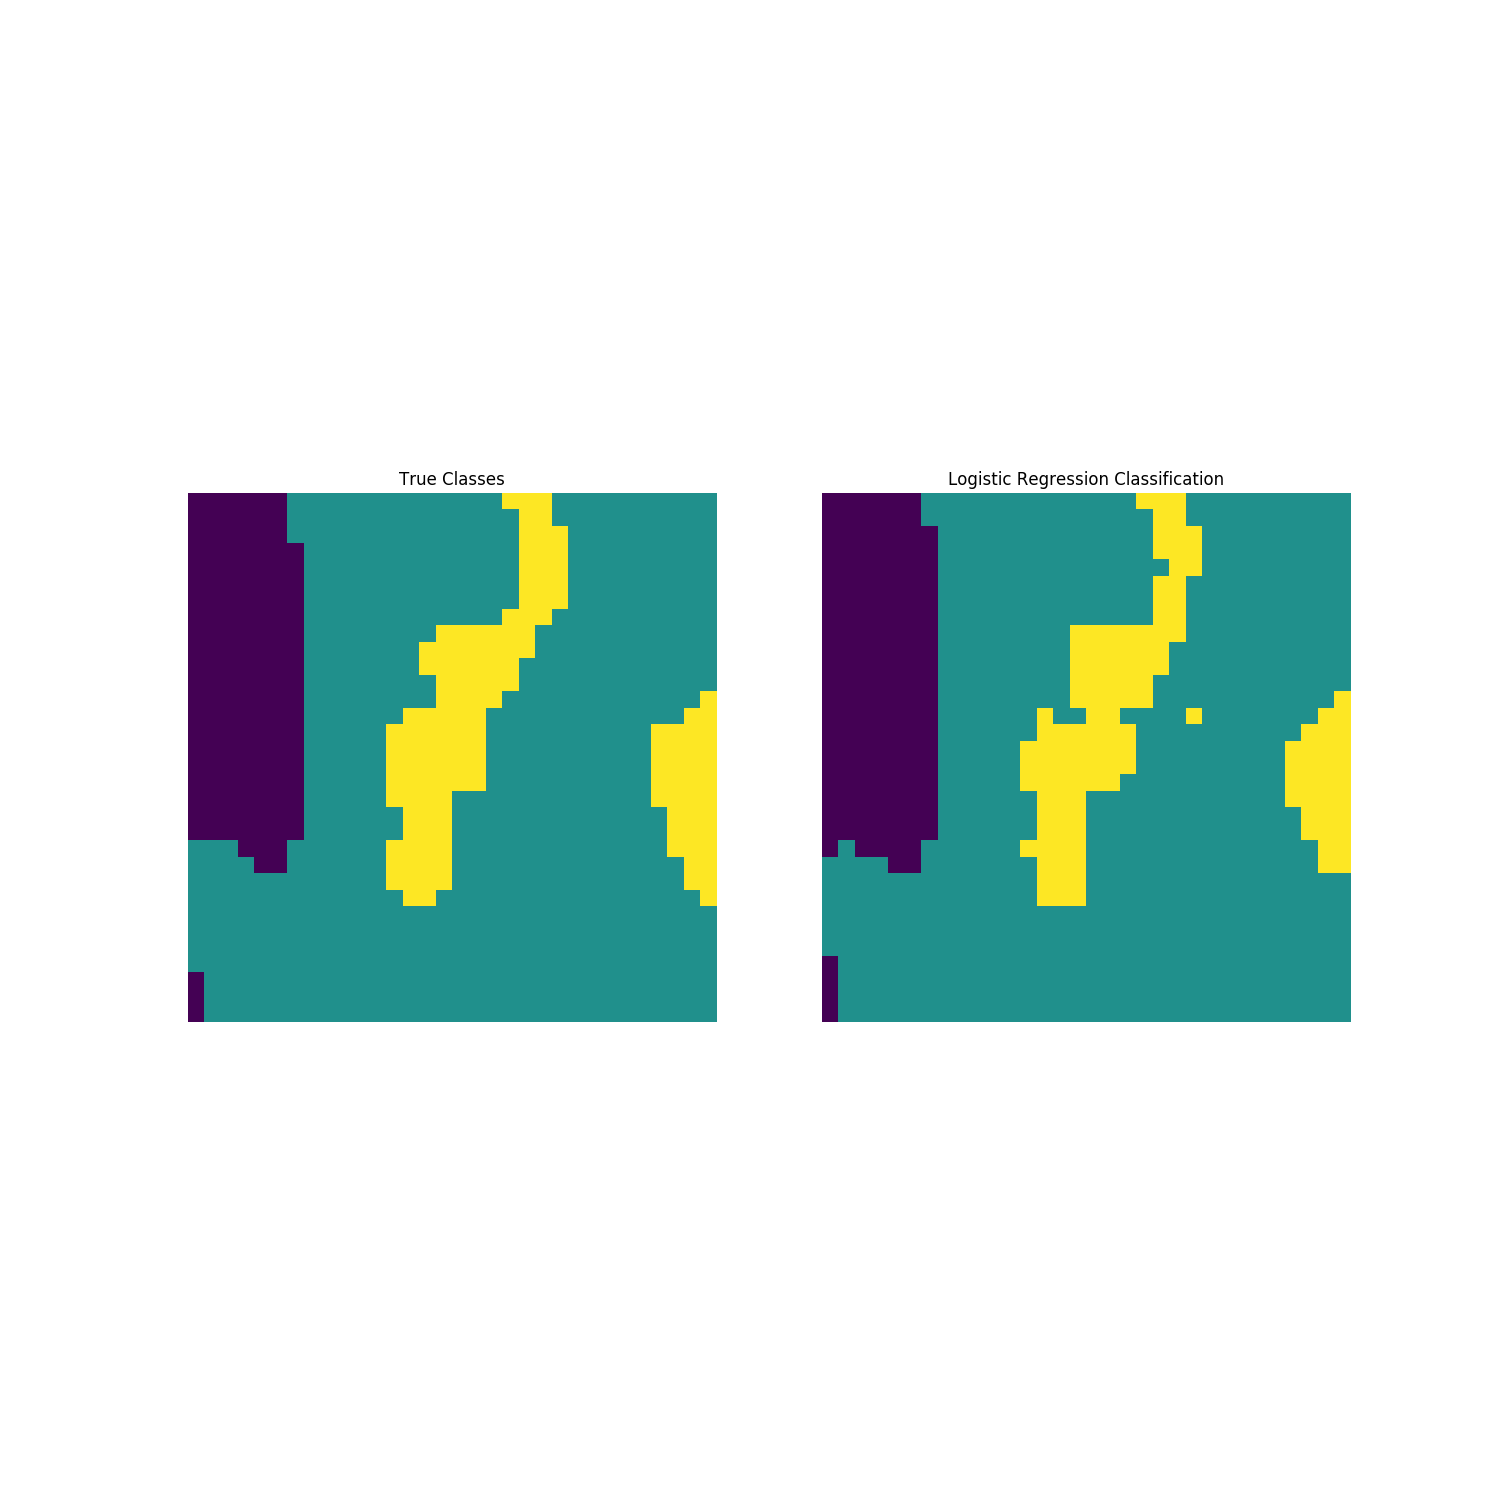

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9009


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


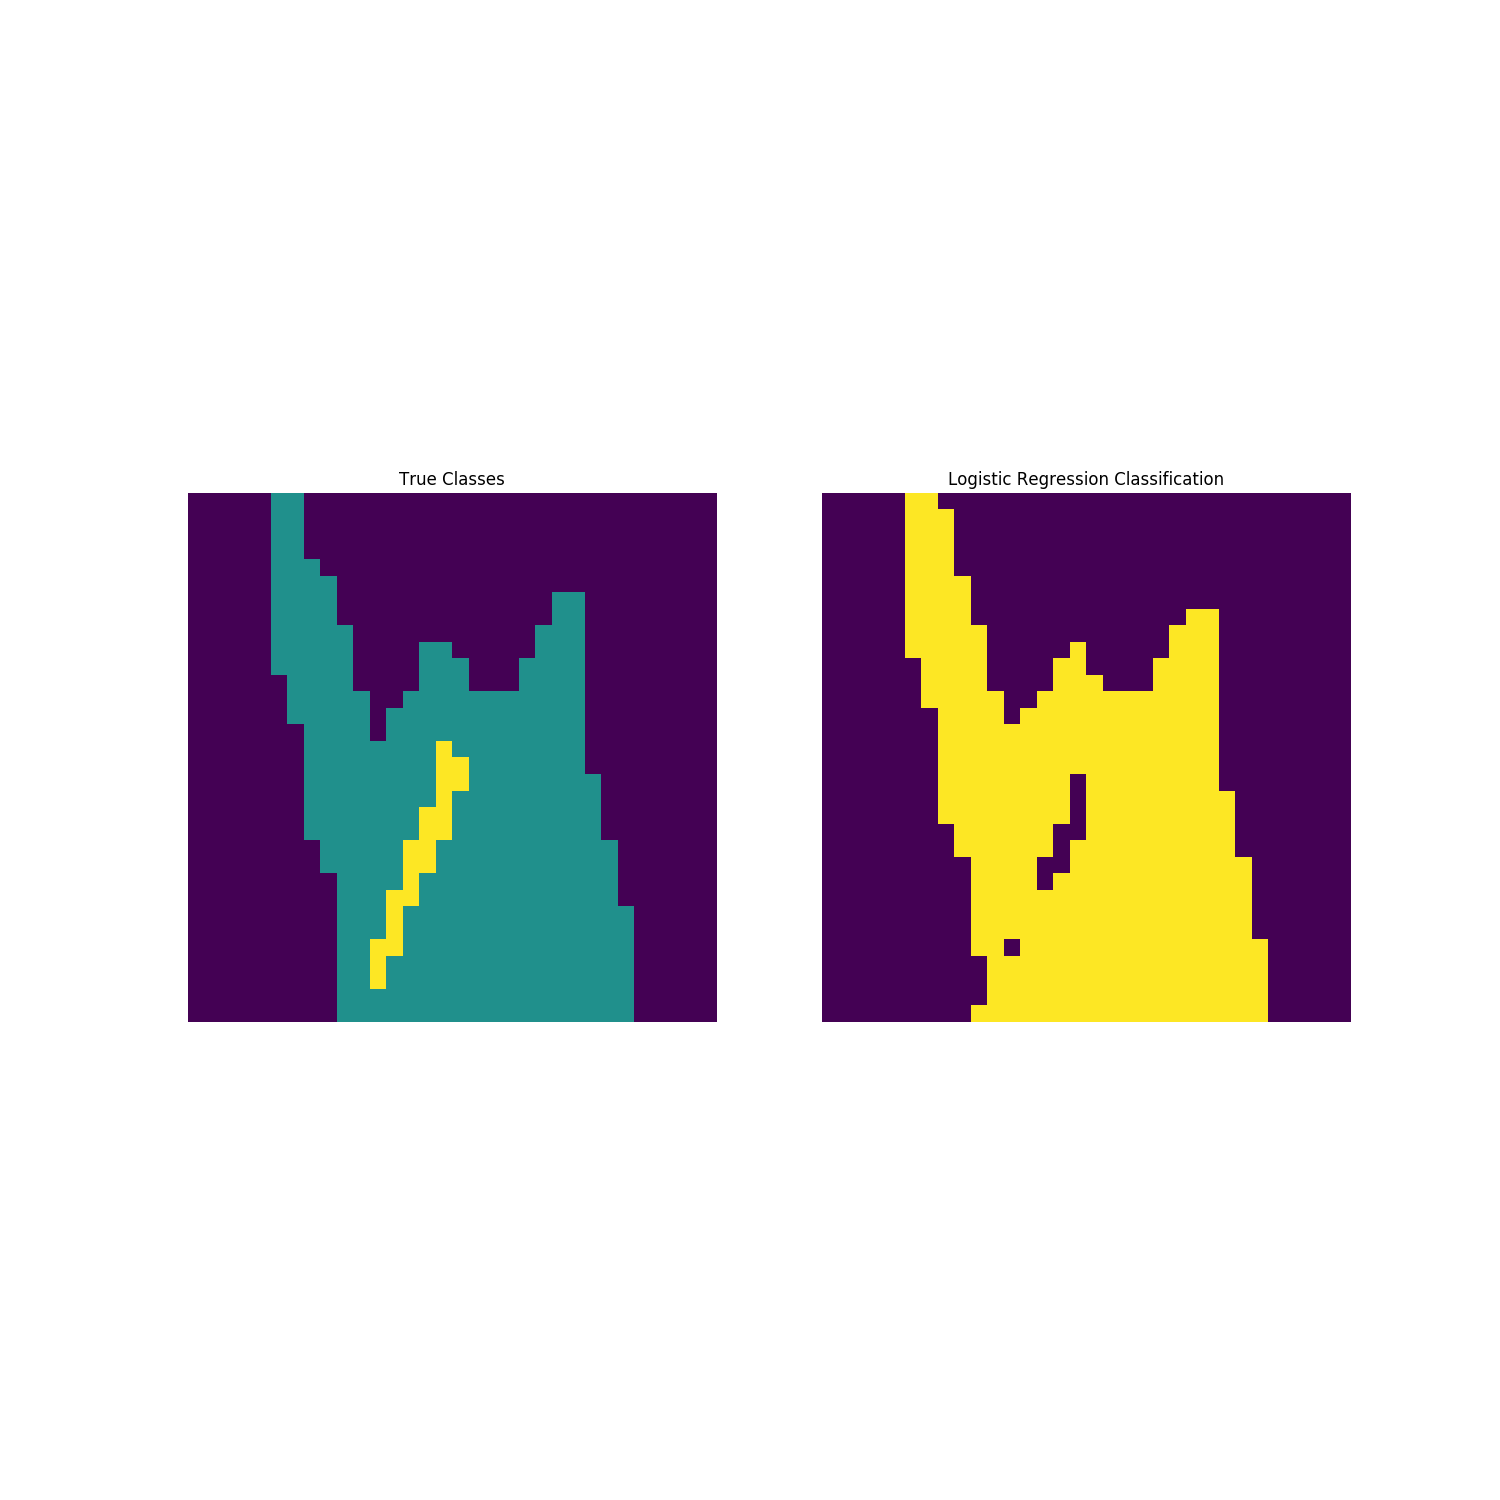

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.4451


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


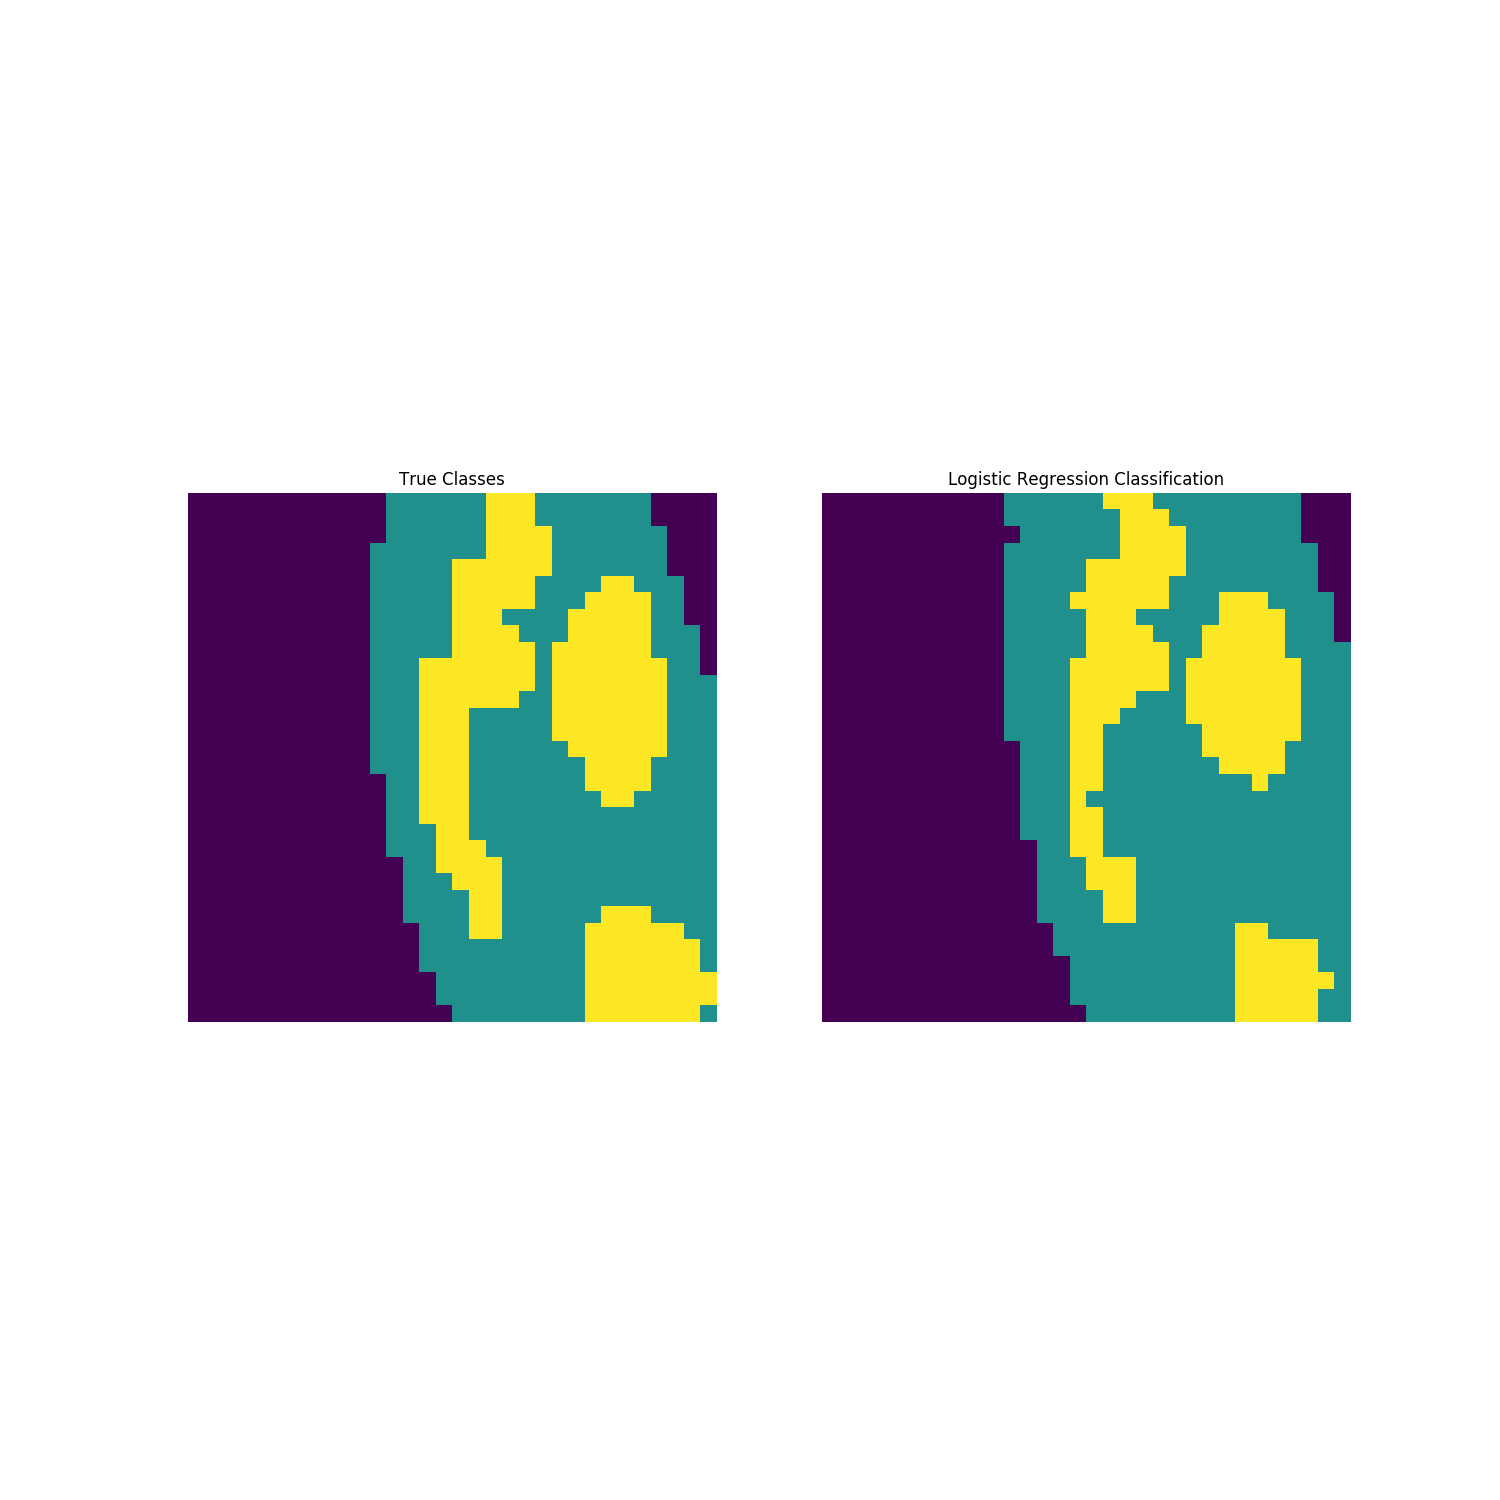

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8022


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


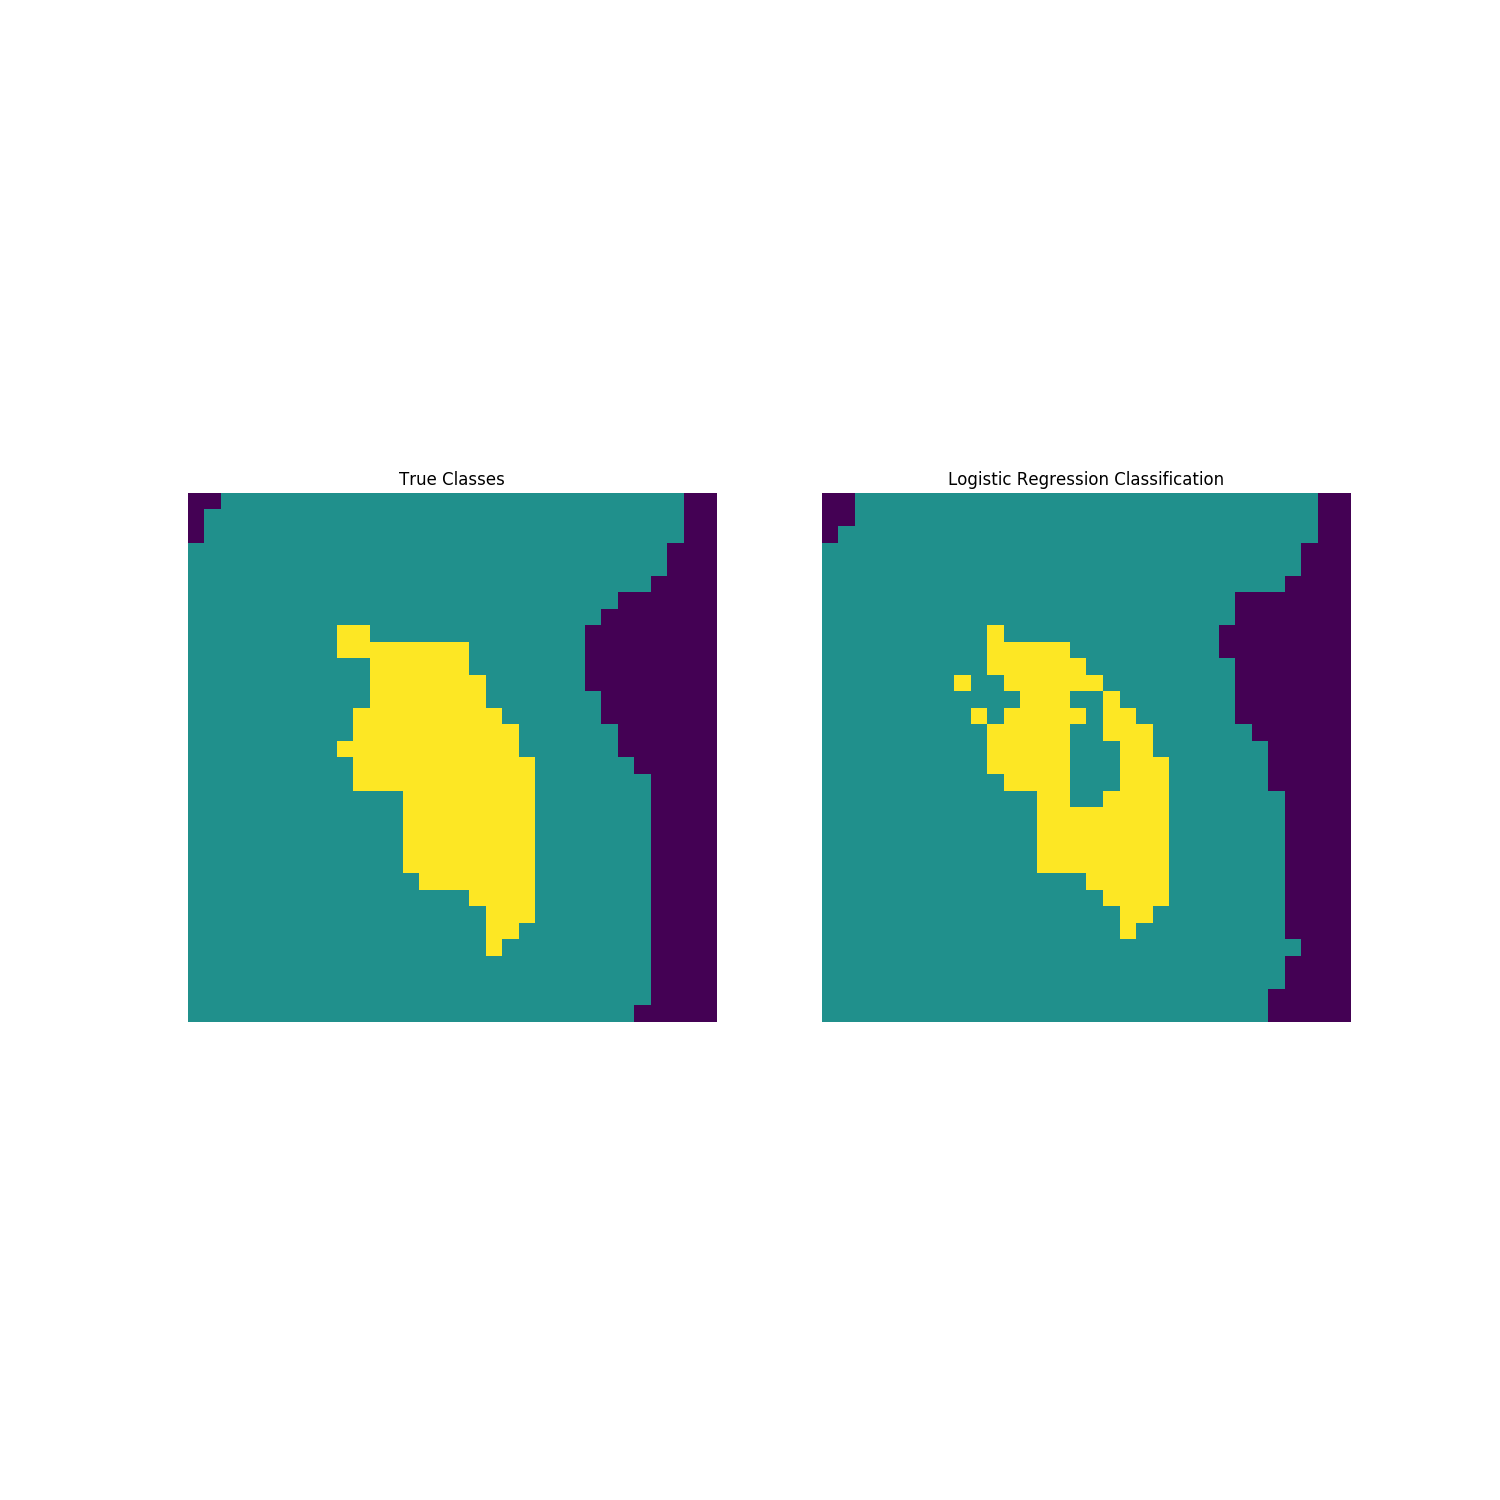

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8213


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


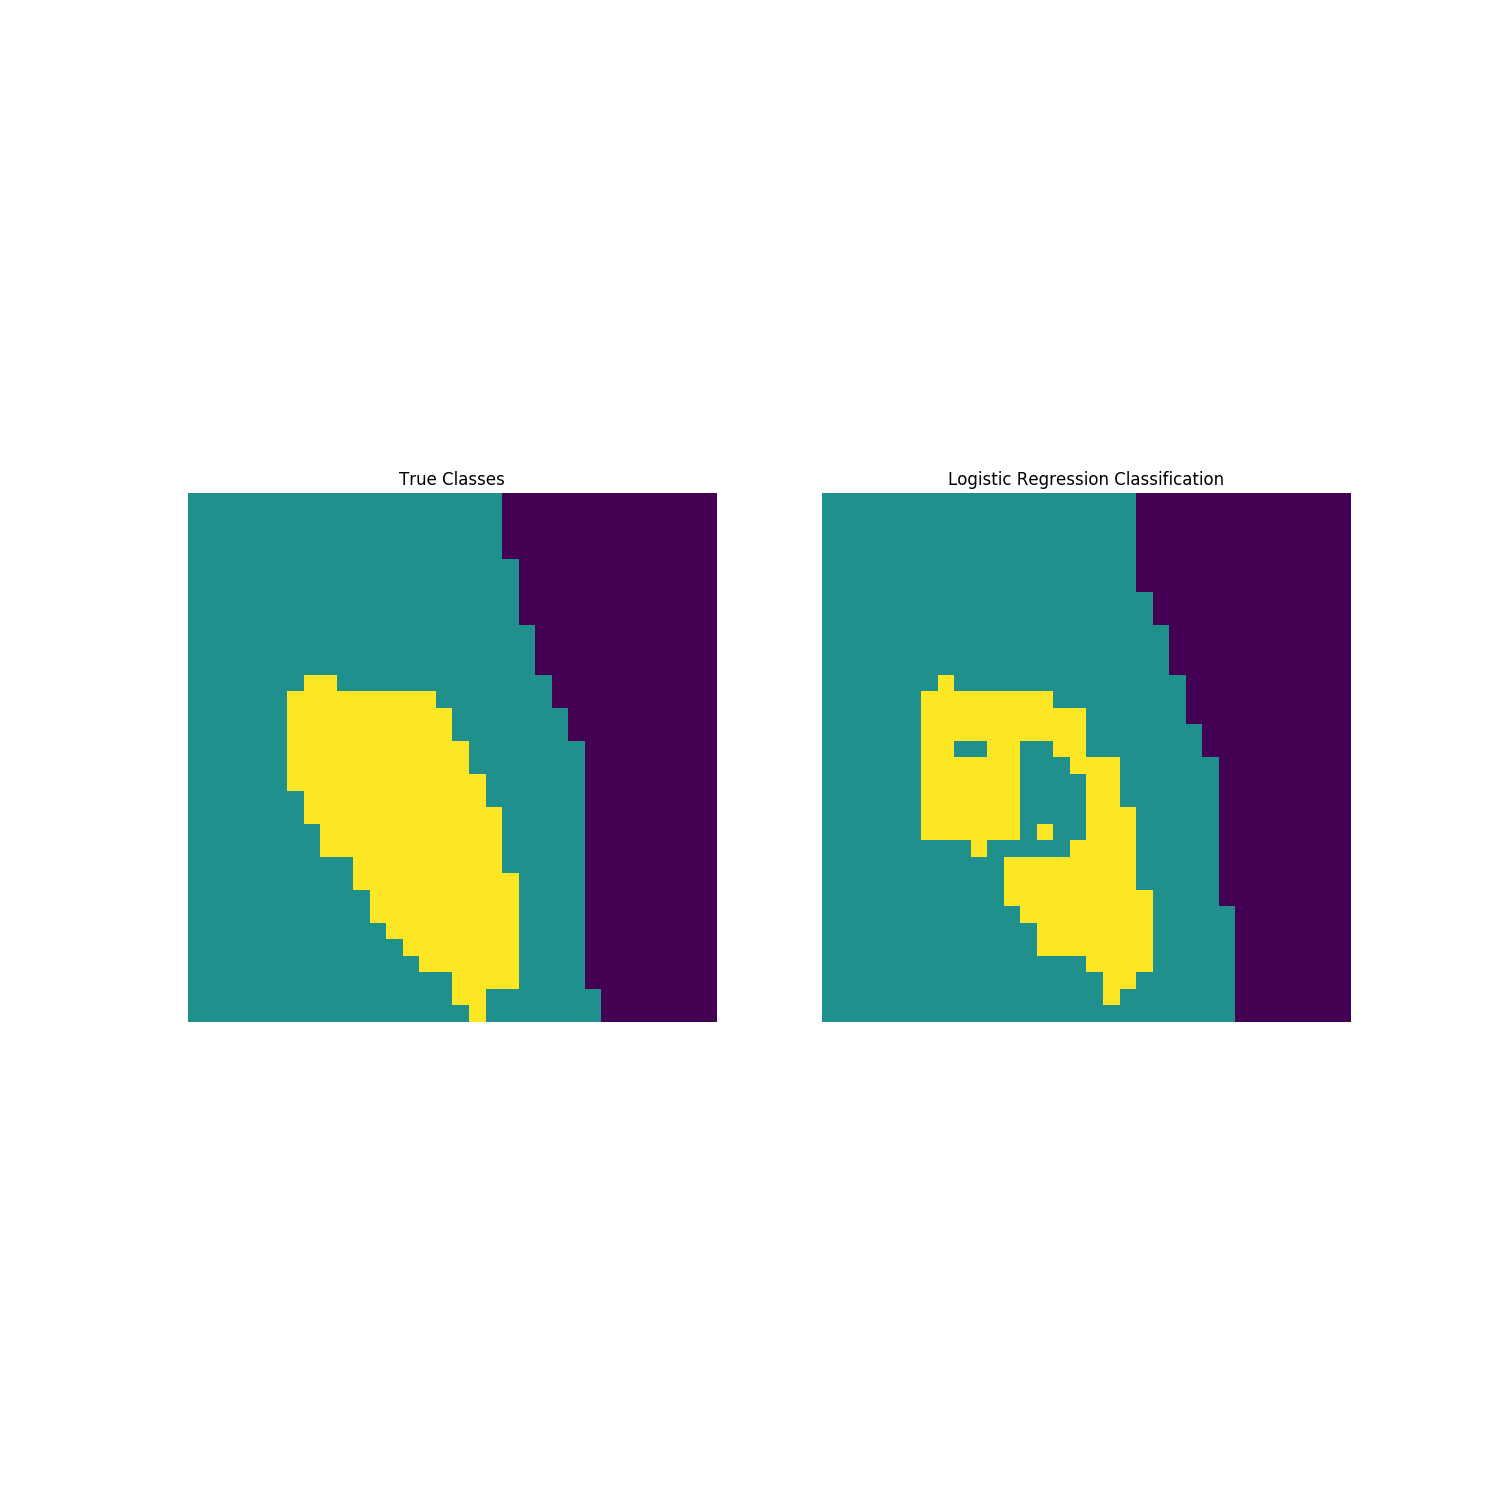

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.7901


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


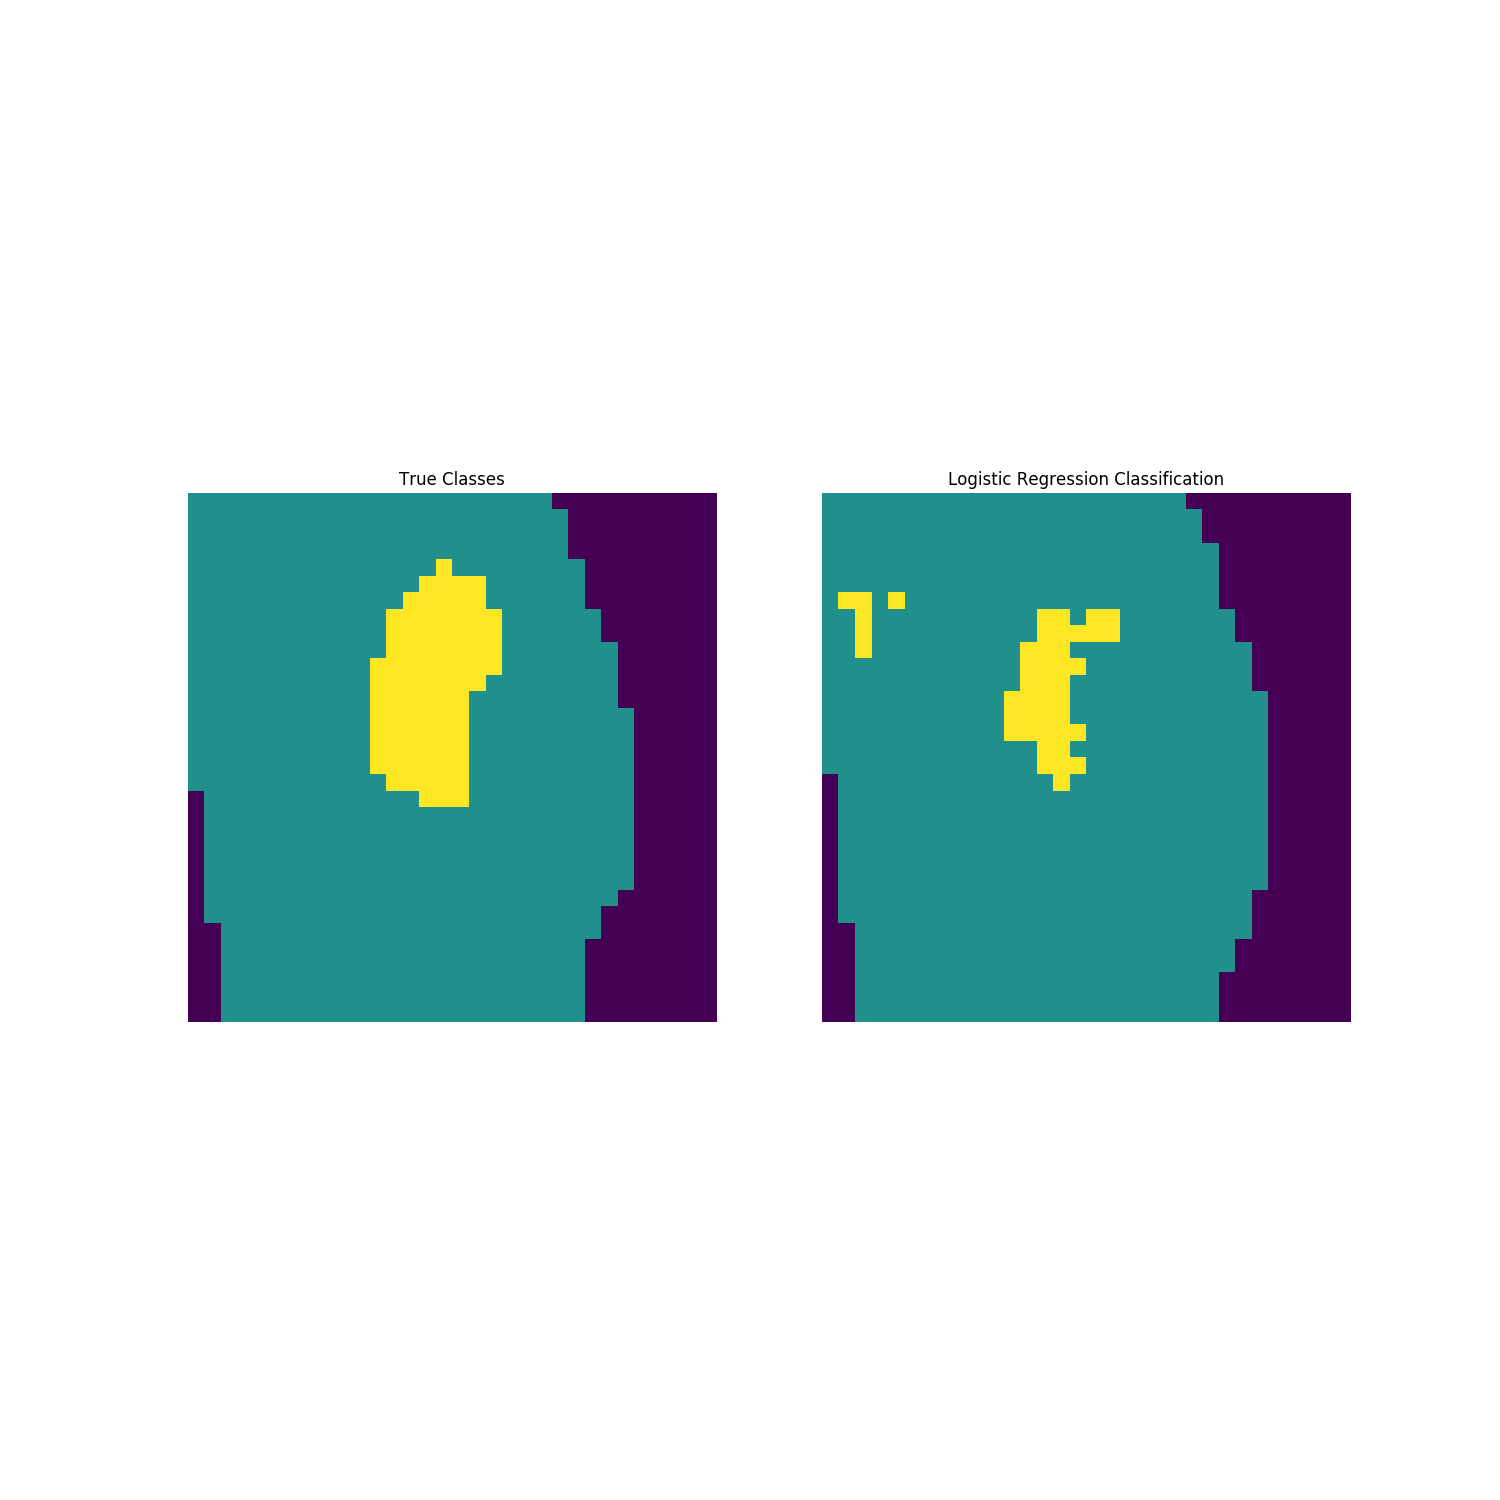

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.6115


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


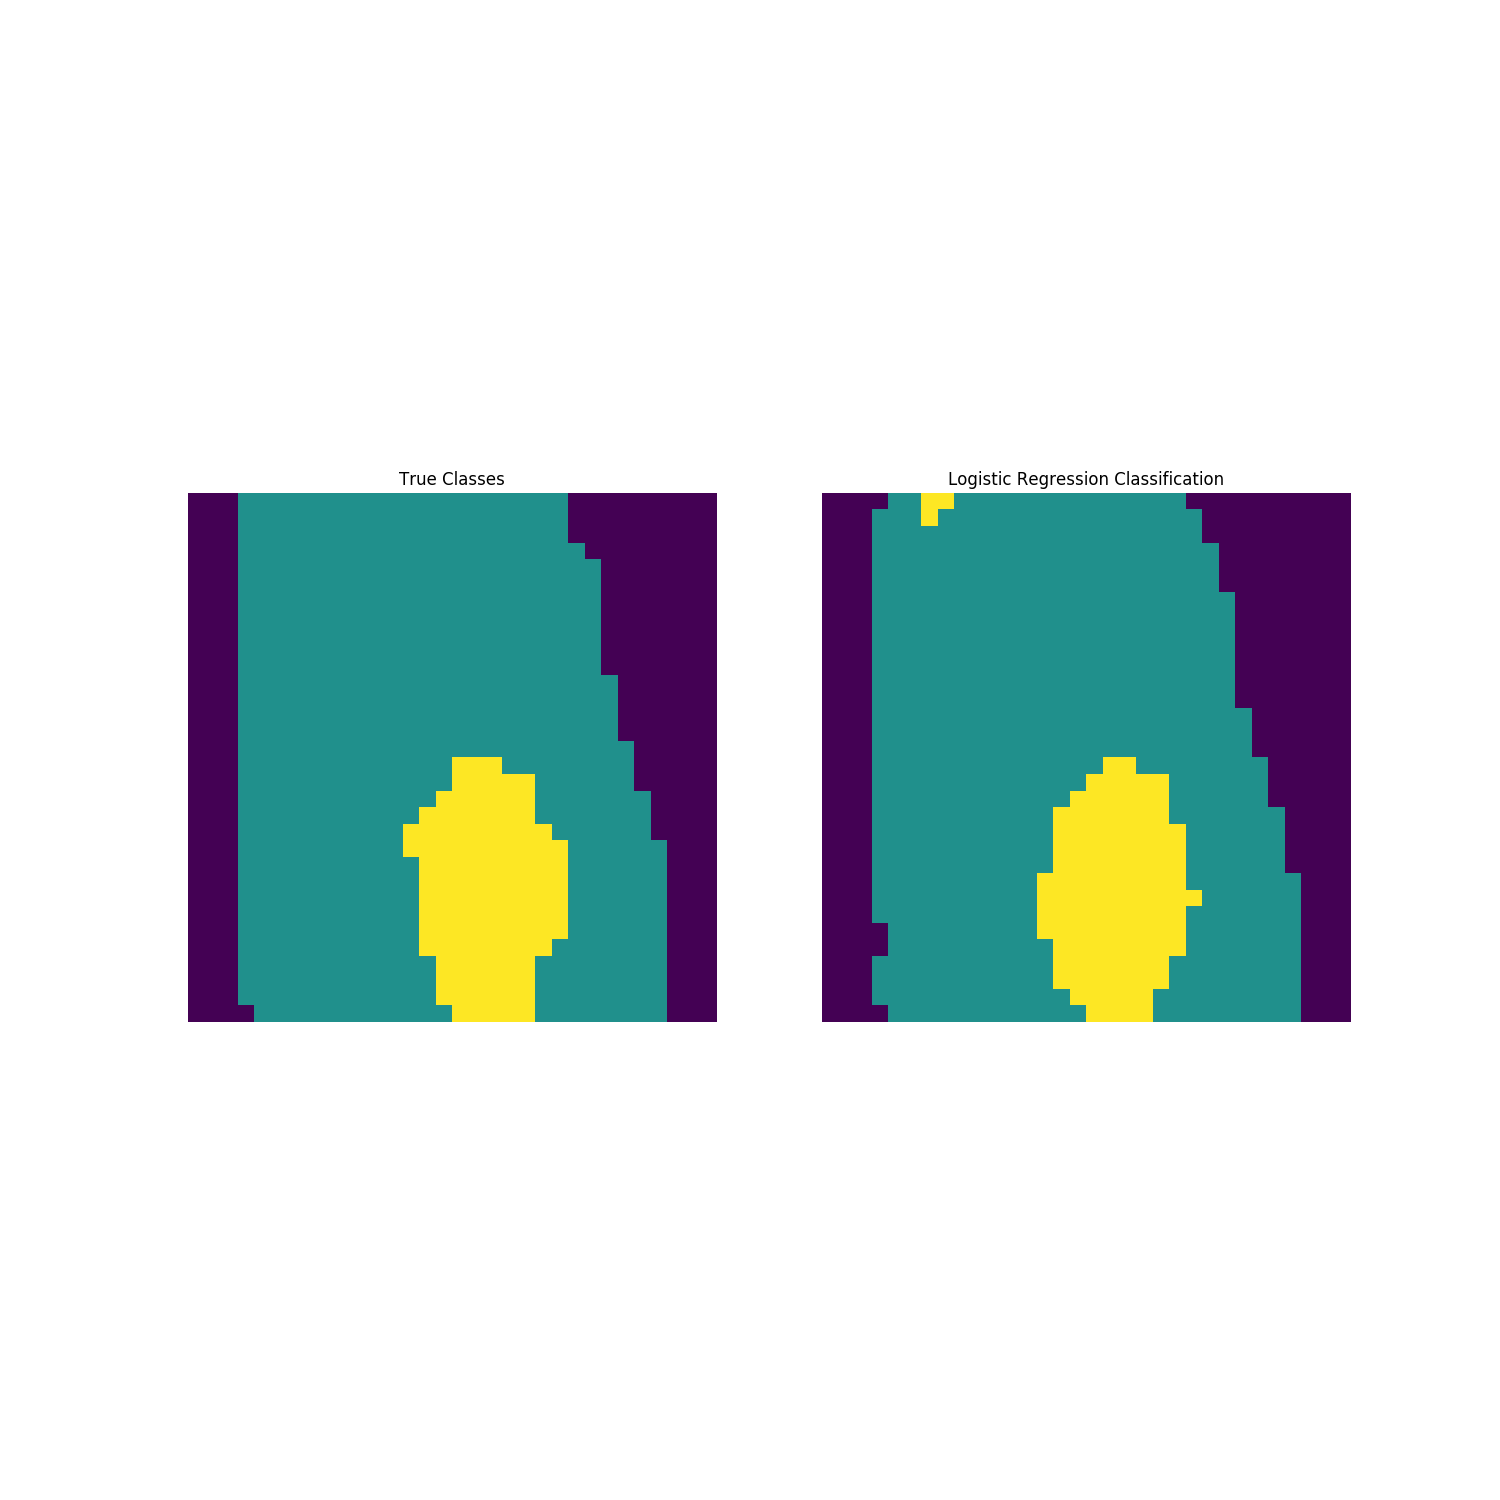

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9254


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


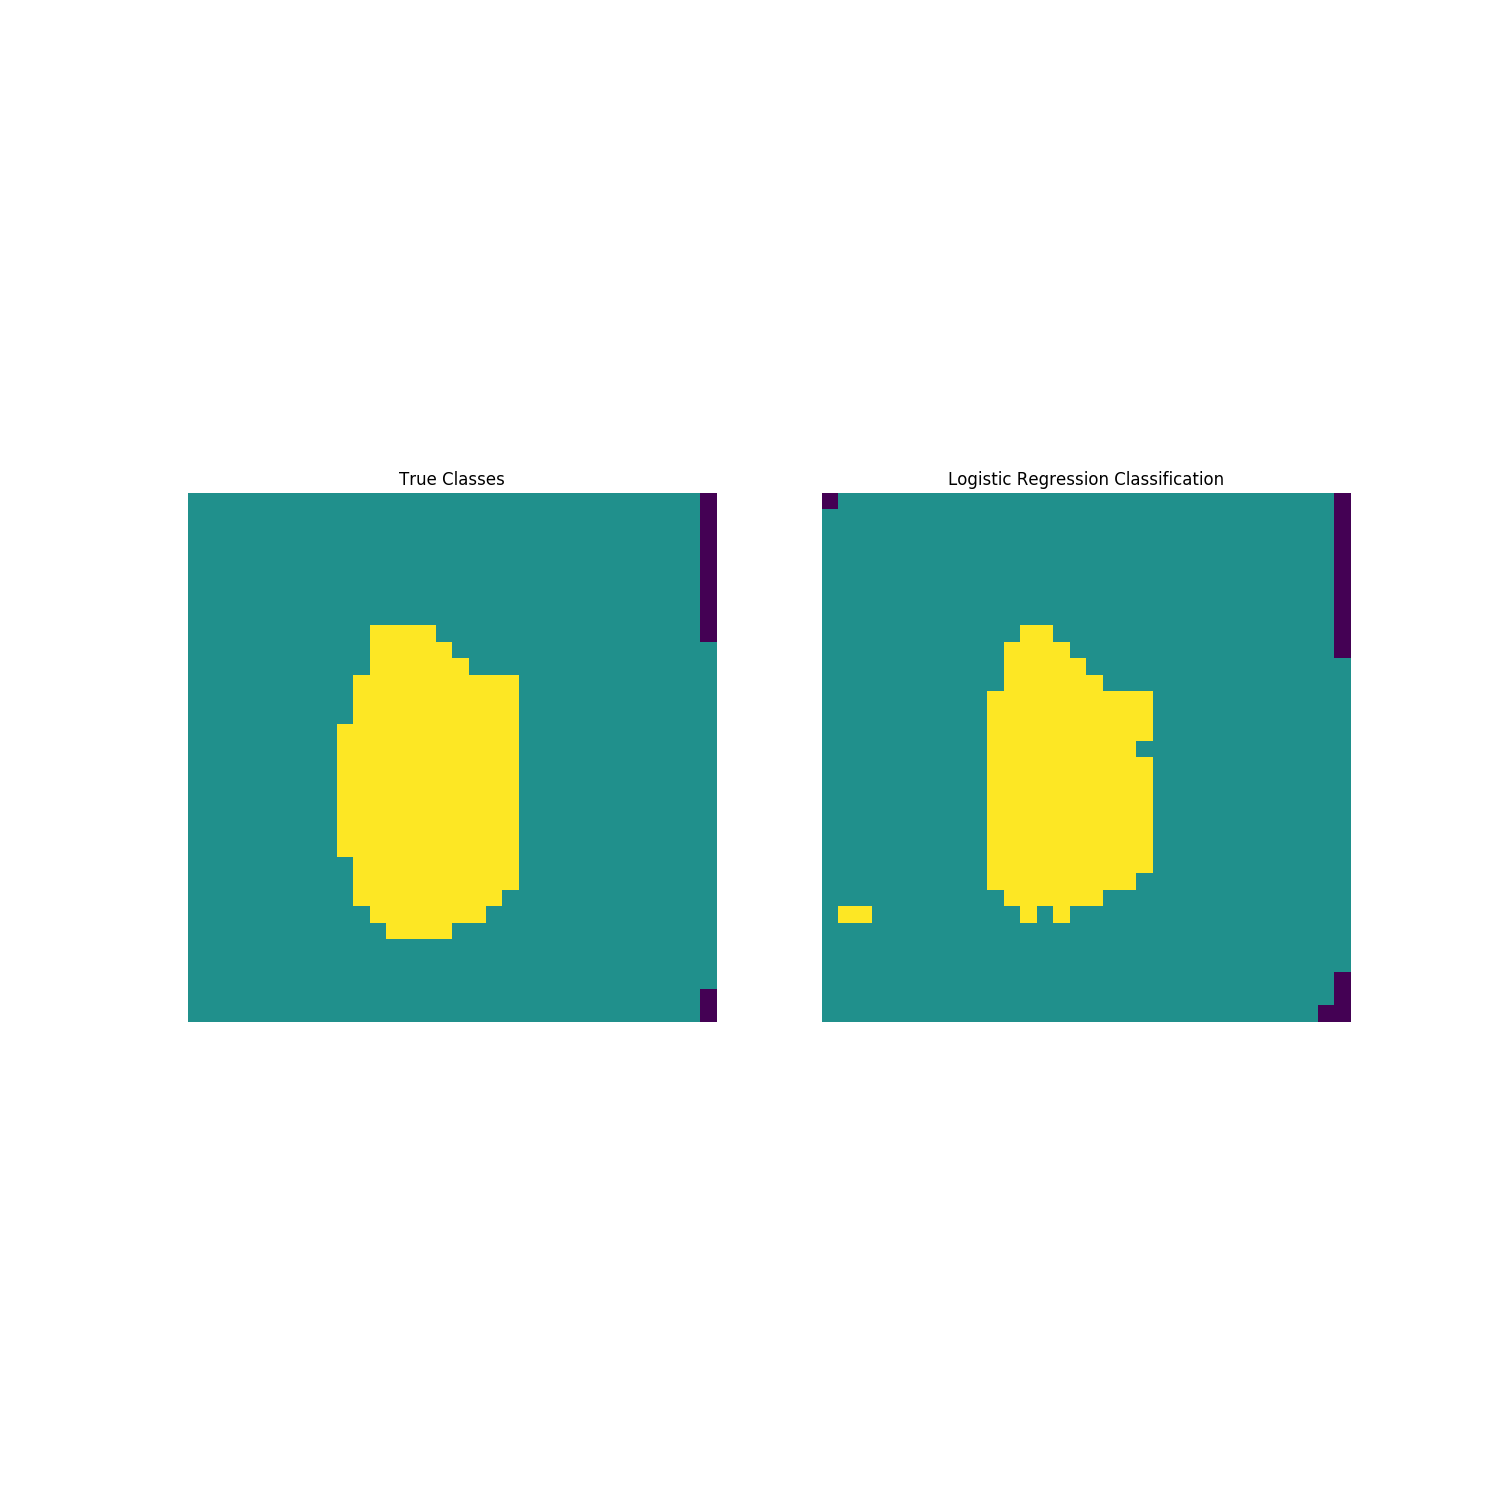

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8591


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


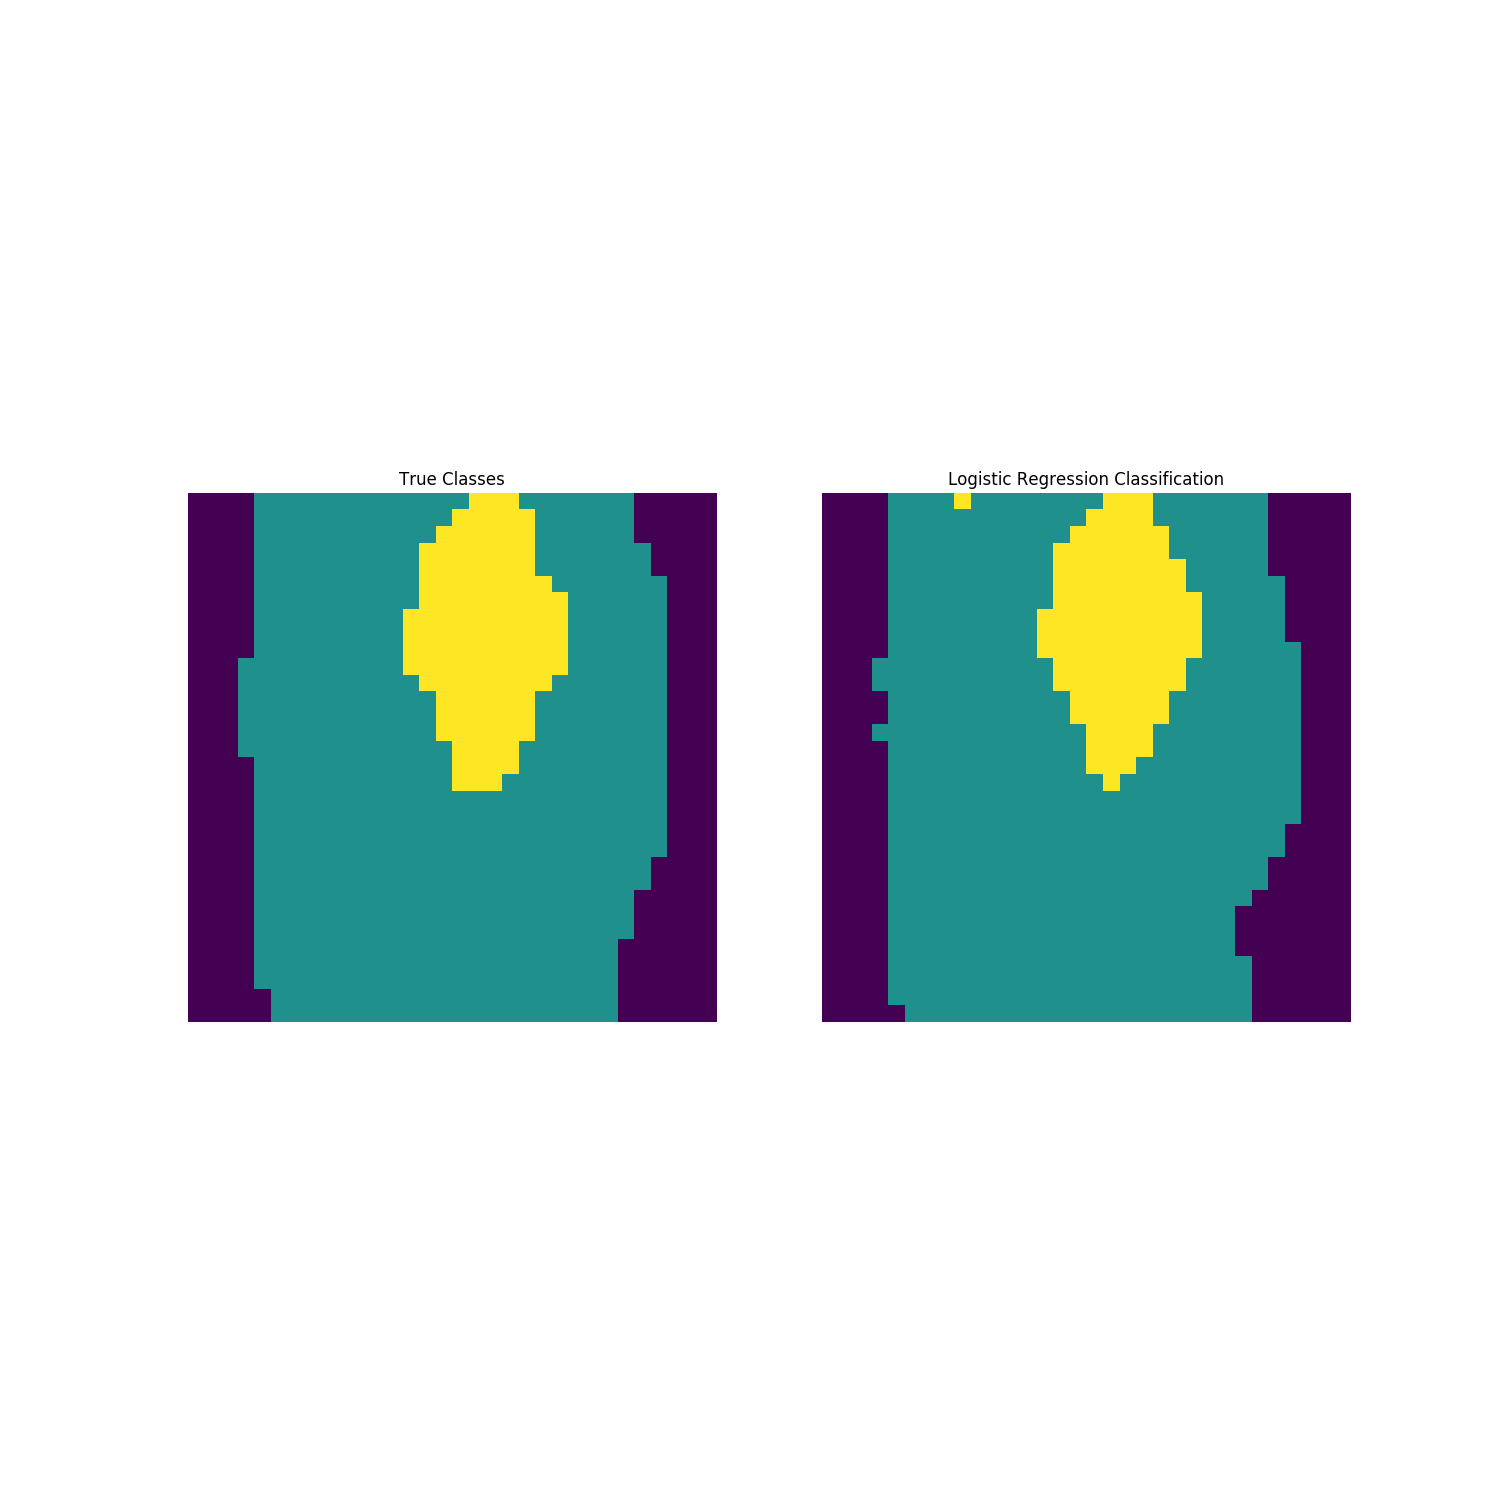

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9414


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


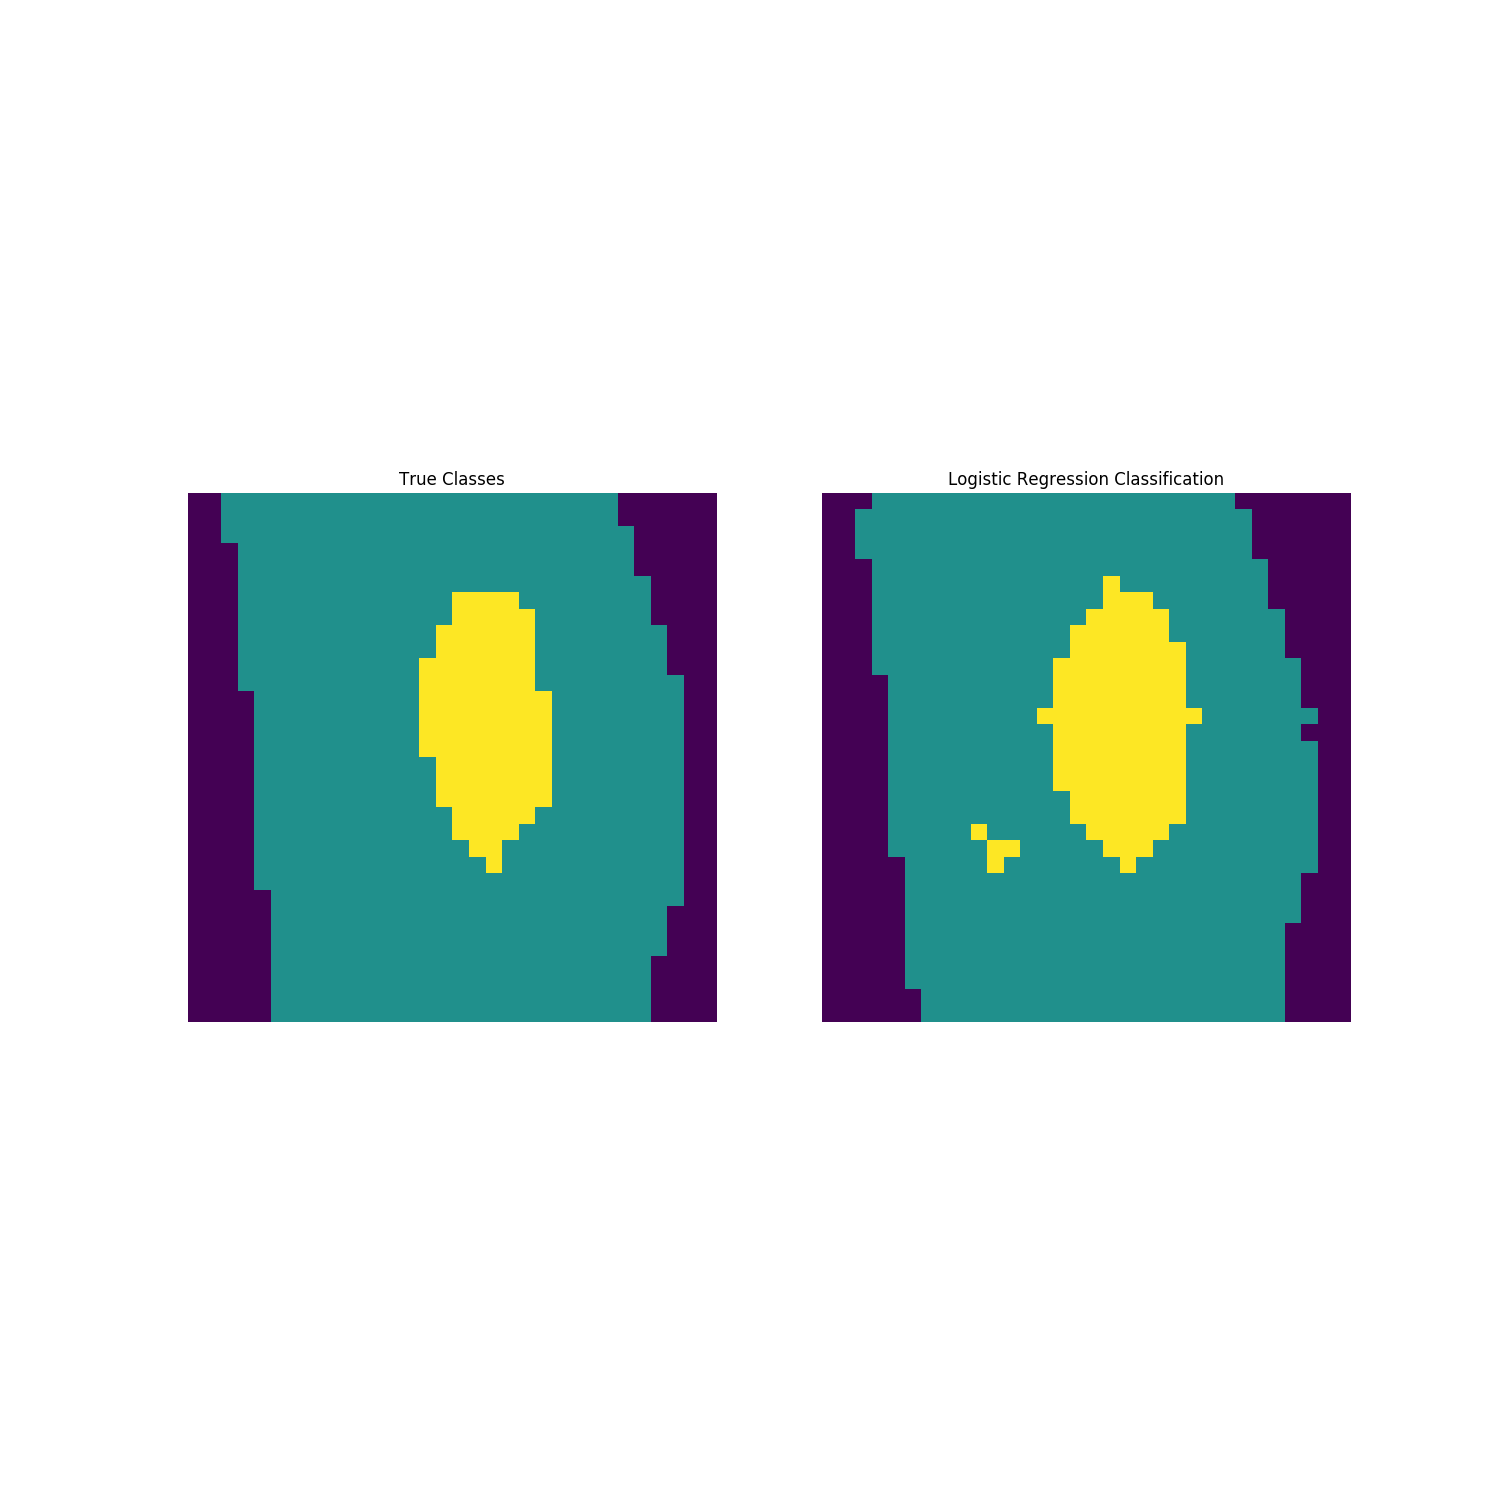

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9793


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


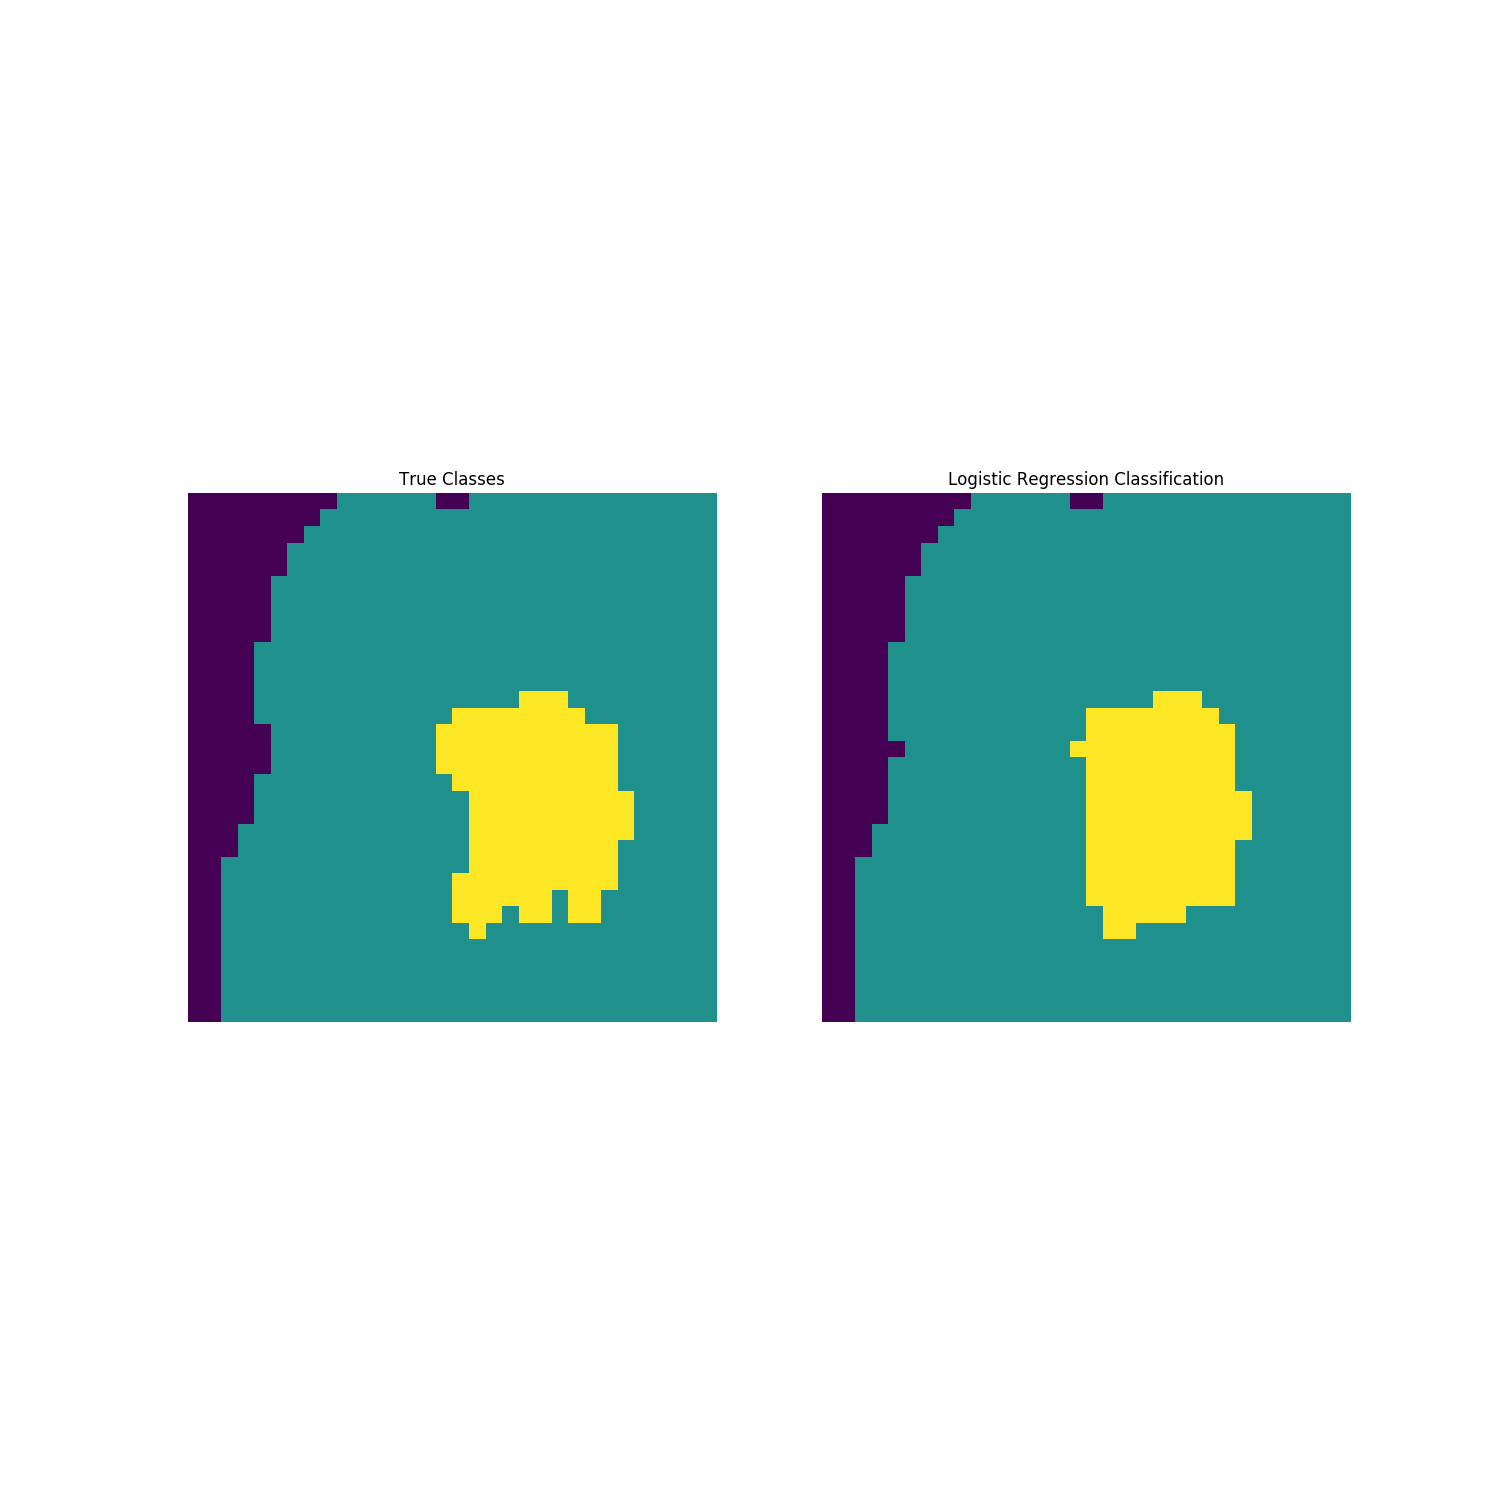

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9074


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


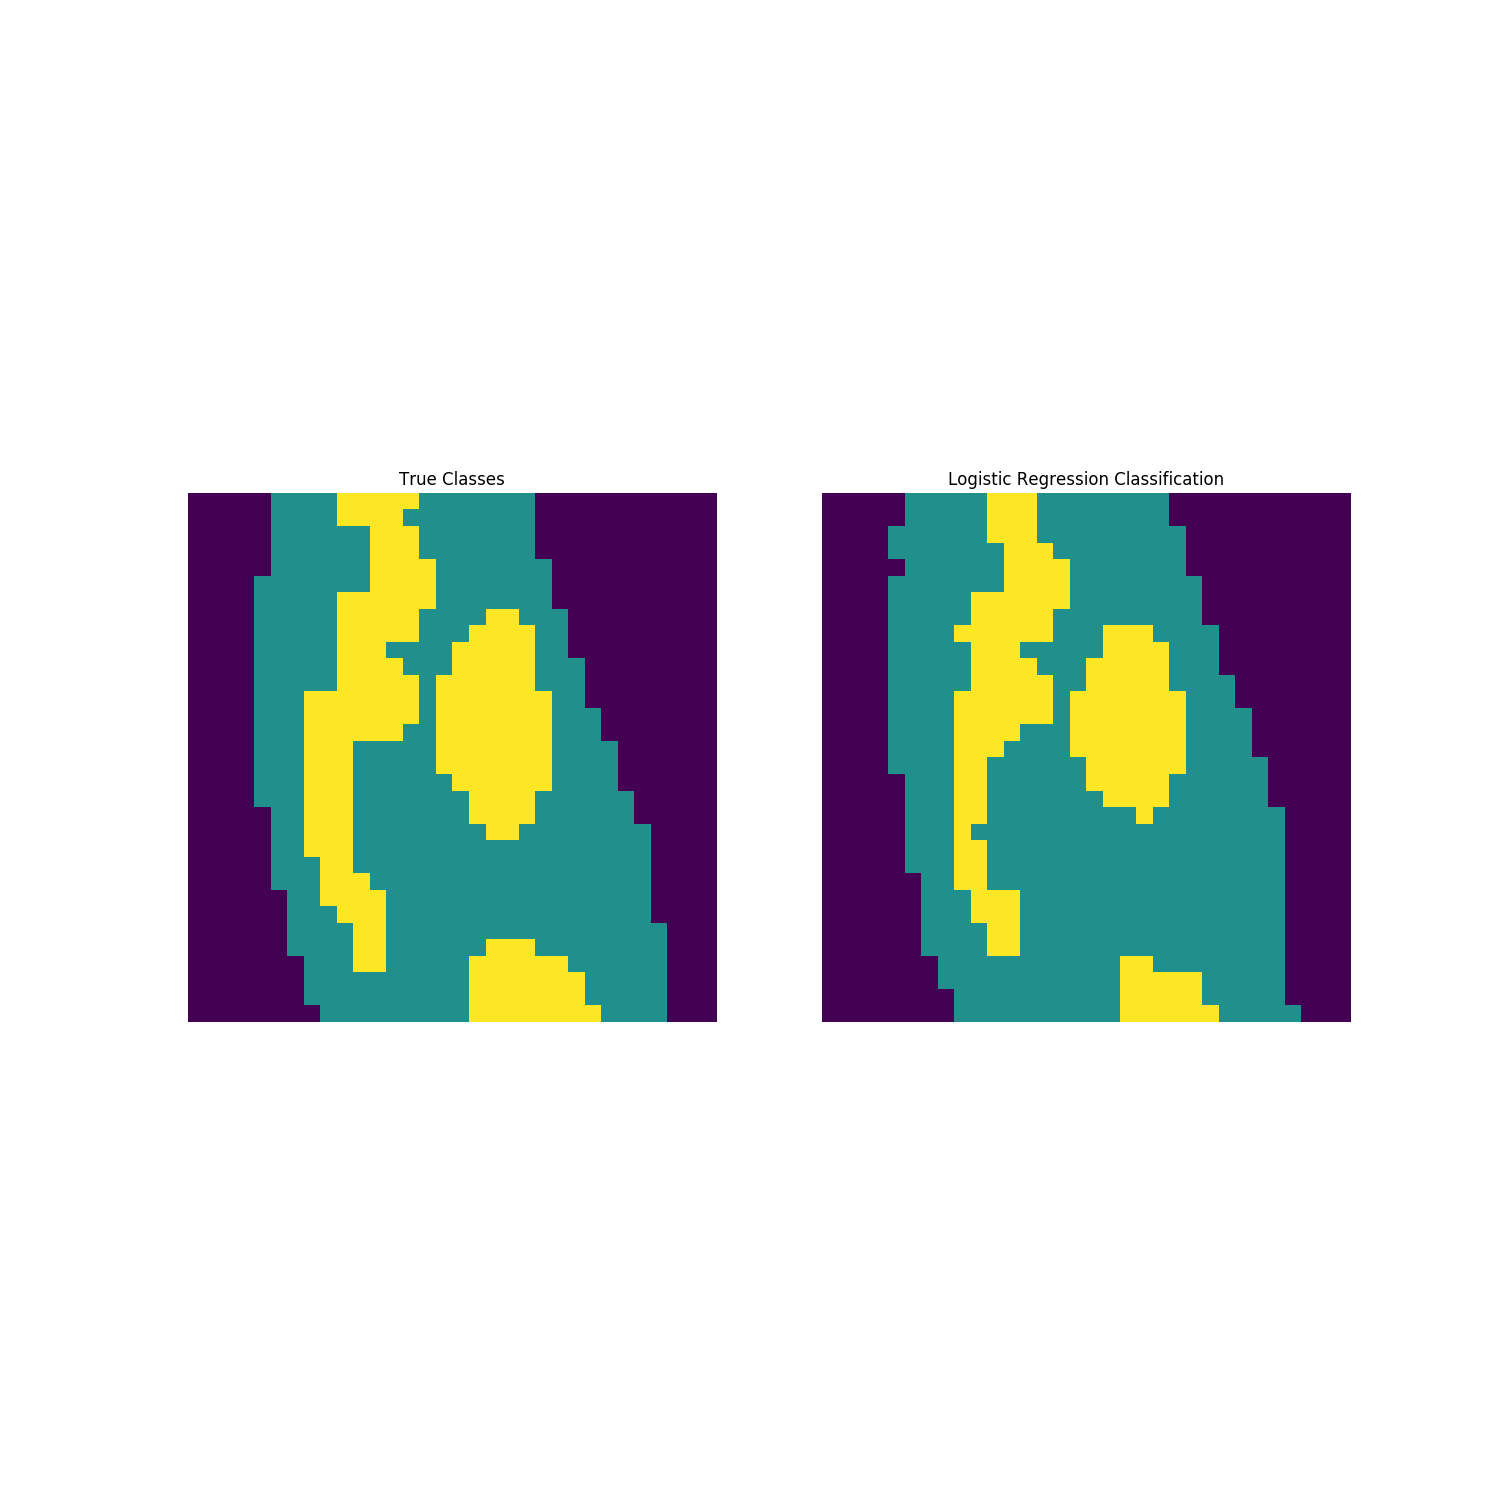

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8069


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


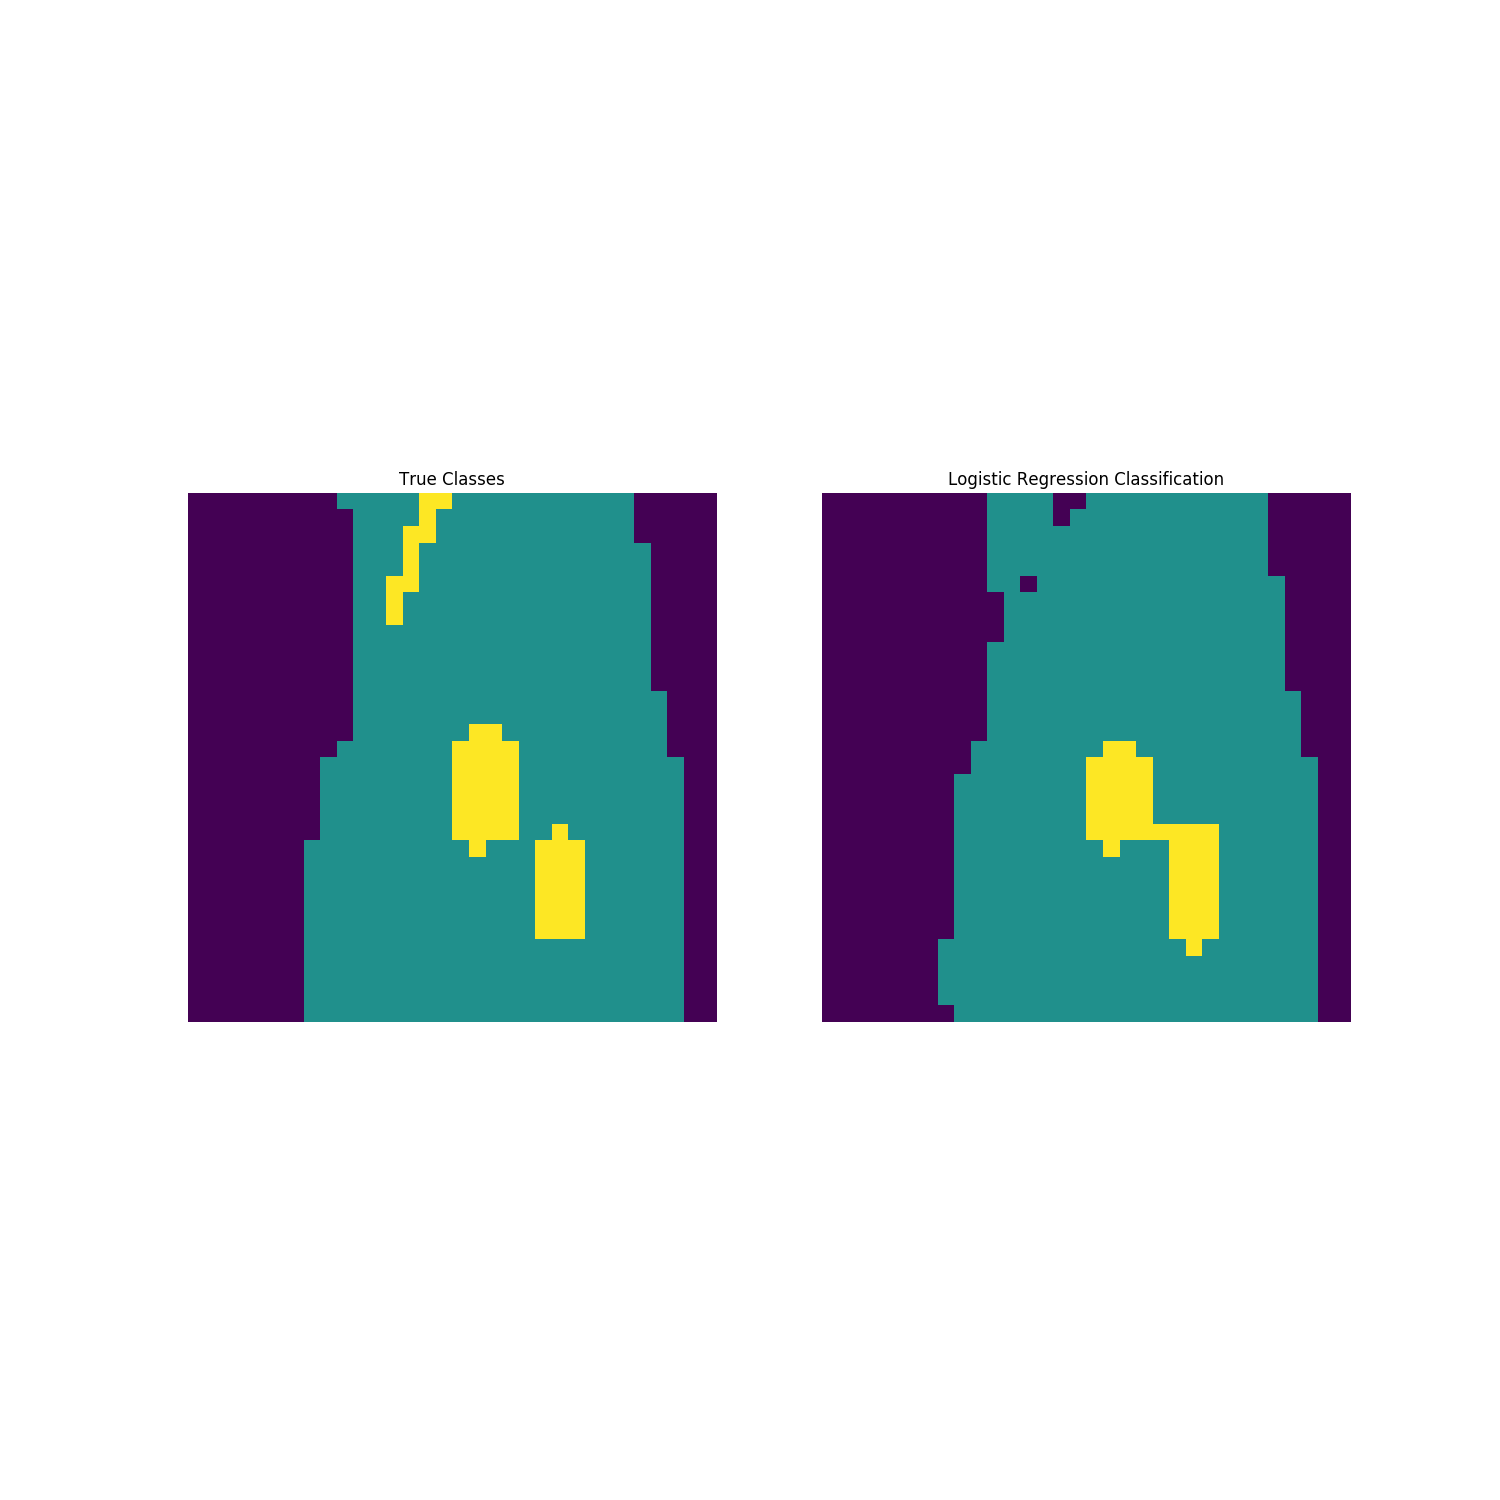

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8169


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


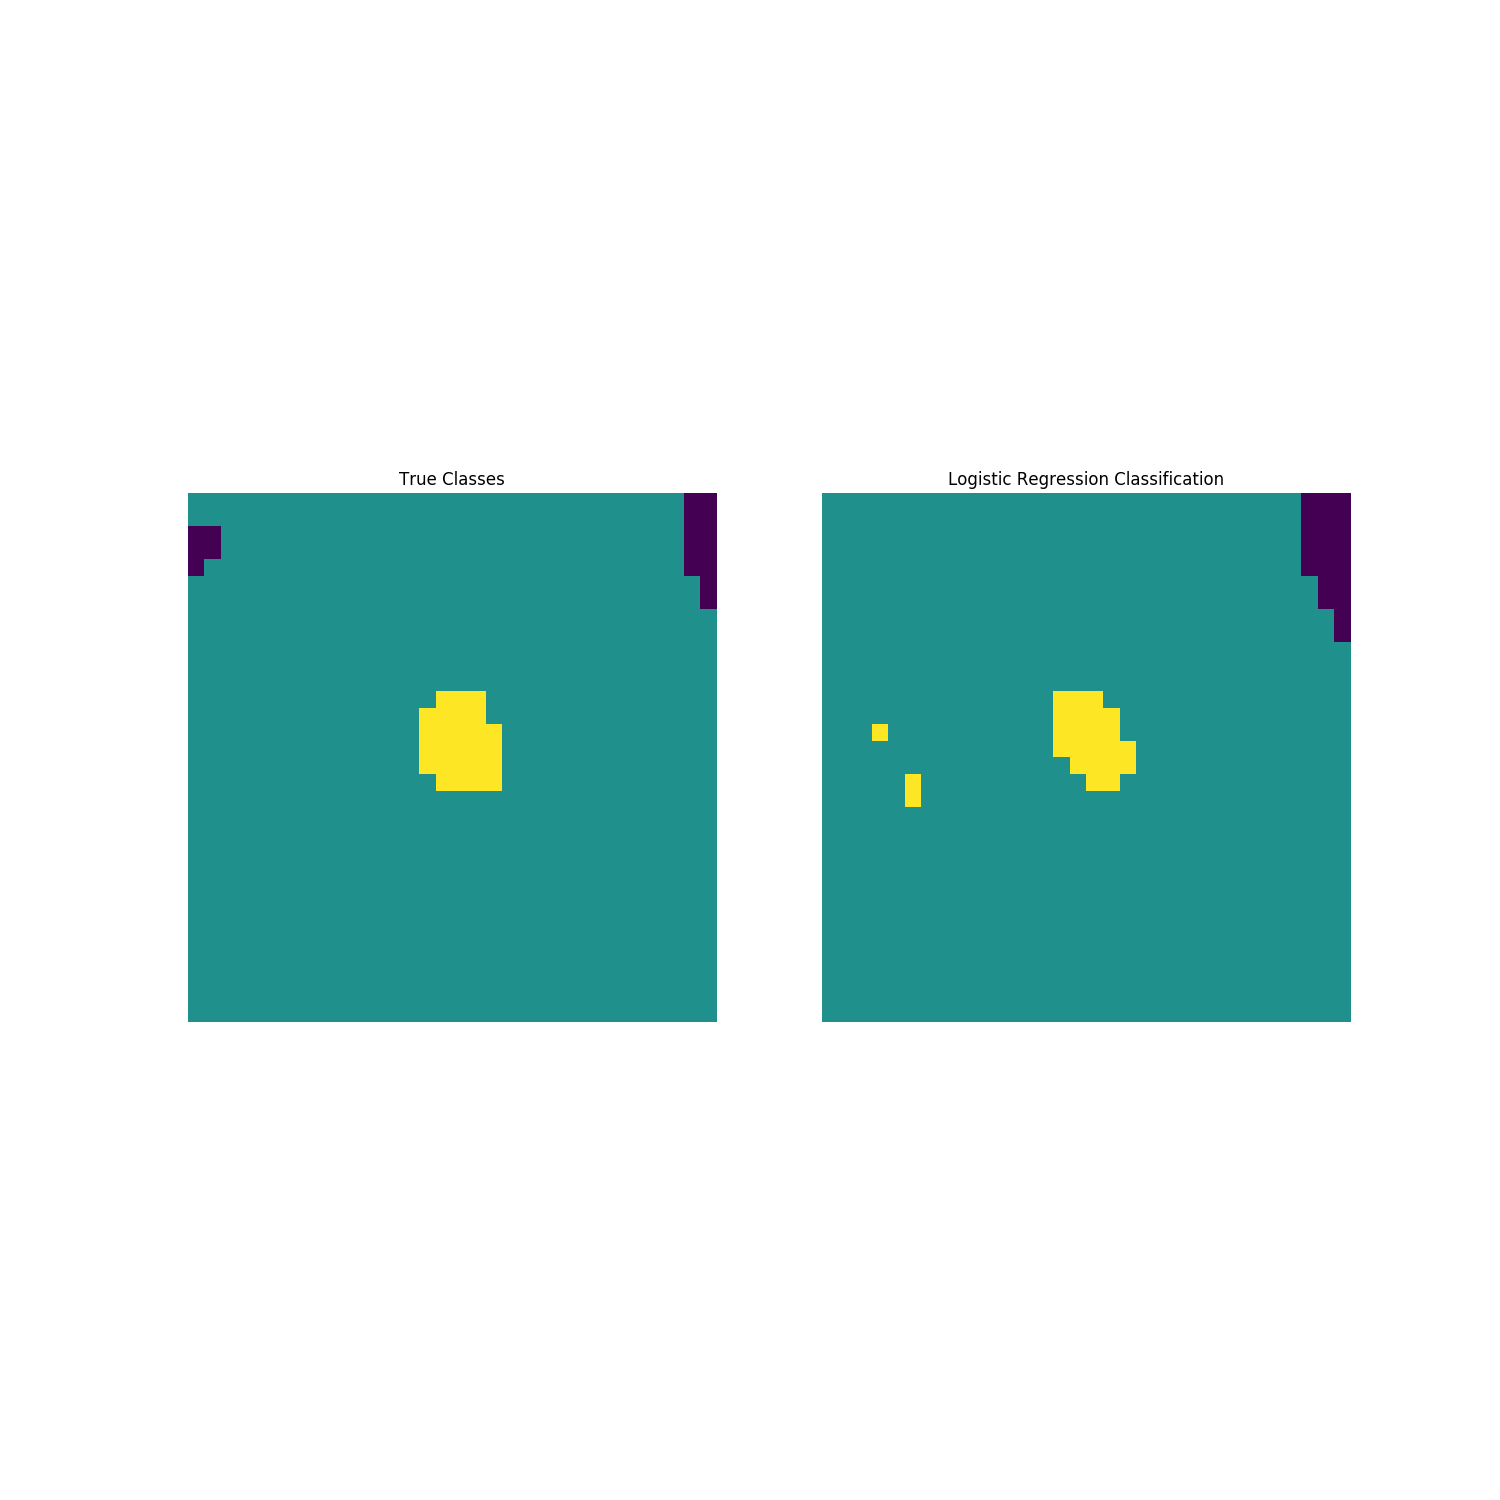

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9247


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


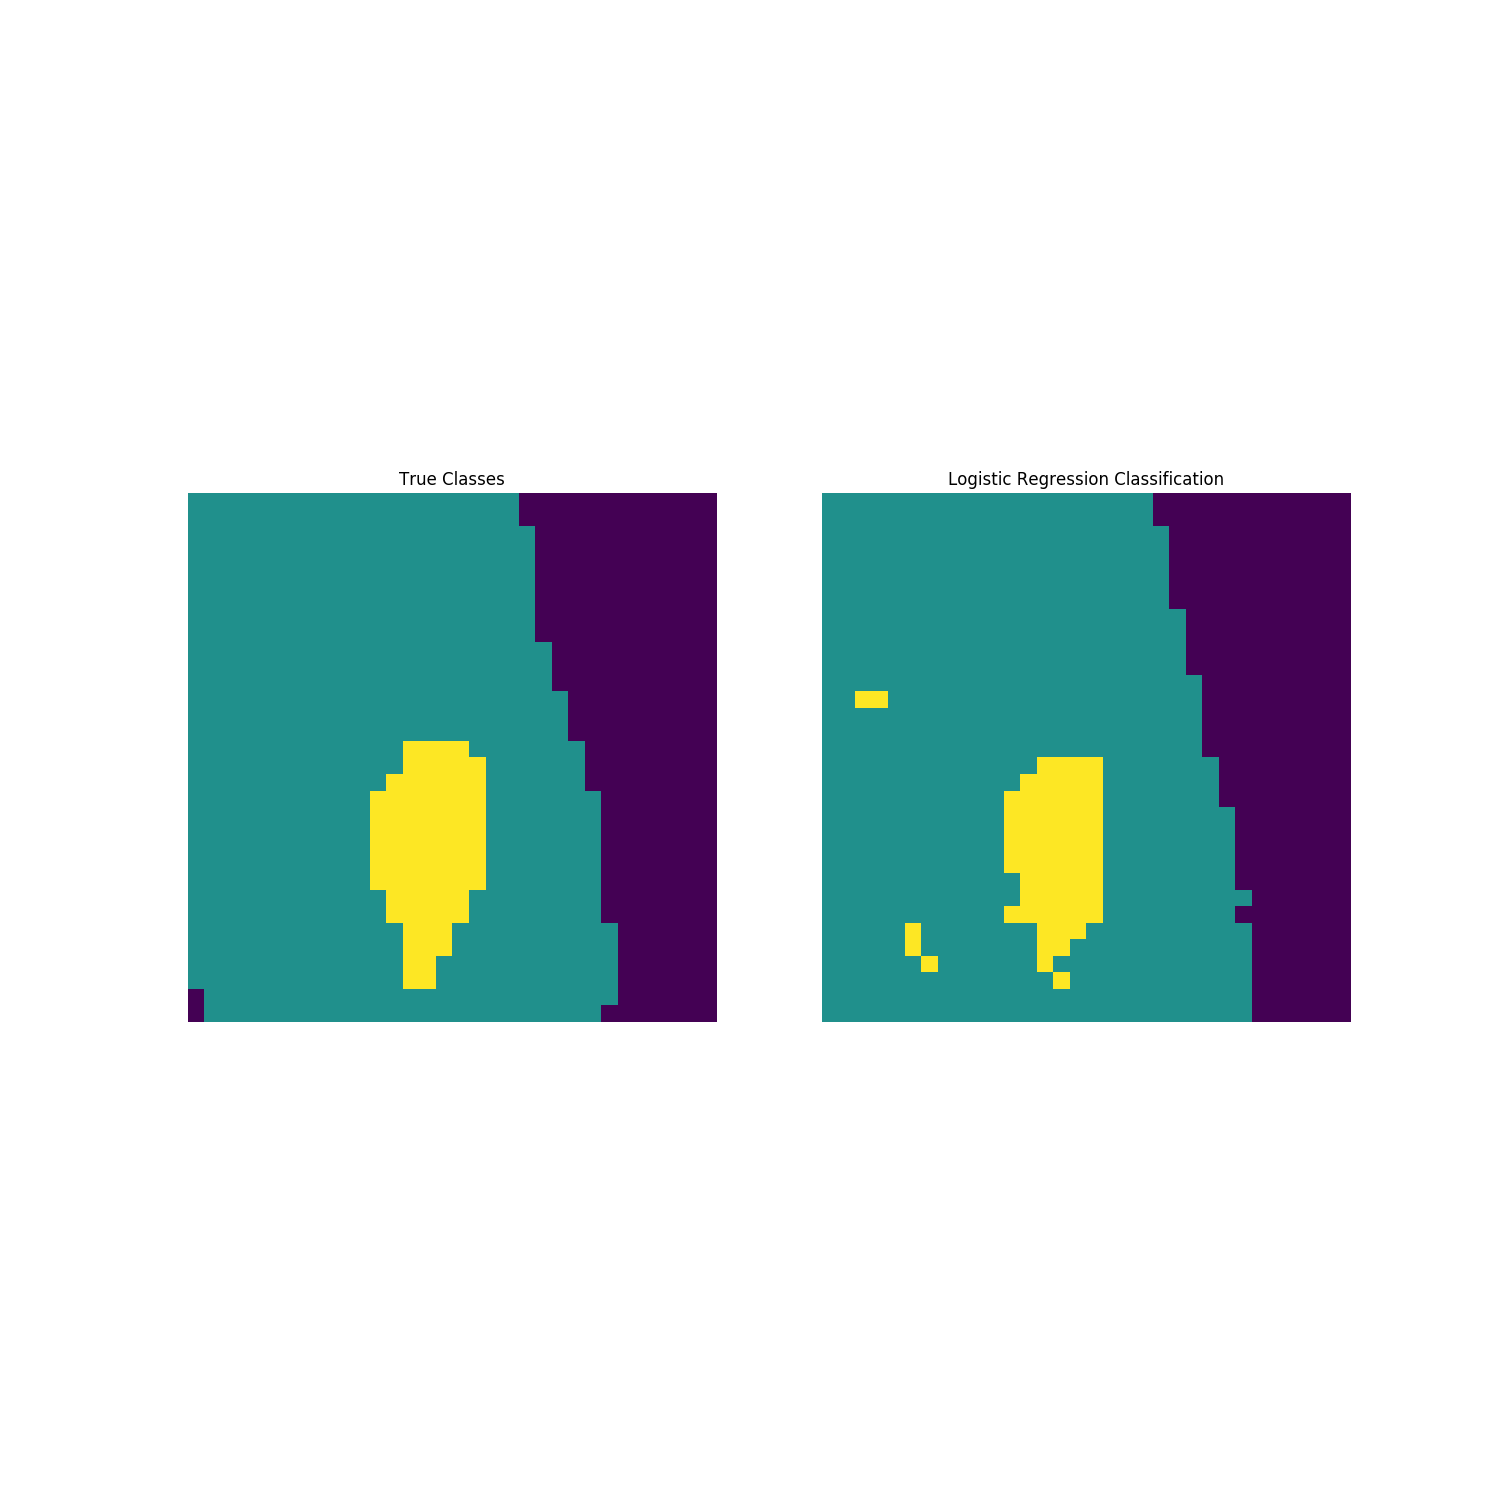

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8516


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


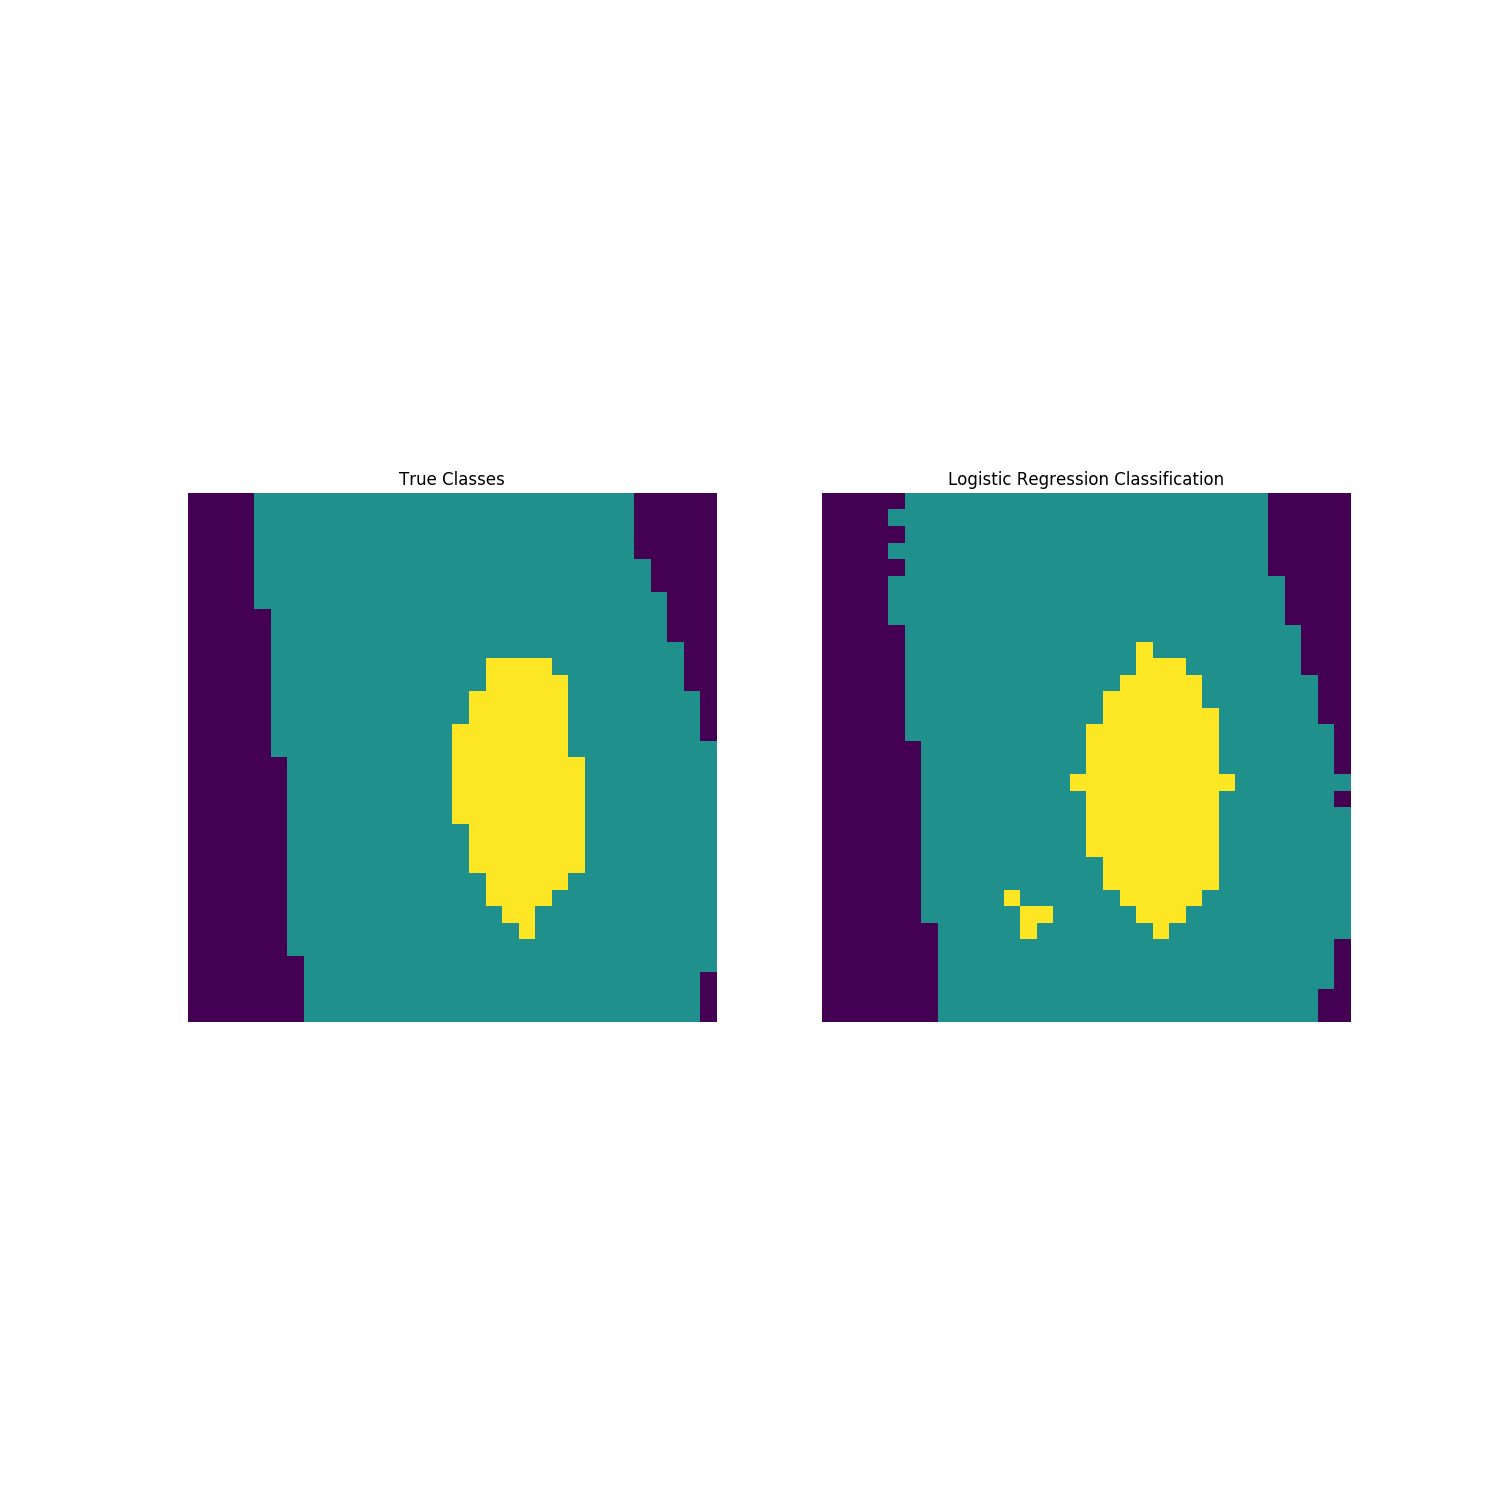

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9793


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


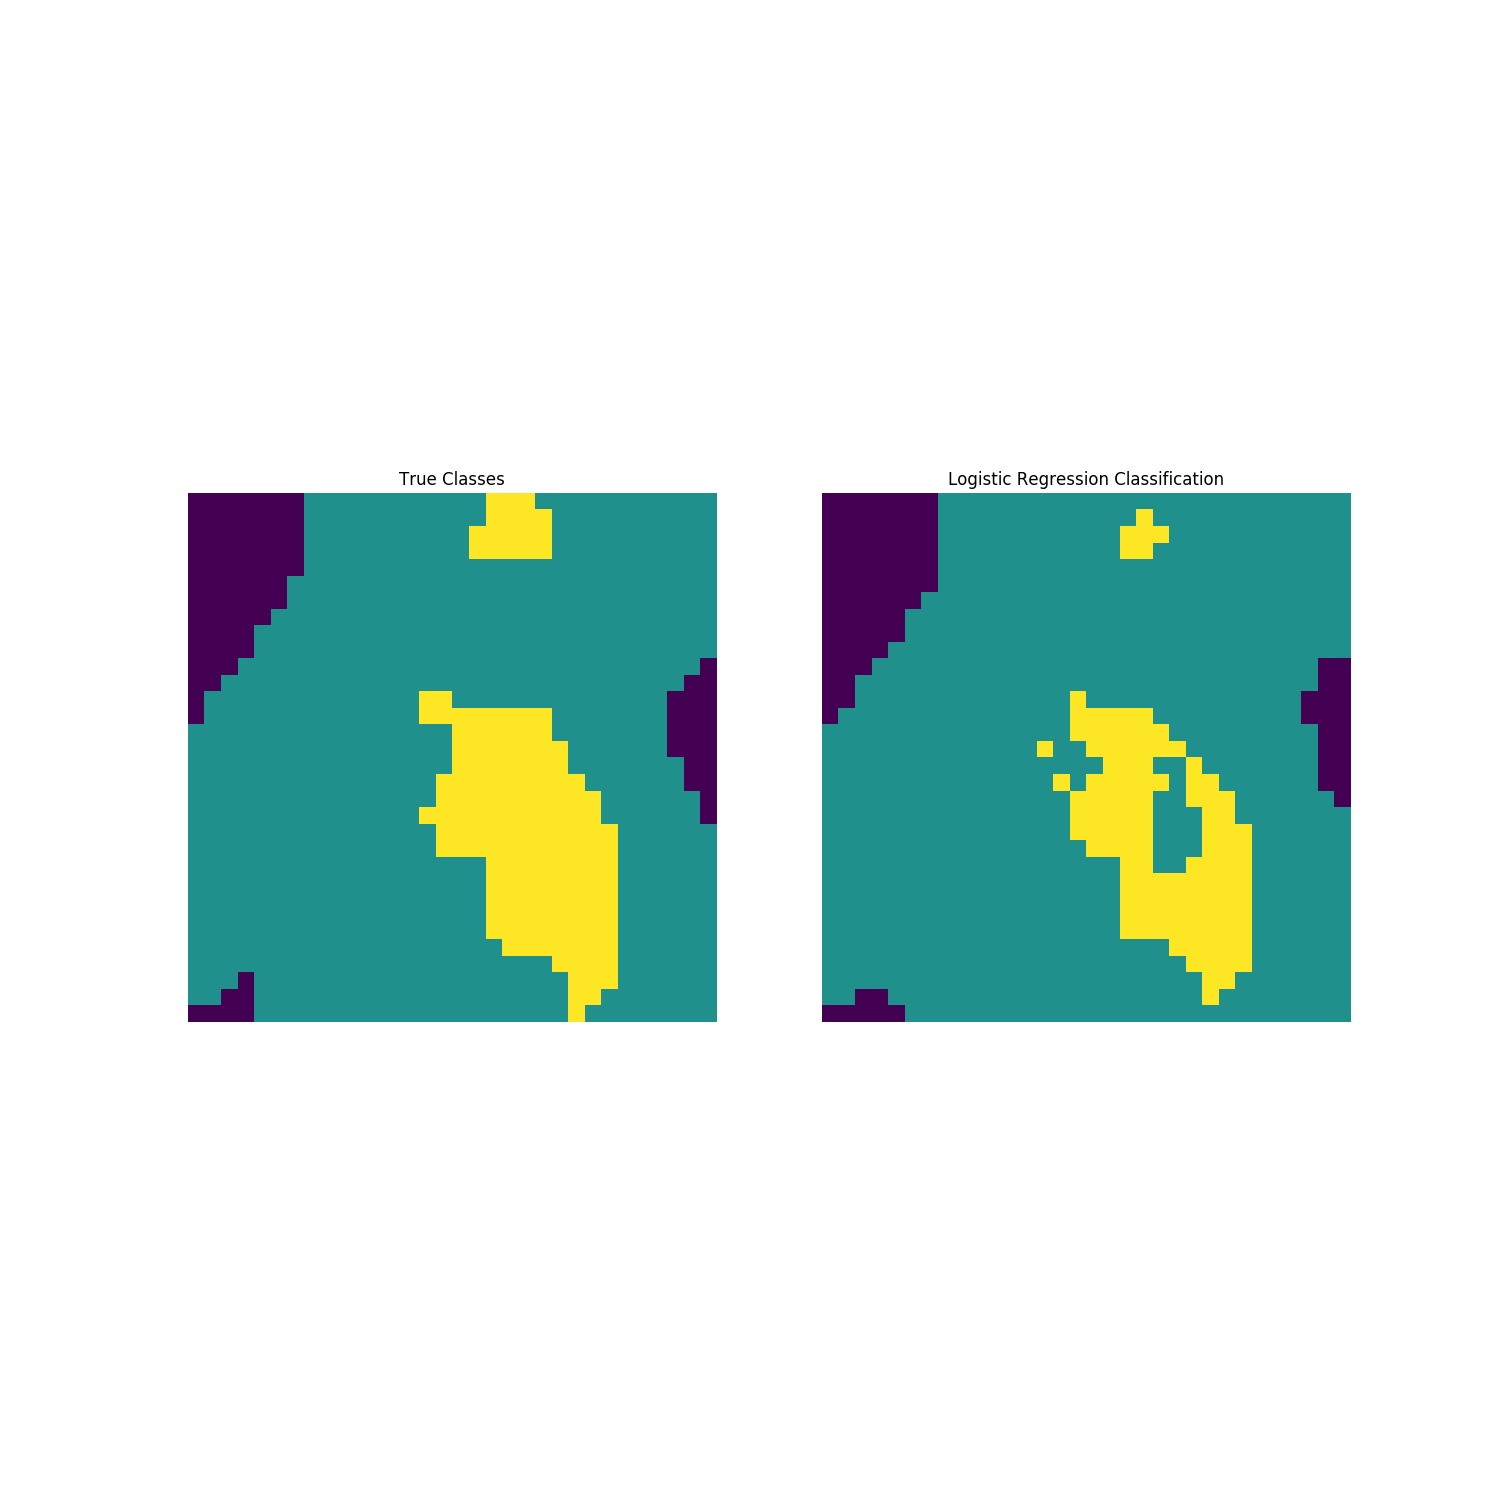

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.7822


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


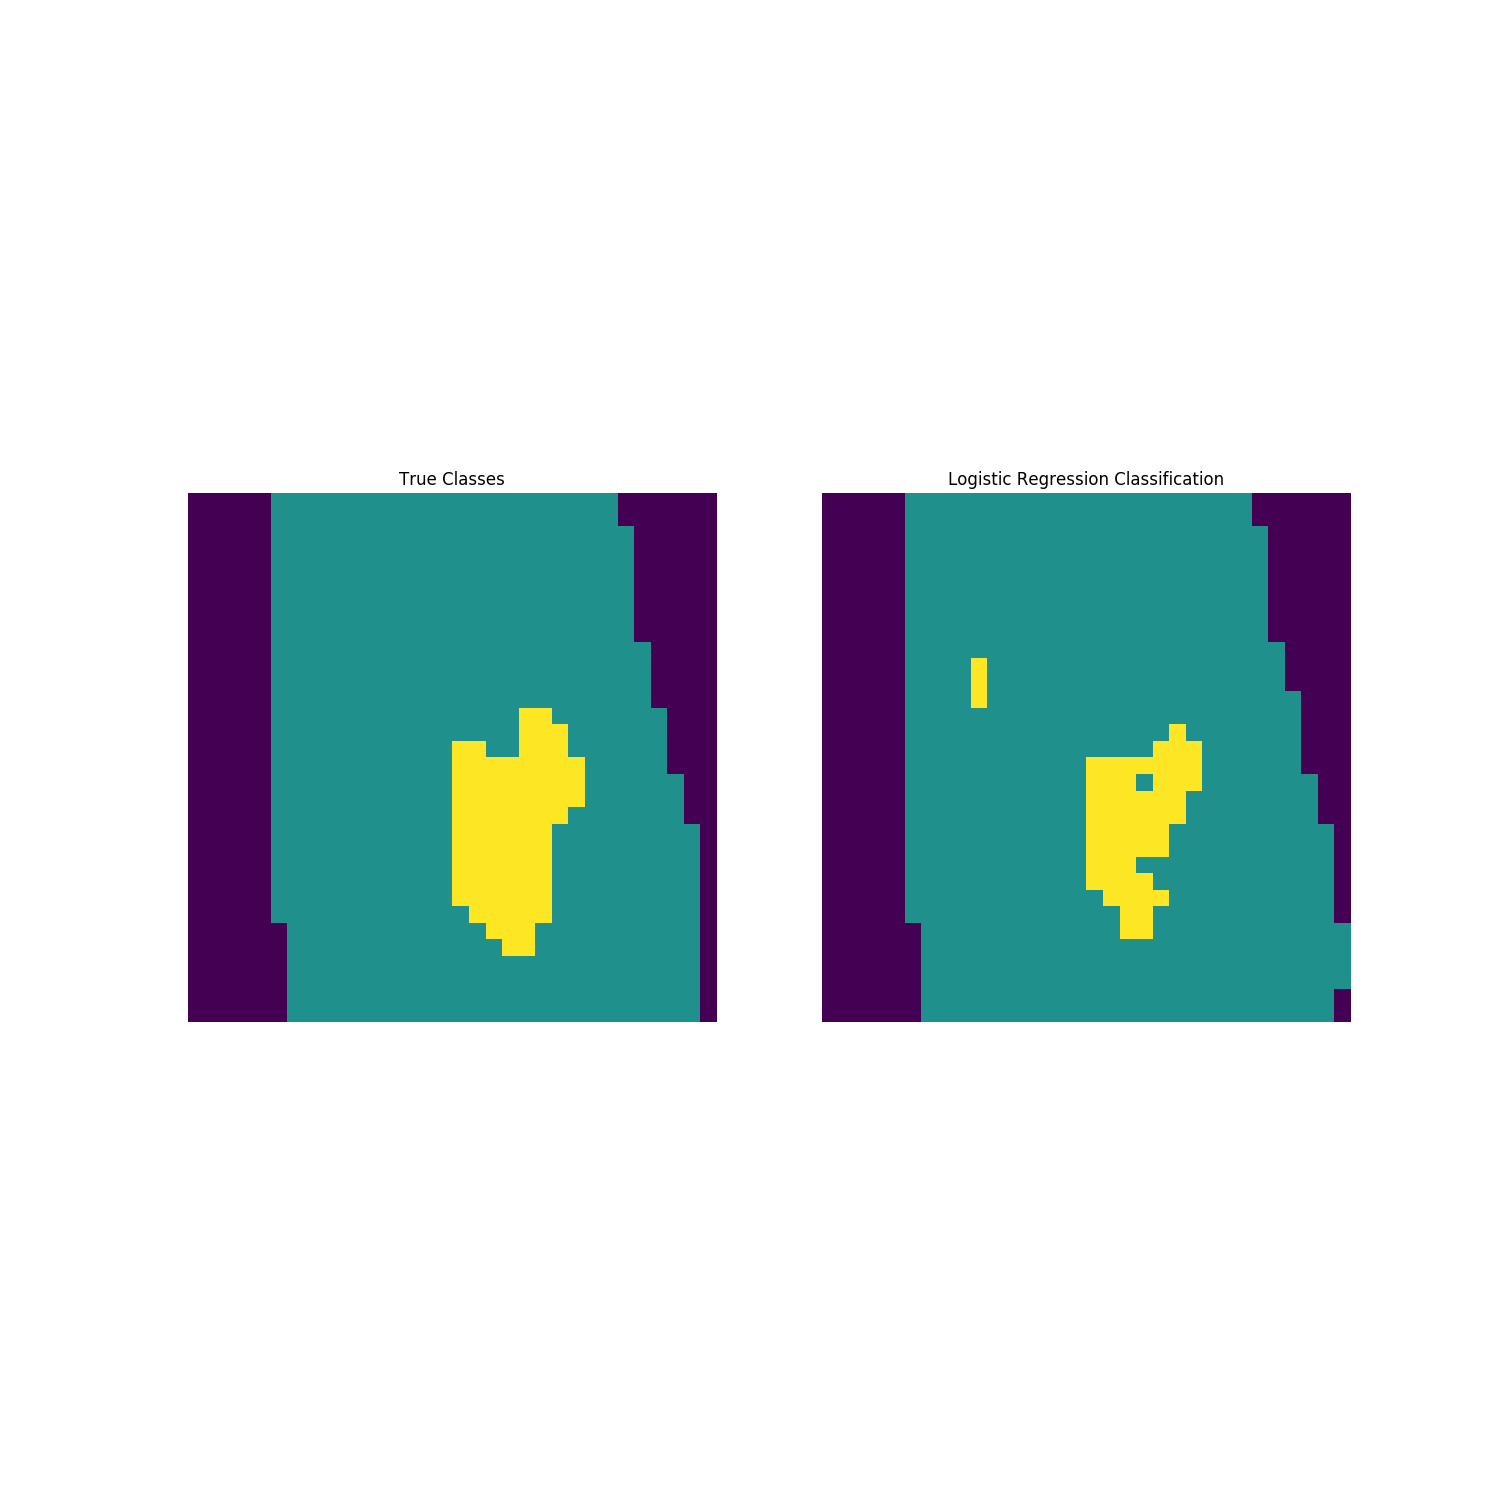

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.7643


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


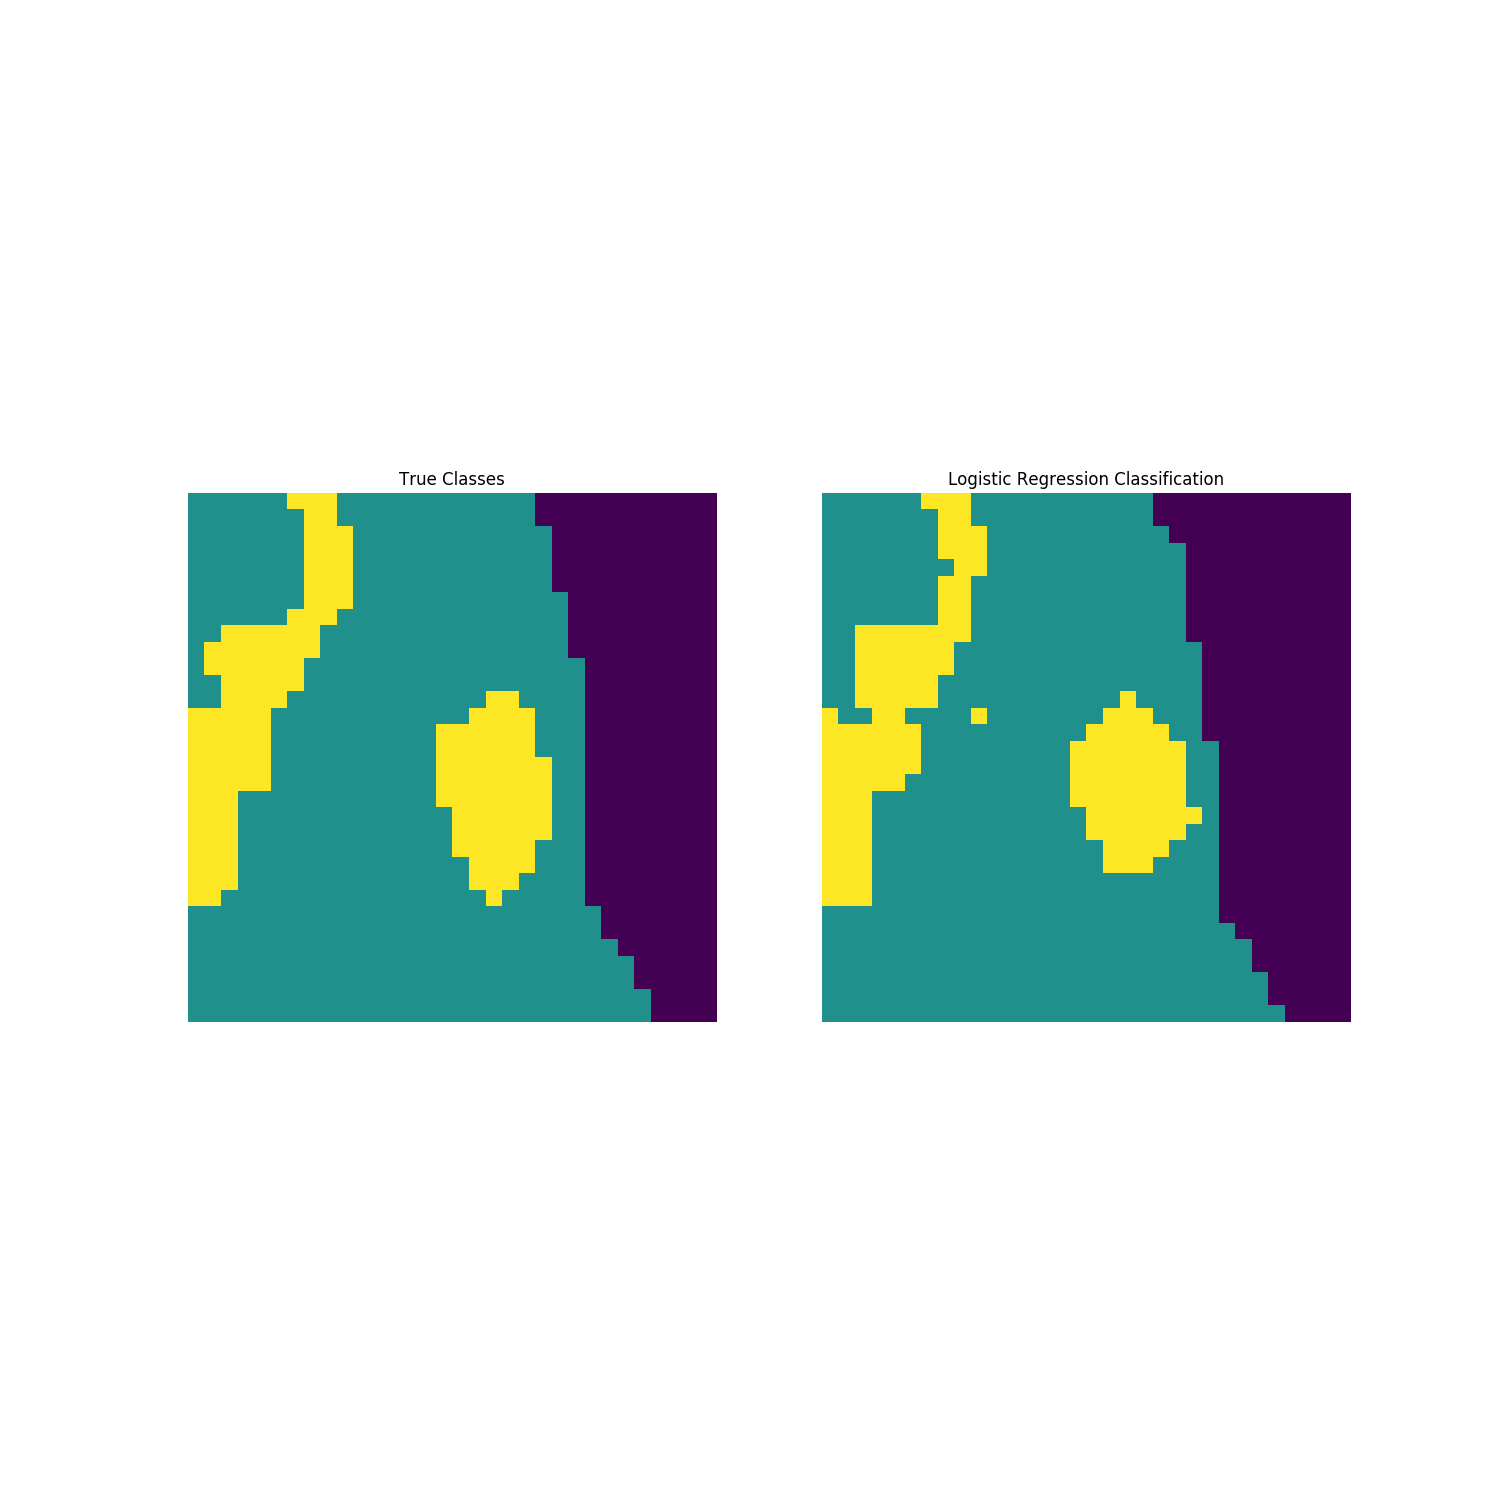

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9044


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


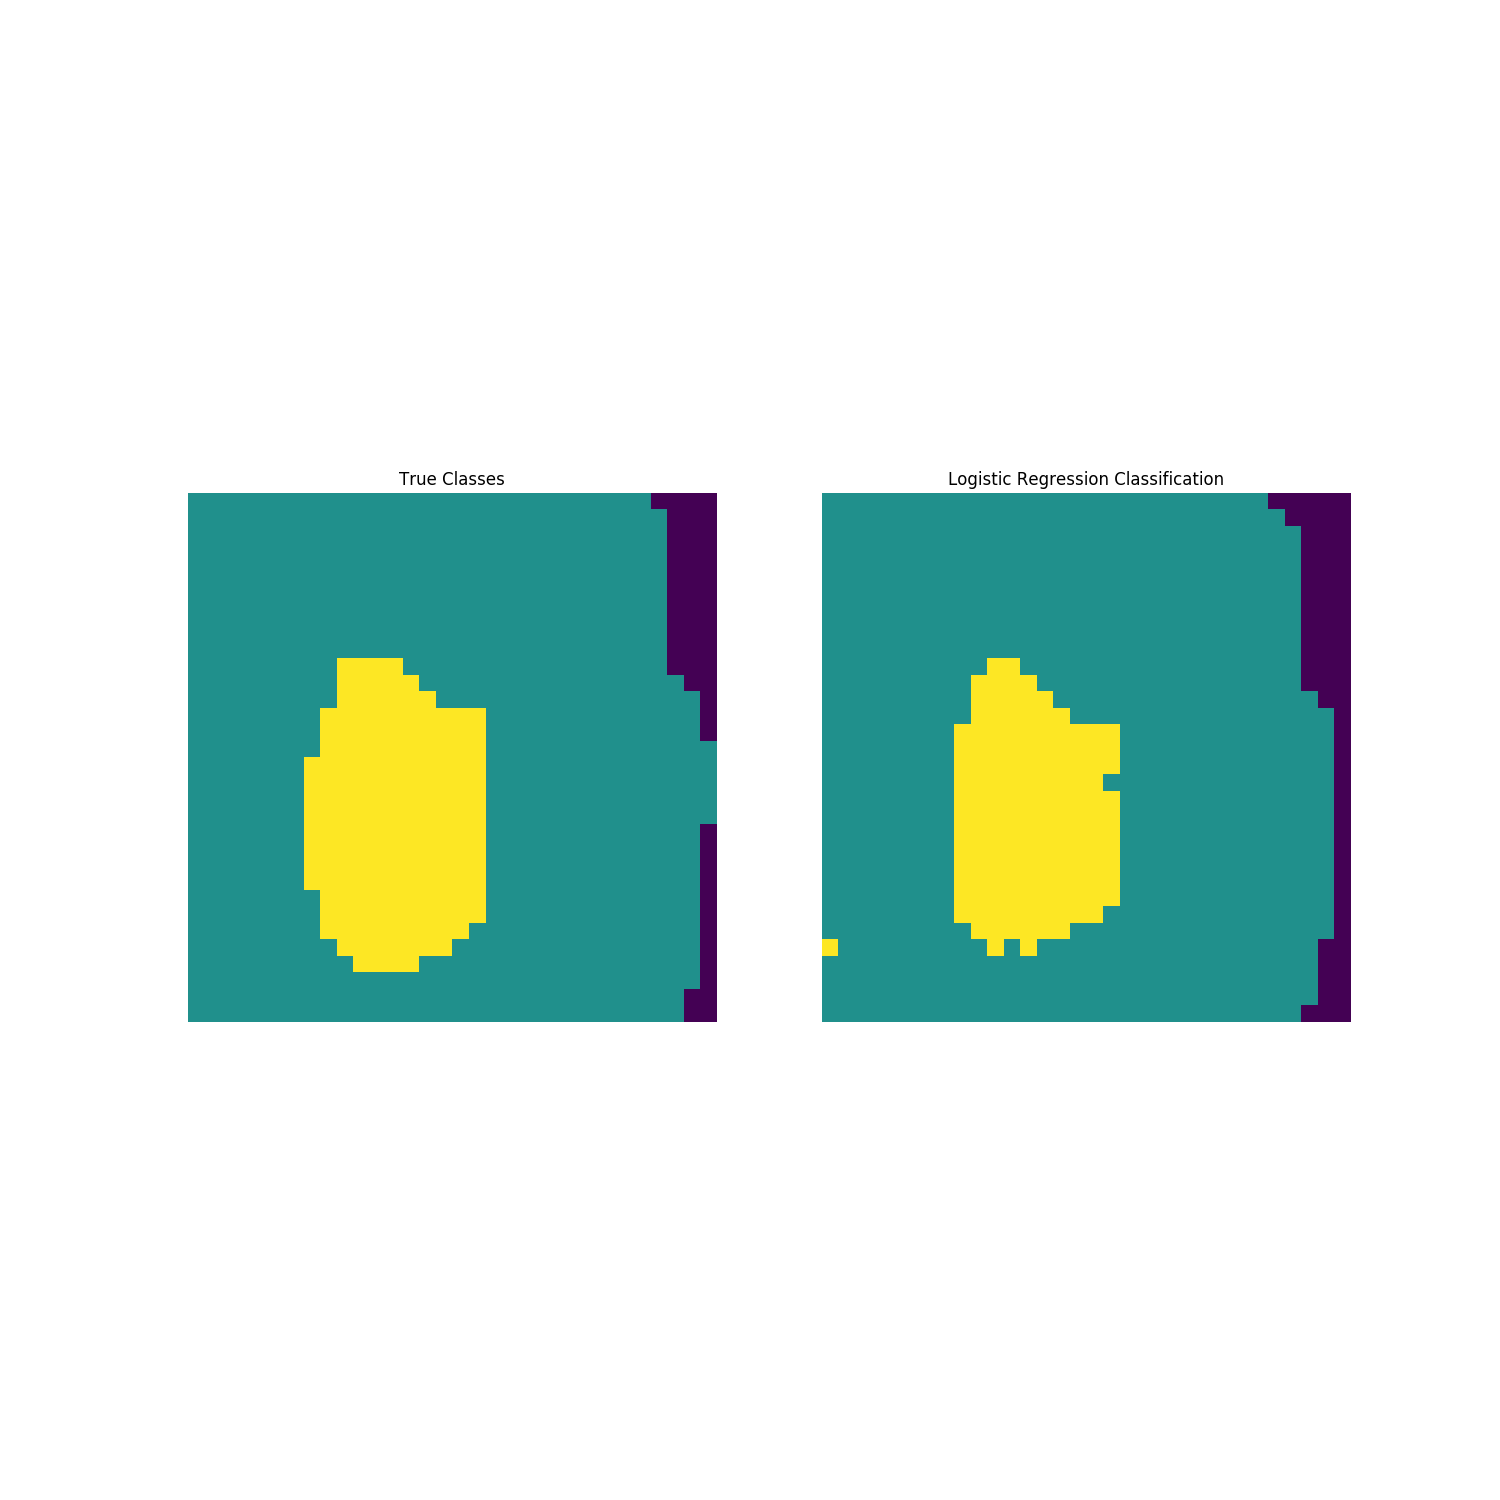

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8558


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


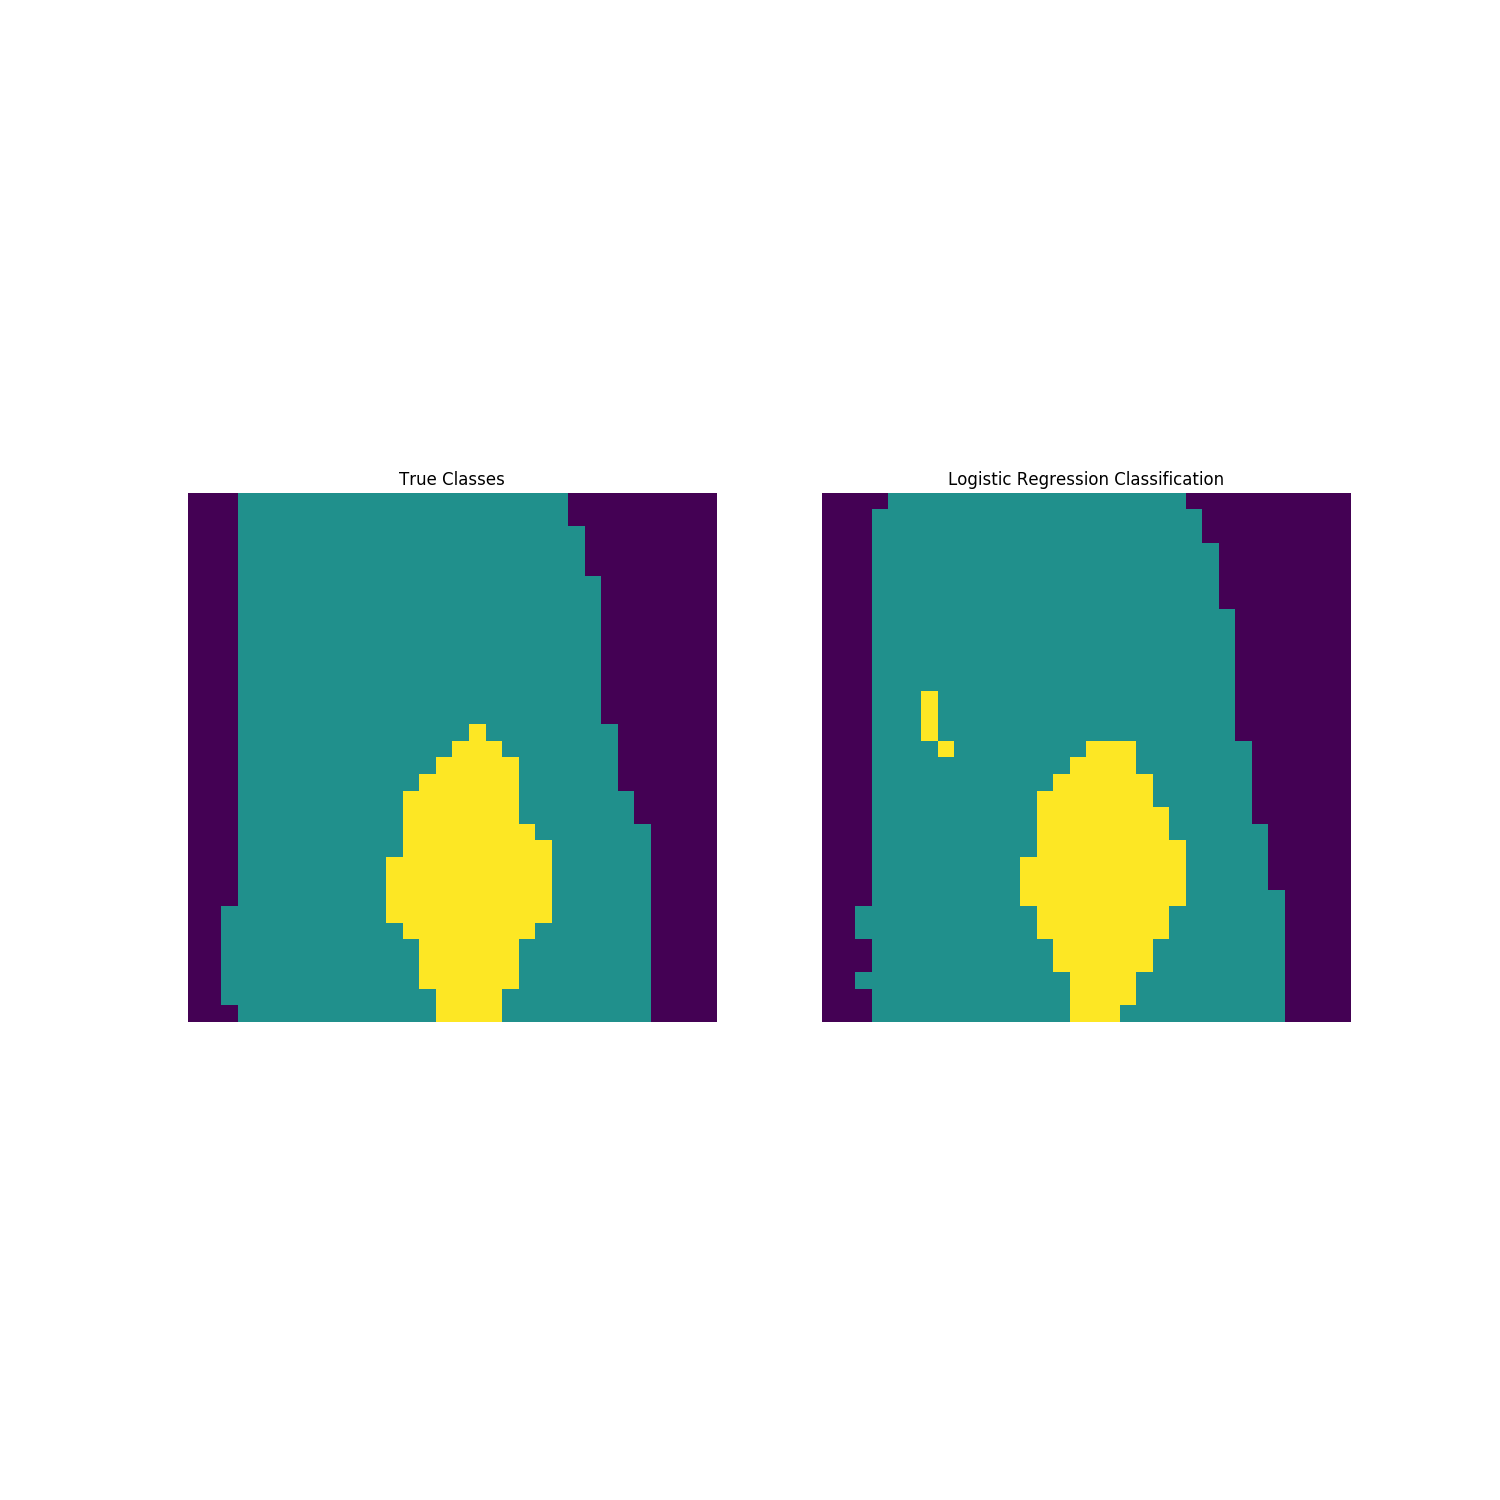

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9471


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


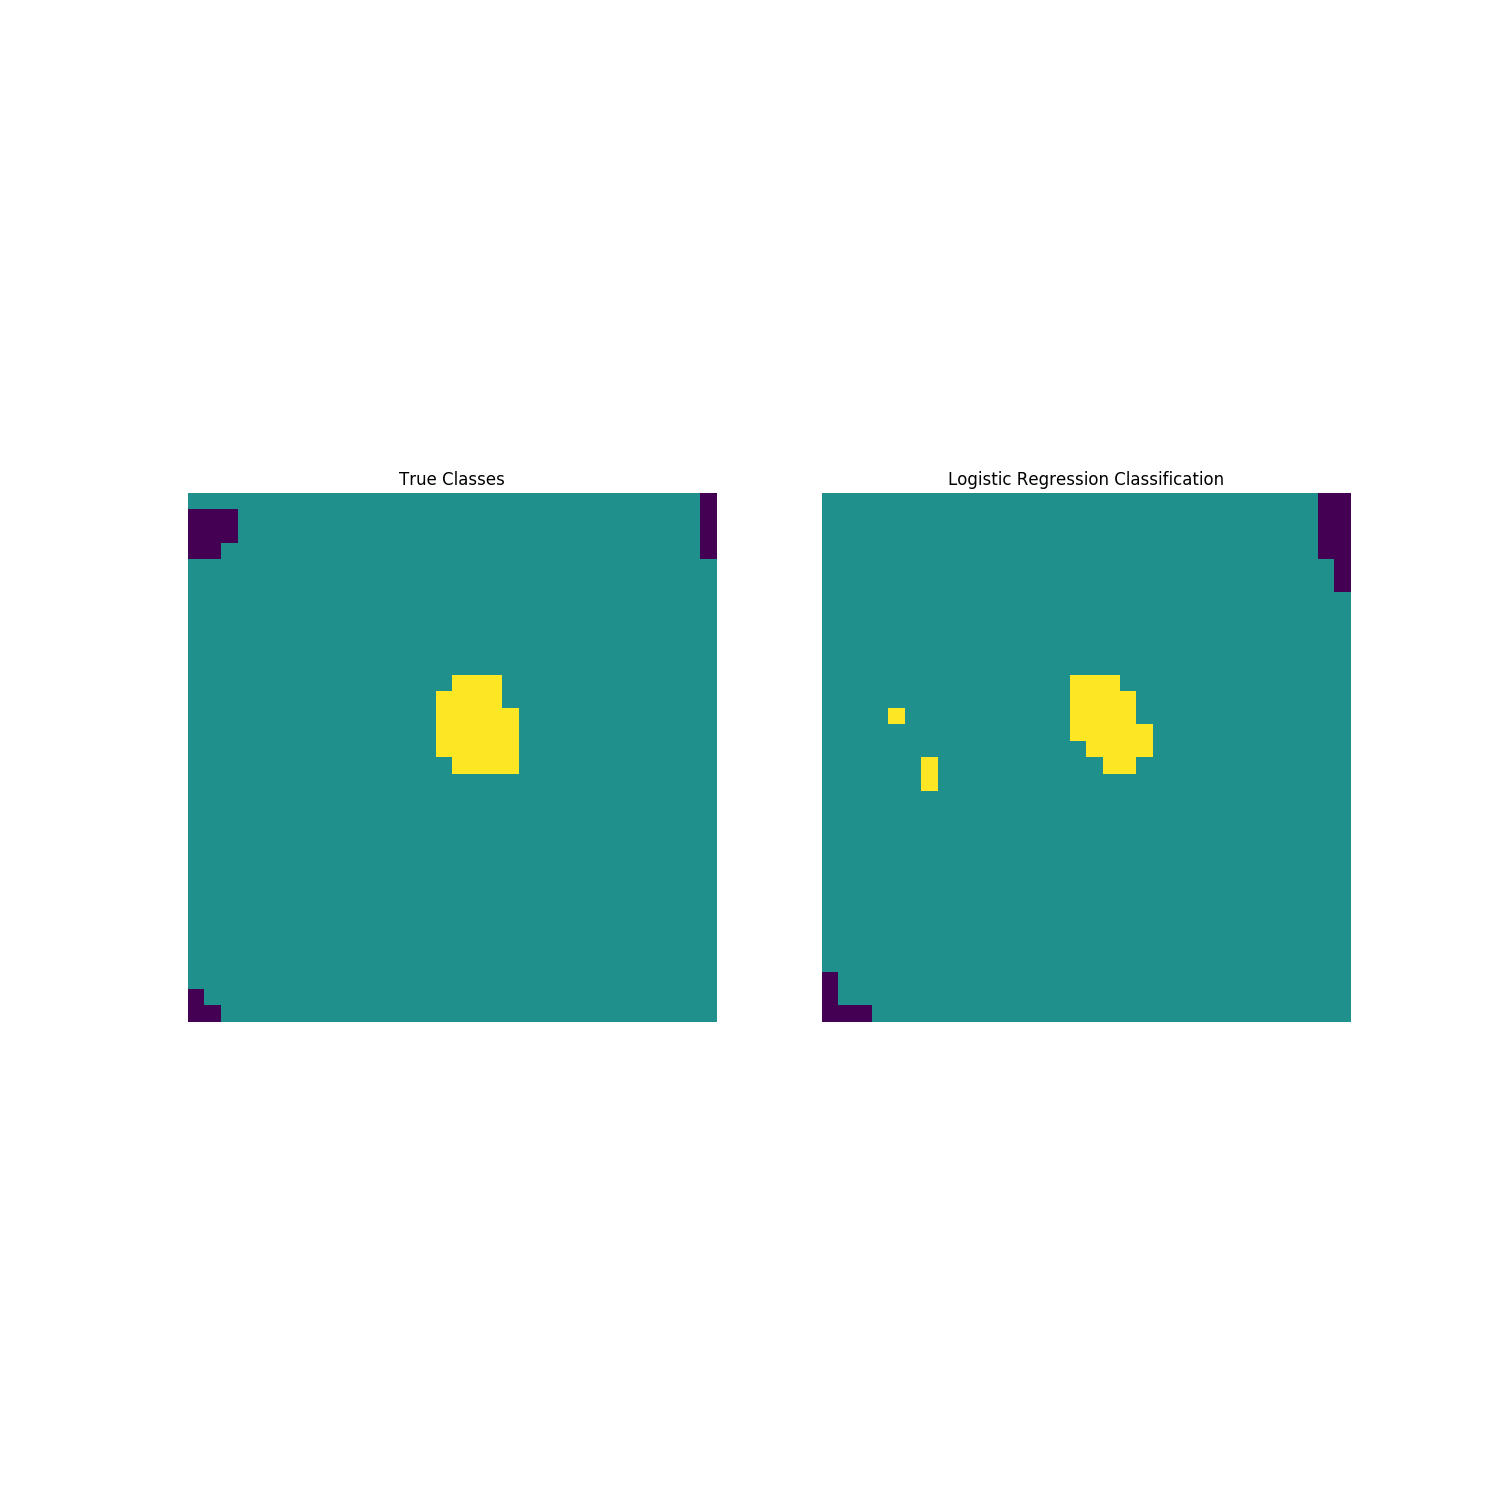

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9255


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


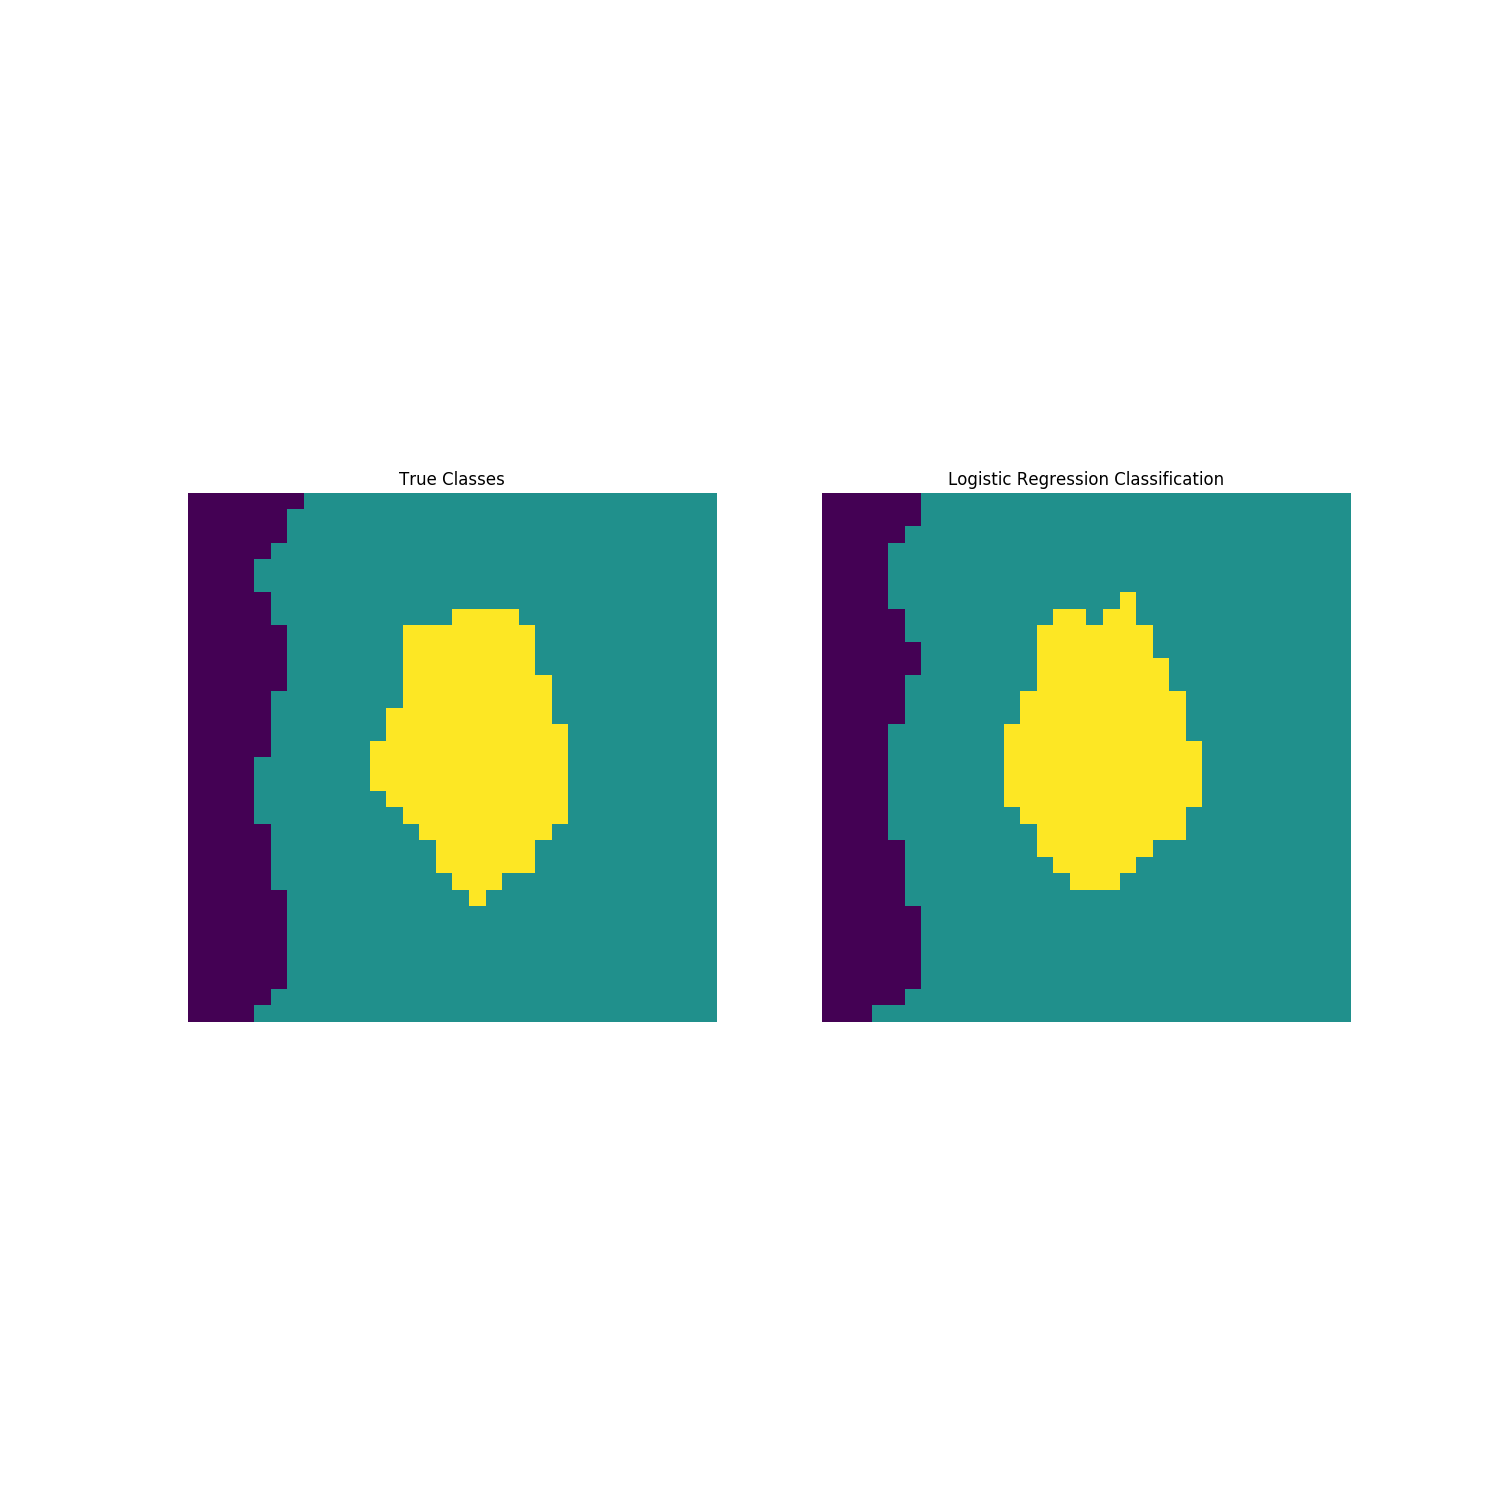

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9313


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


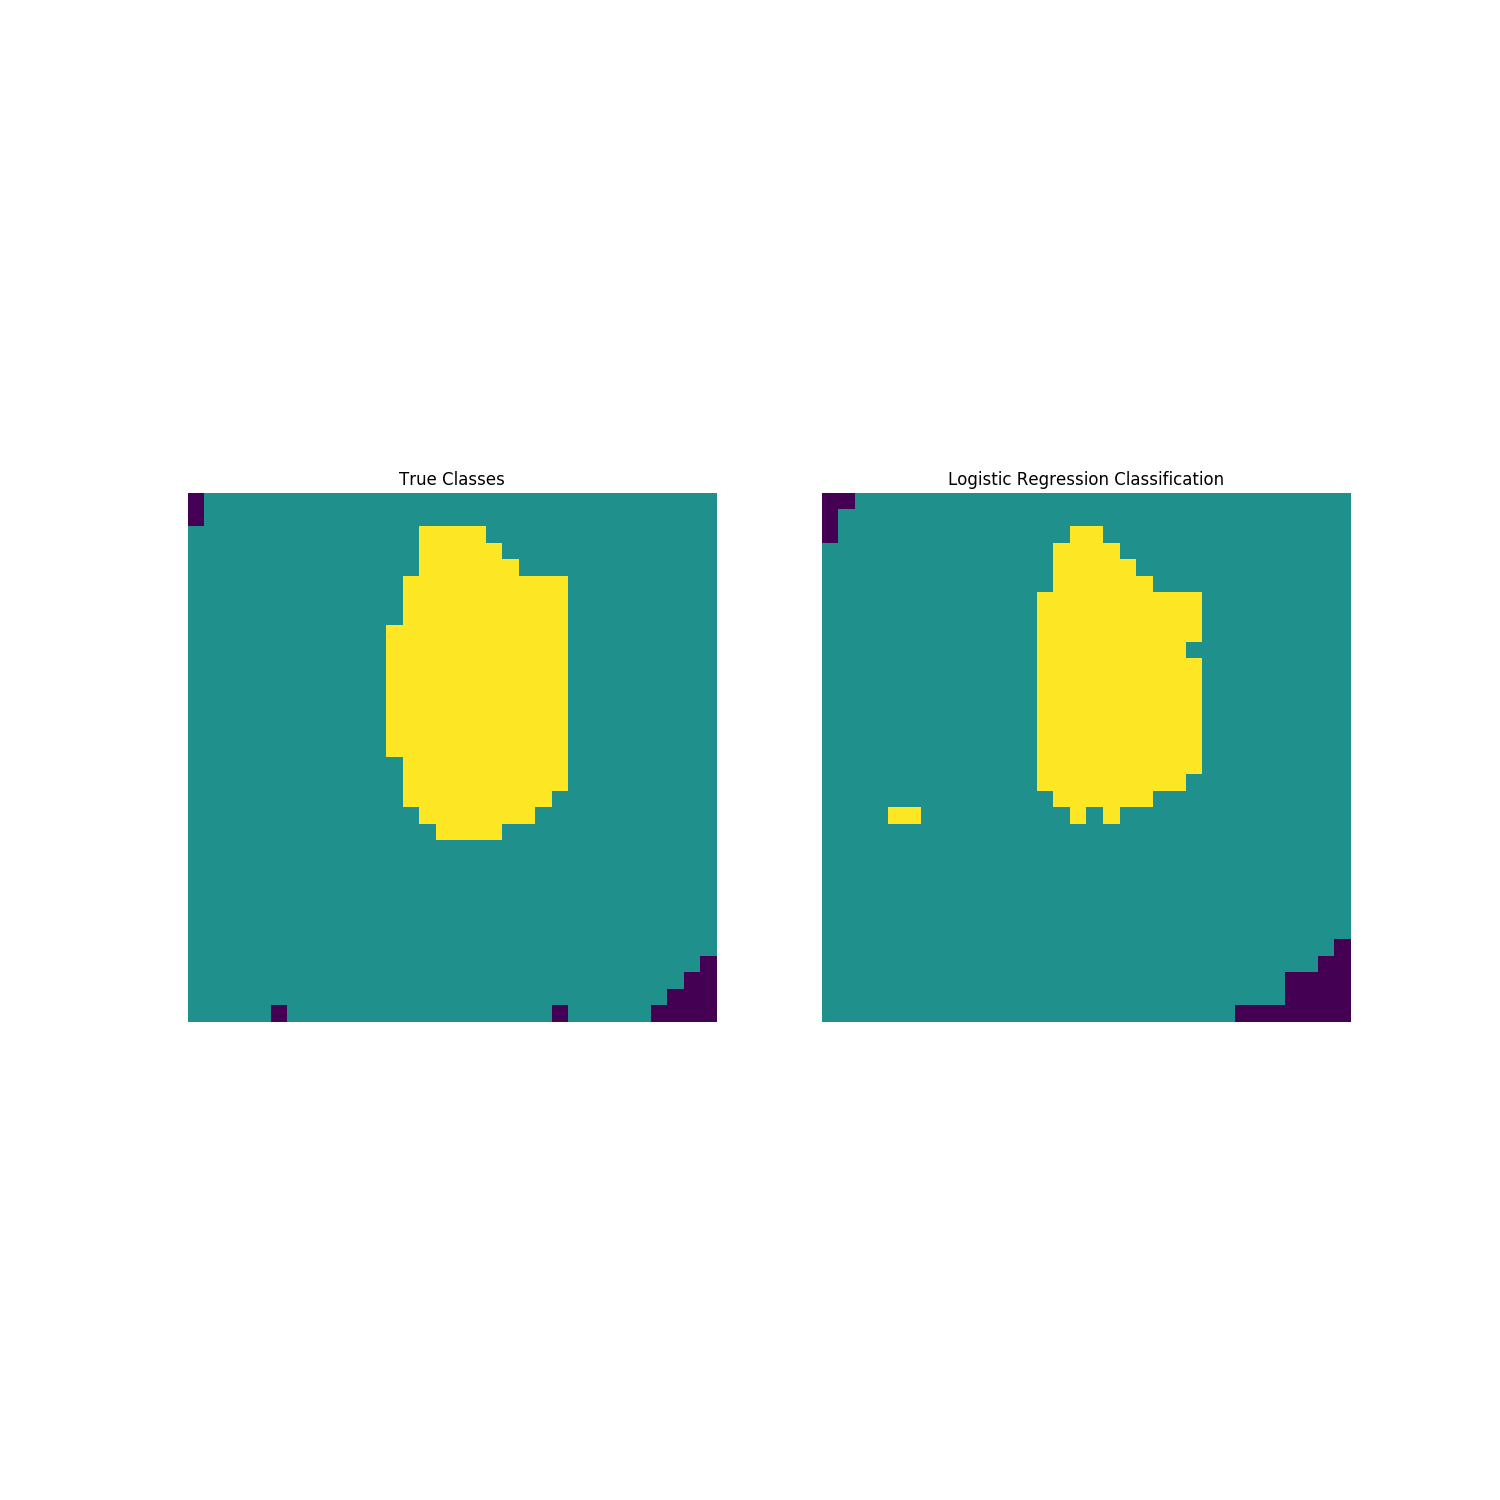

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8576


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


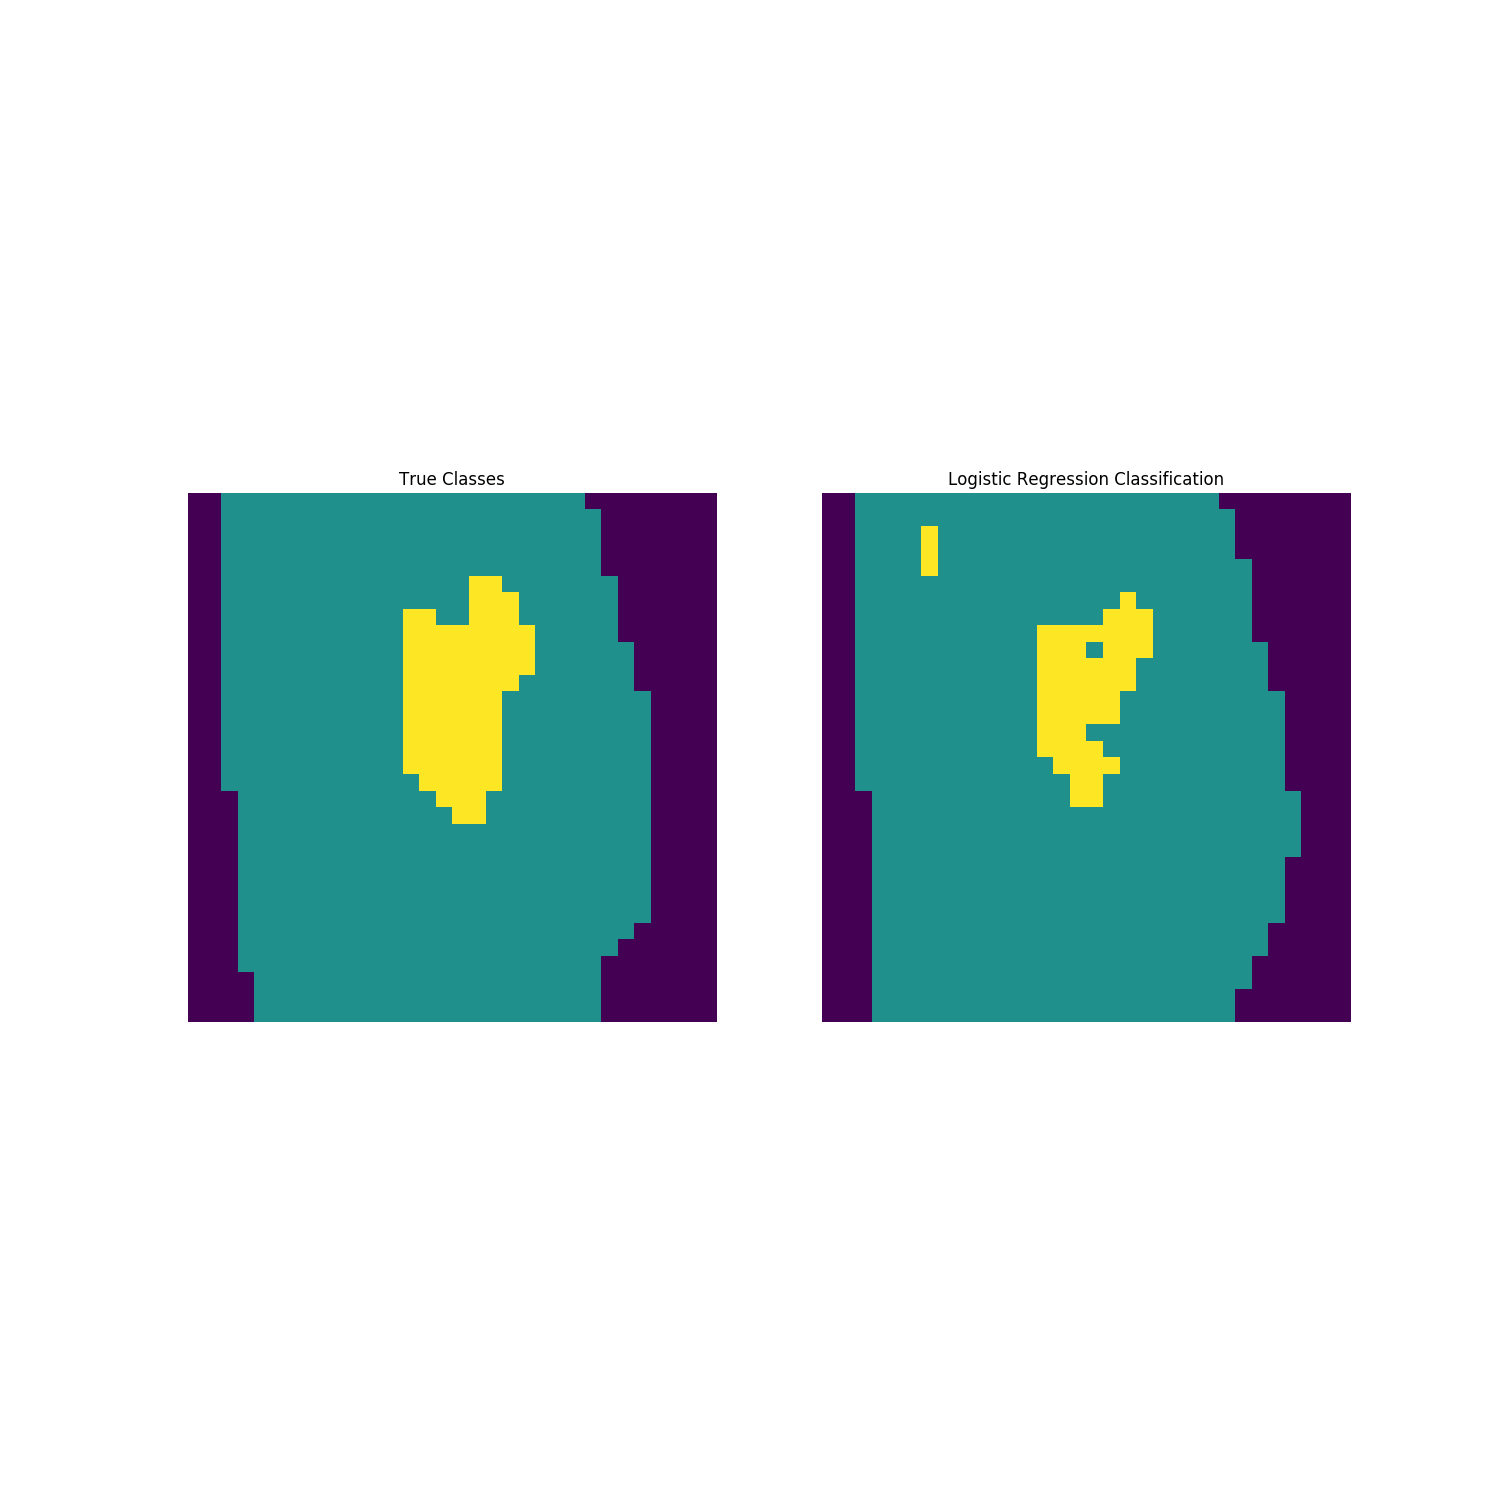

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.7651


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


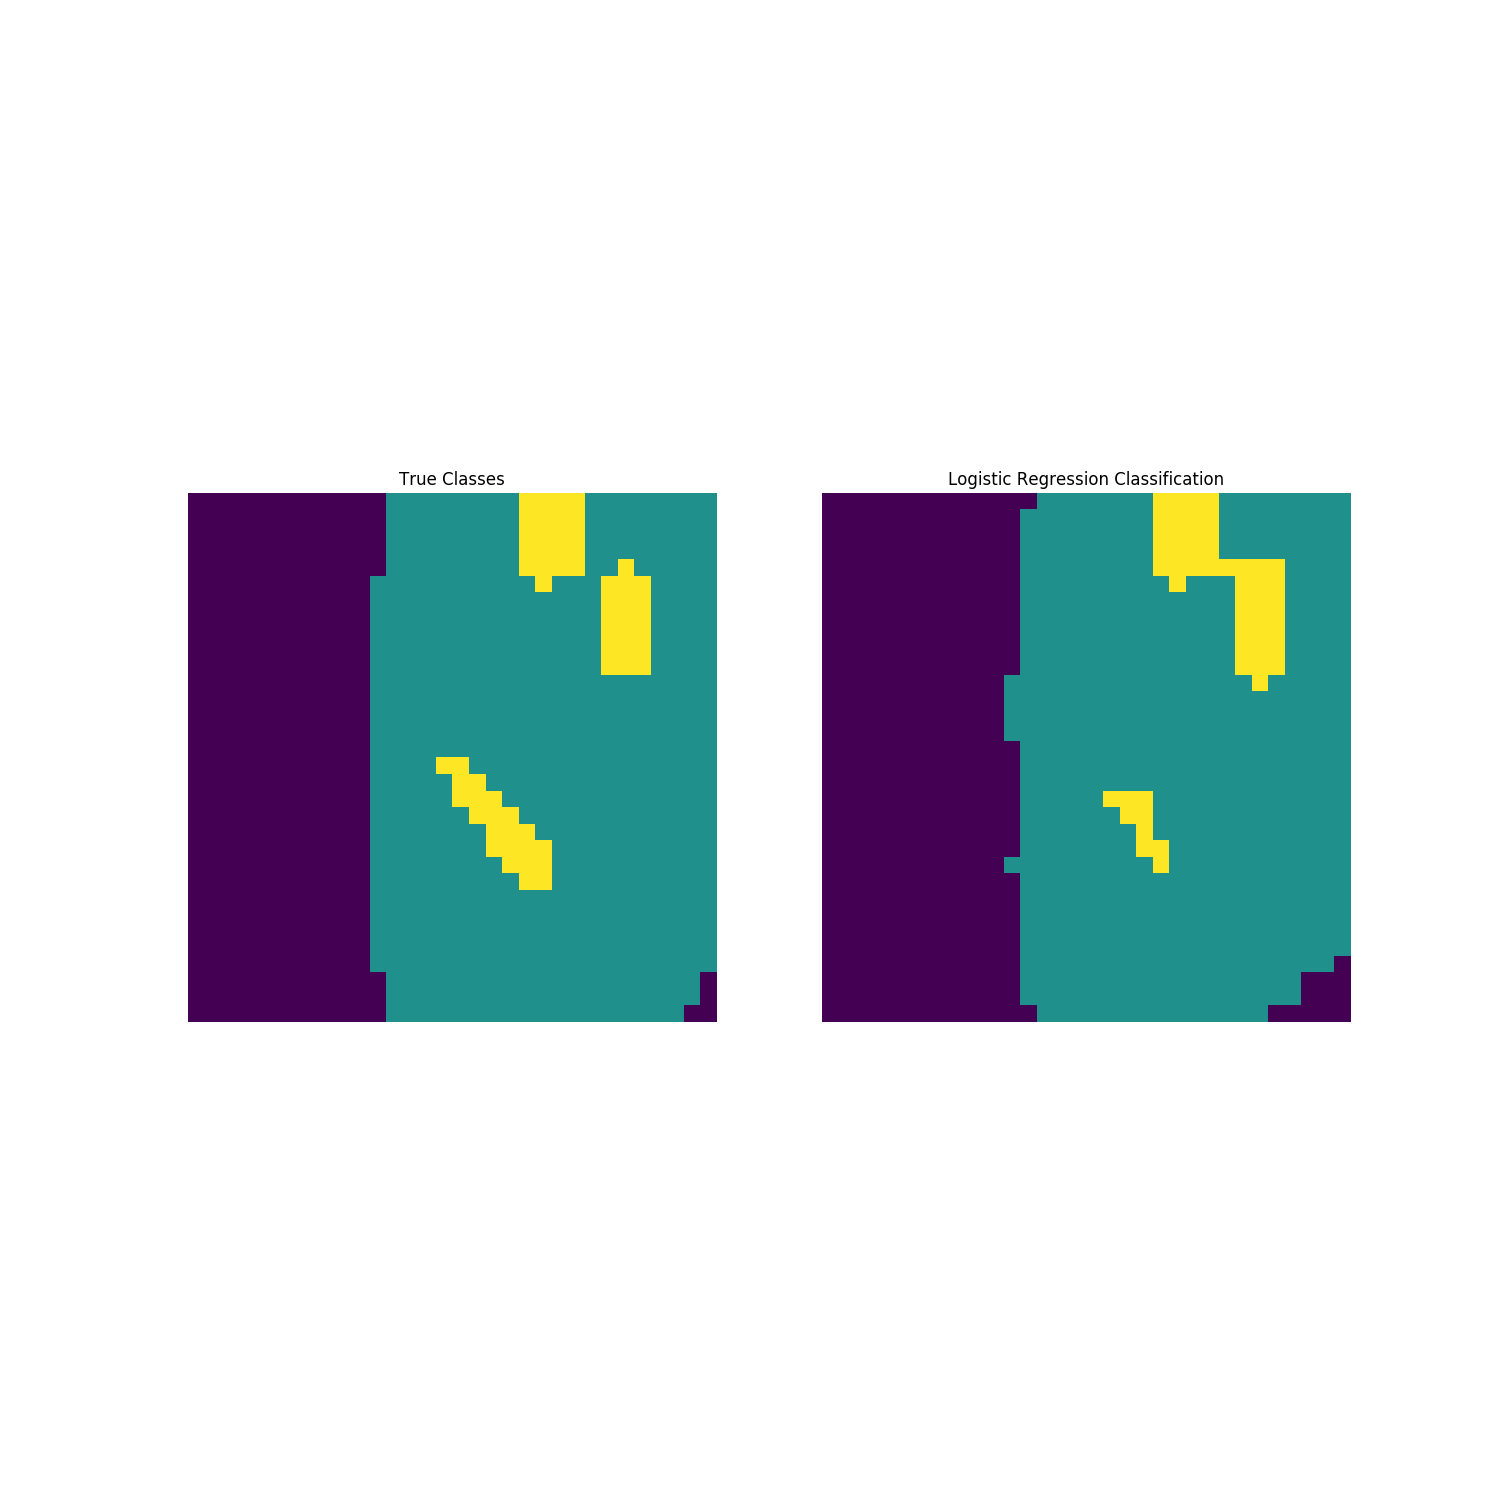

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8292


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


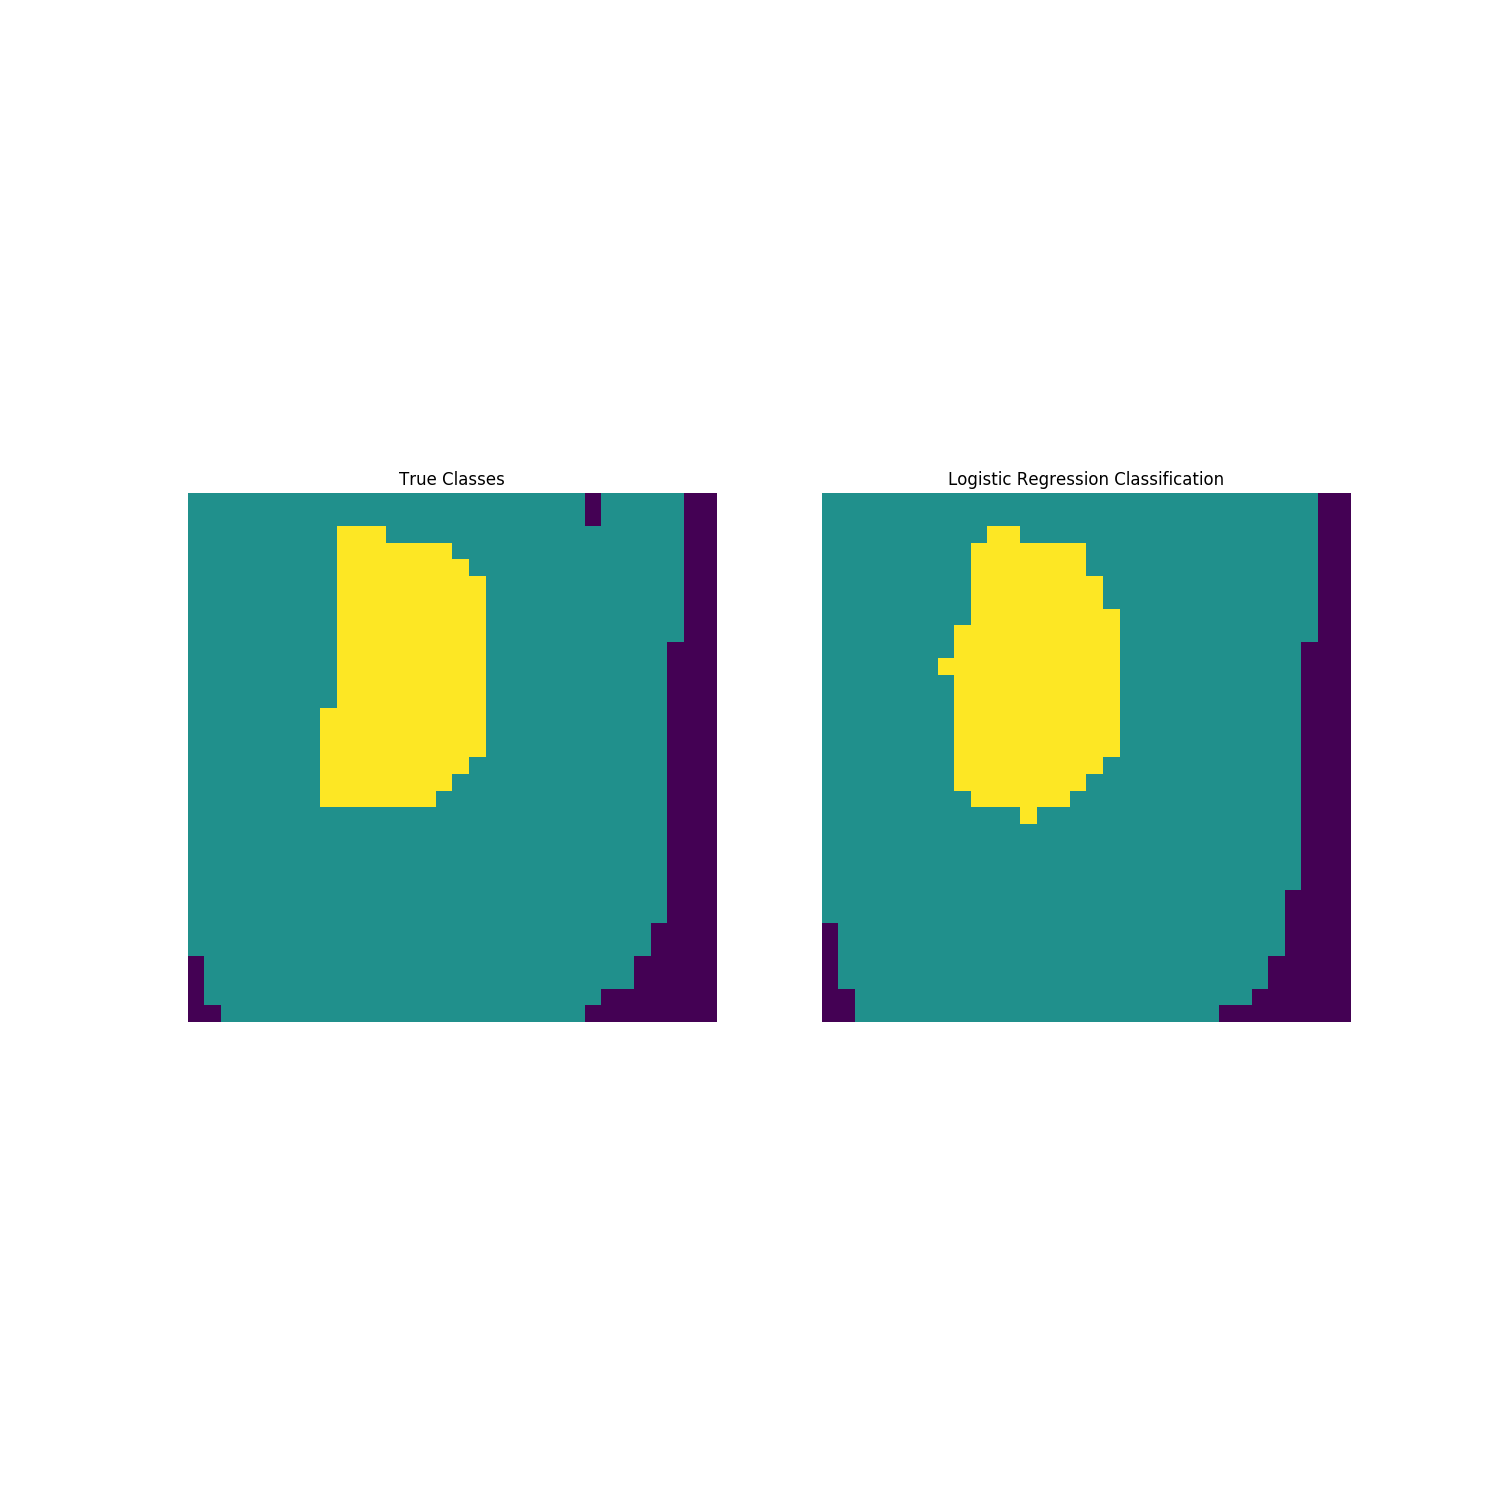

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9693


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


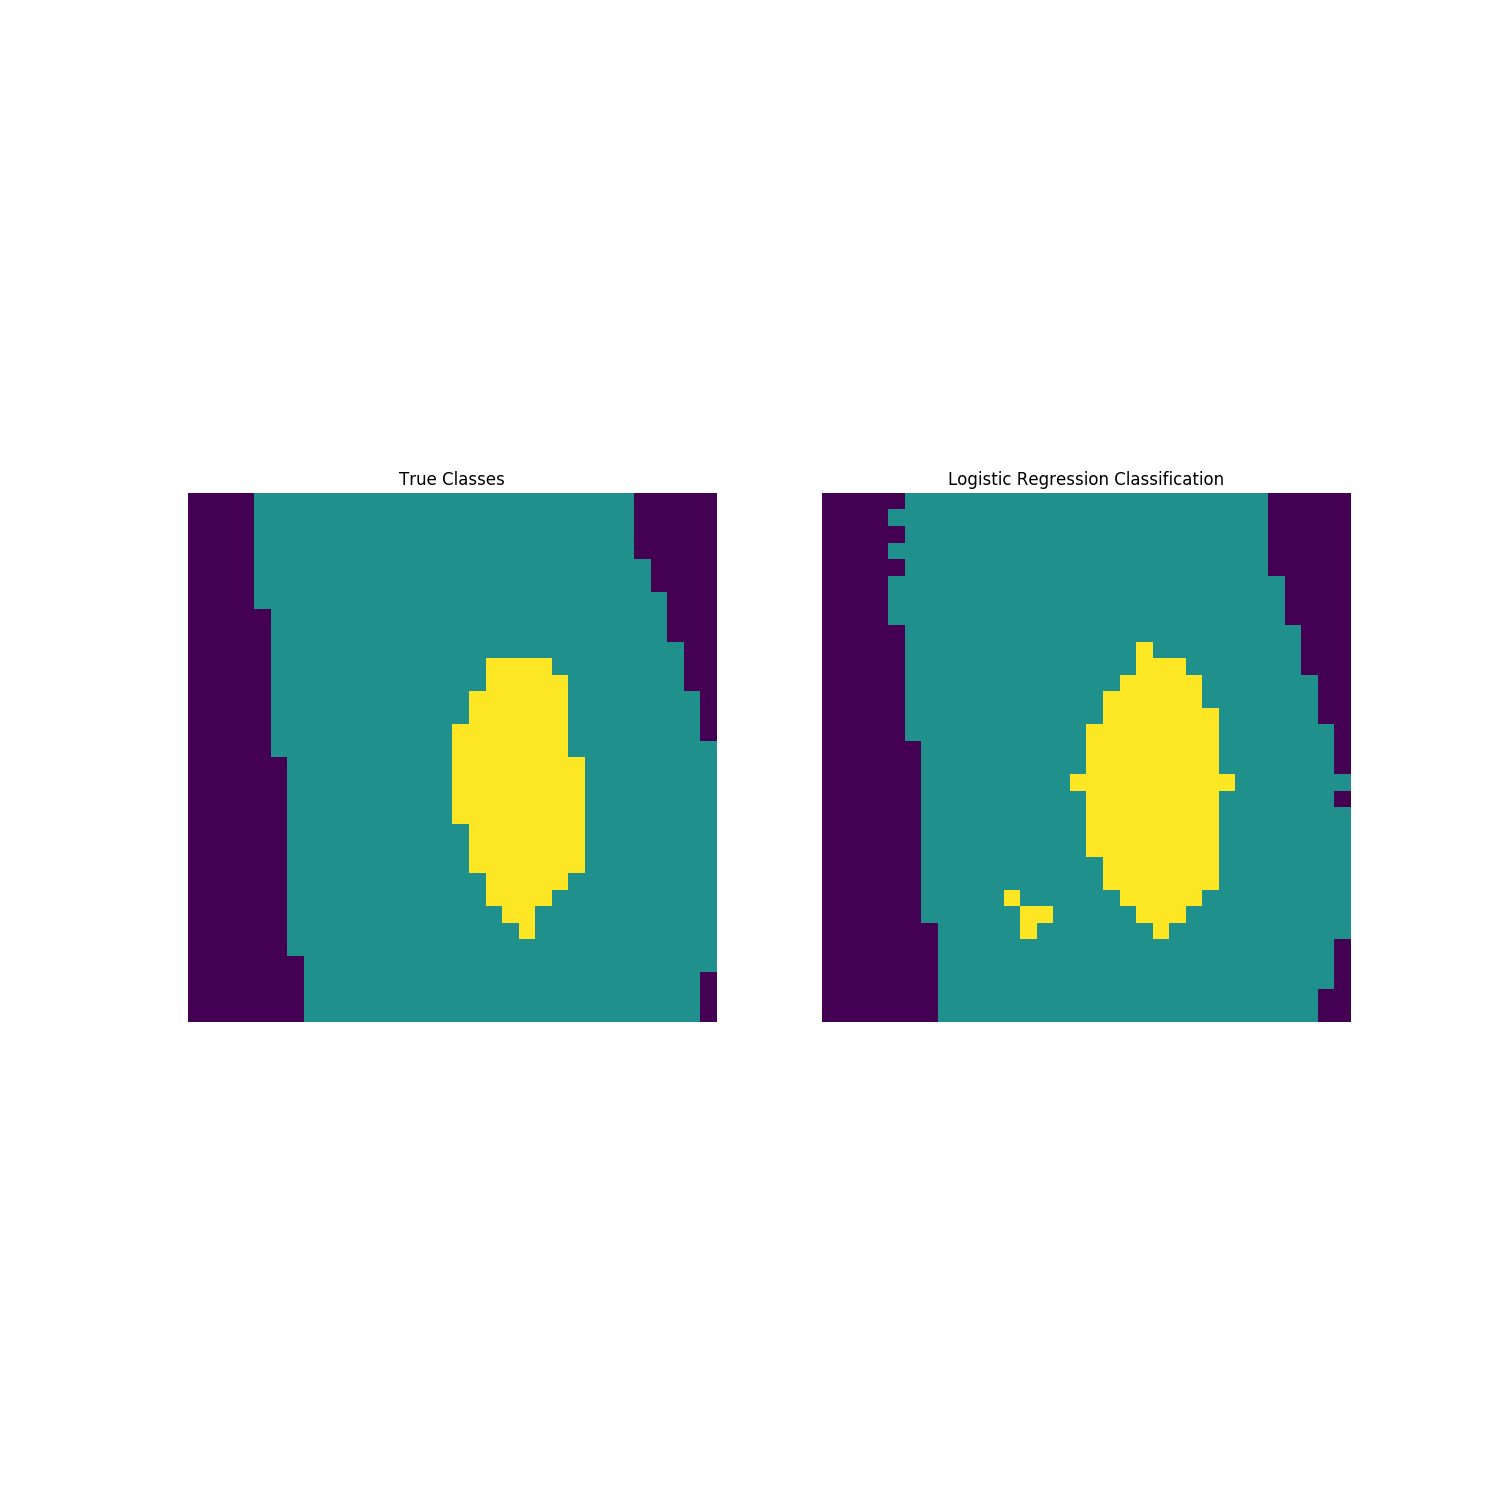

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9793


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


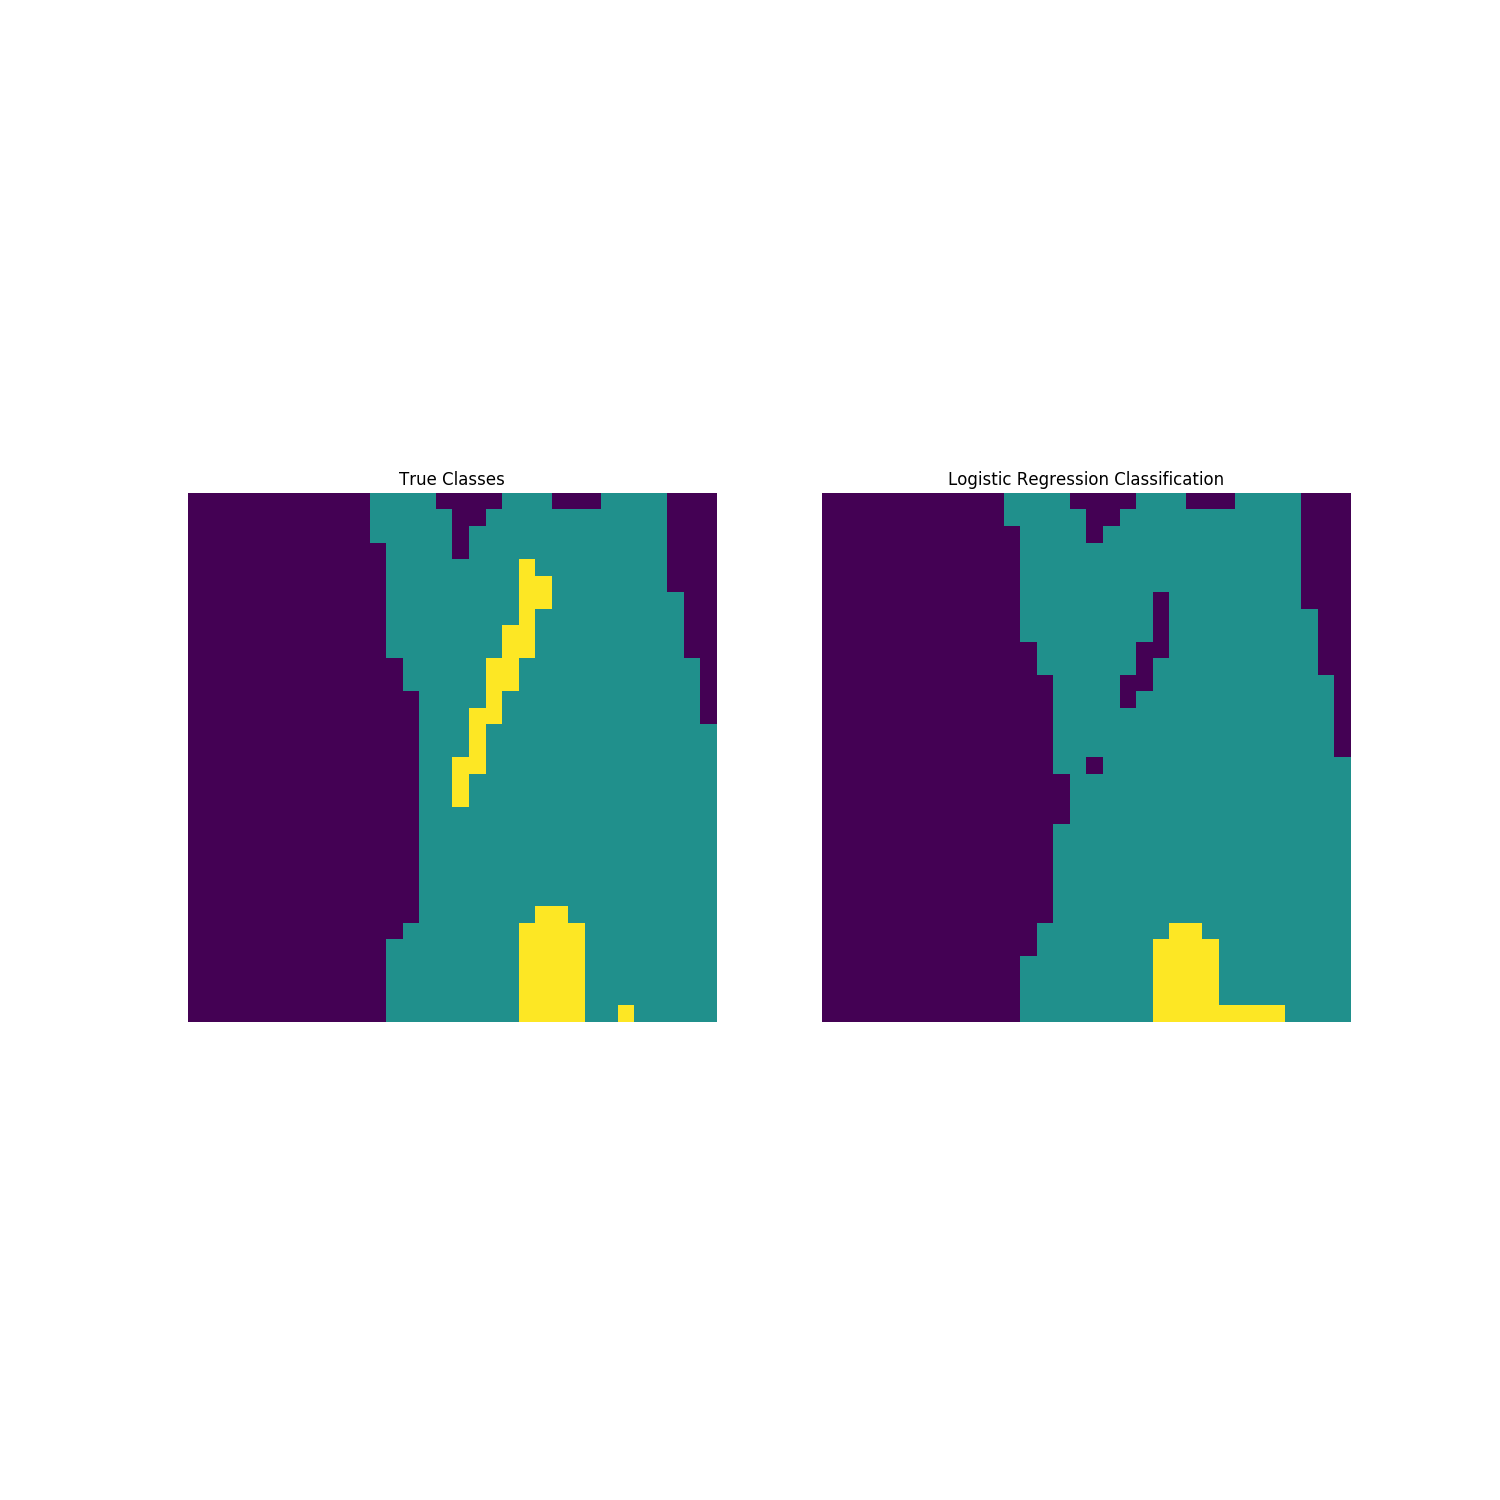

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.6358


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


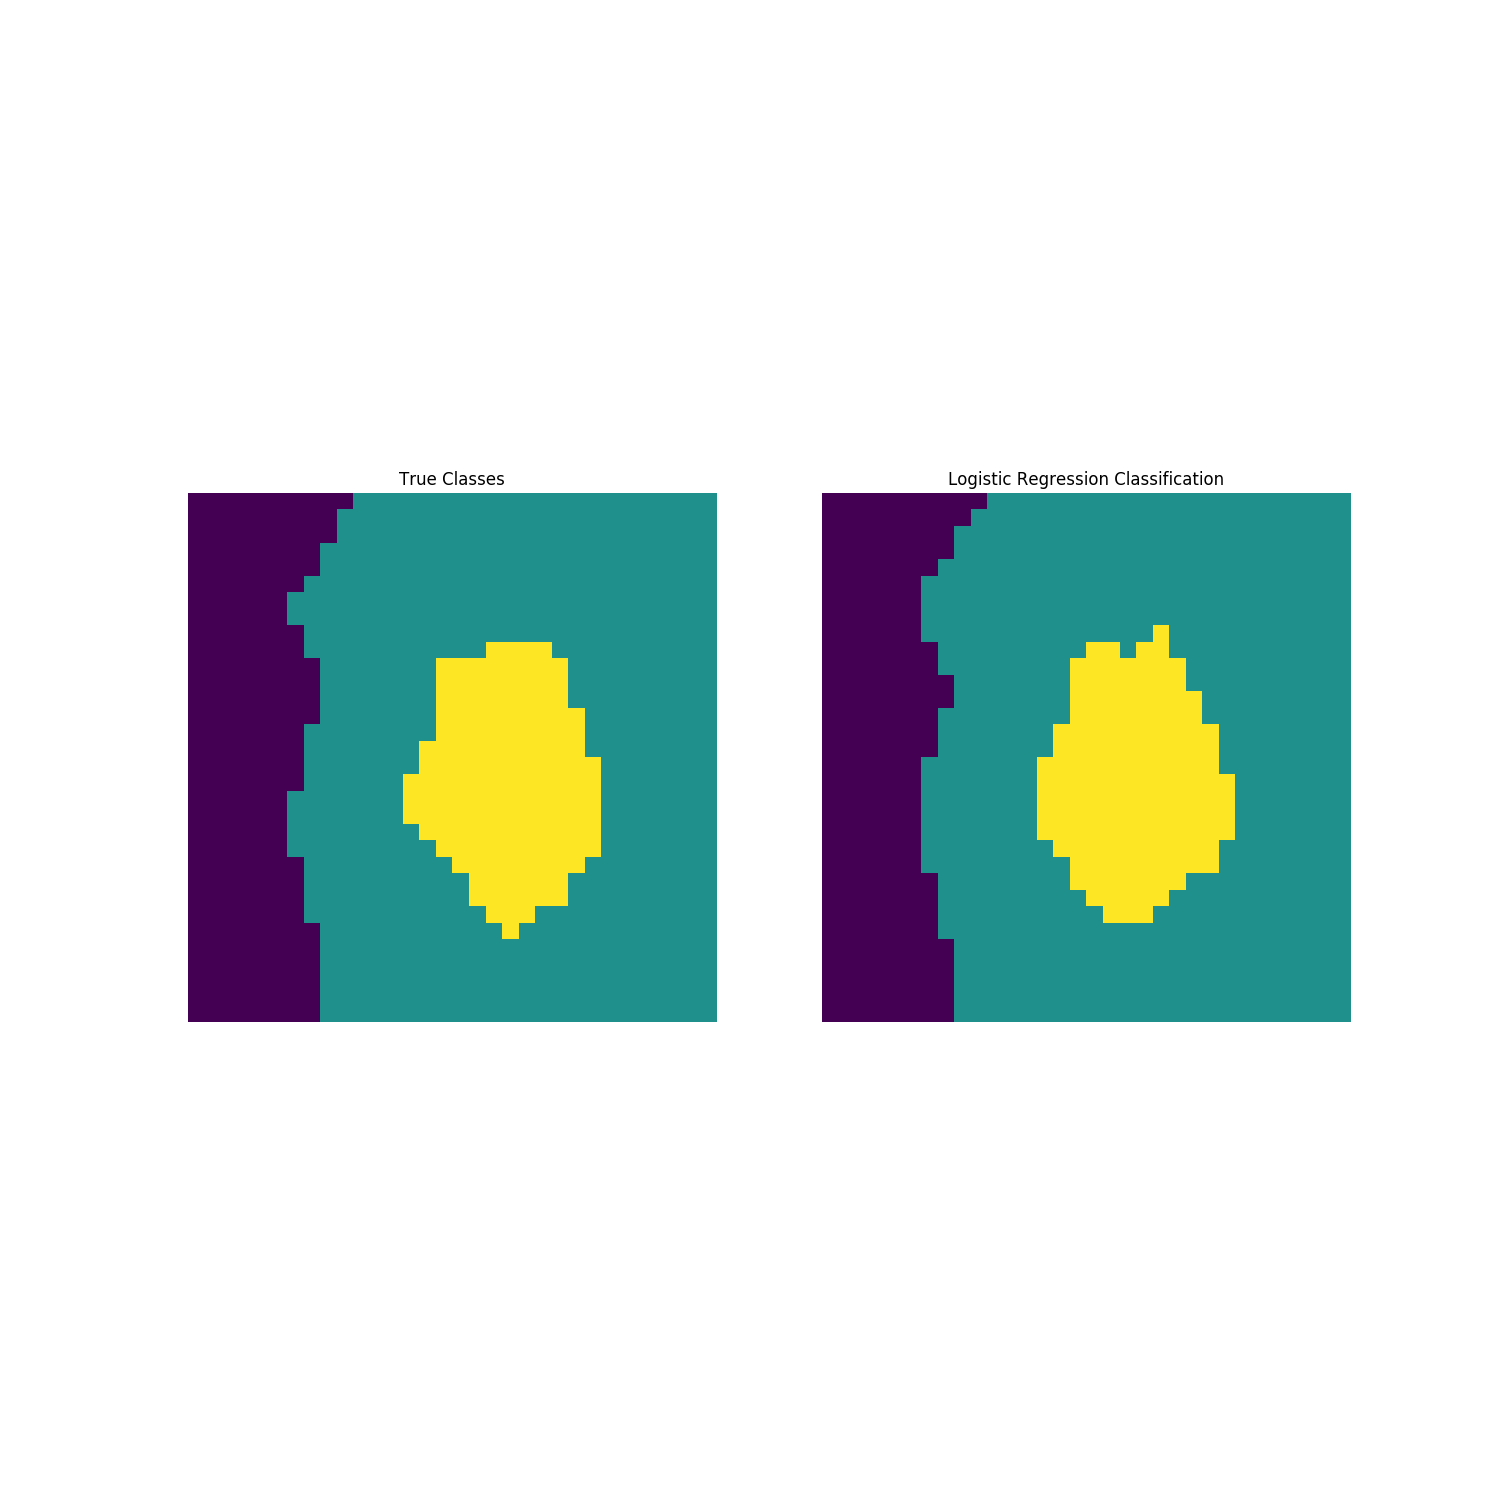

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9300


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


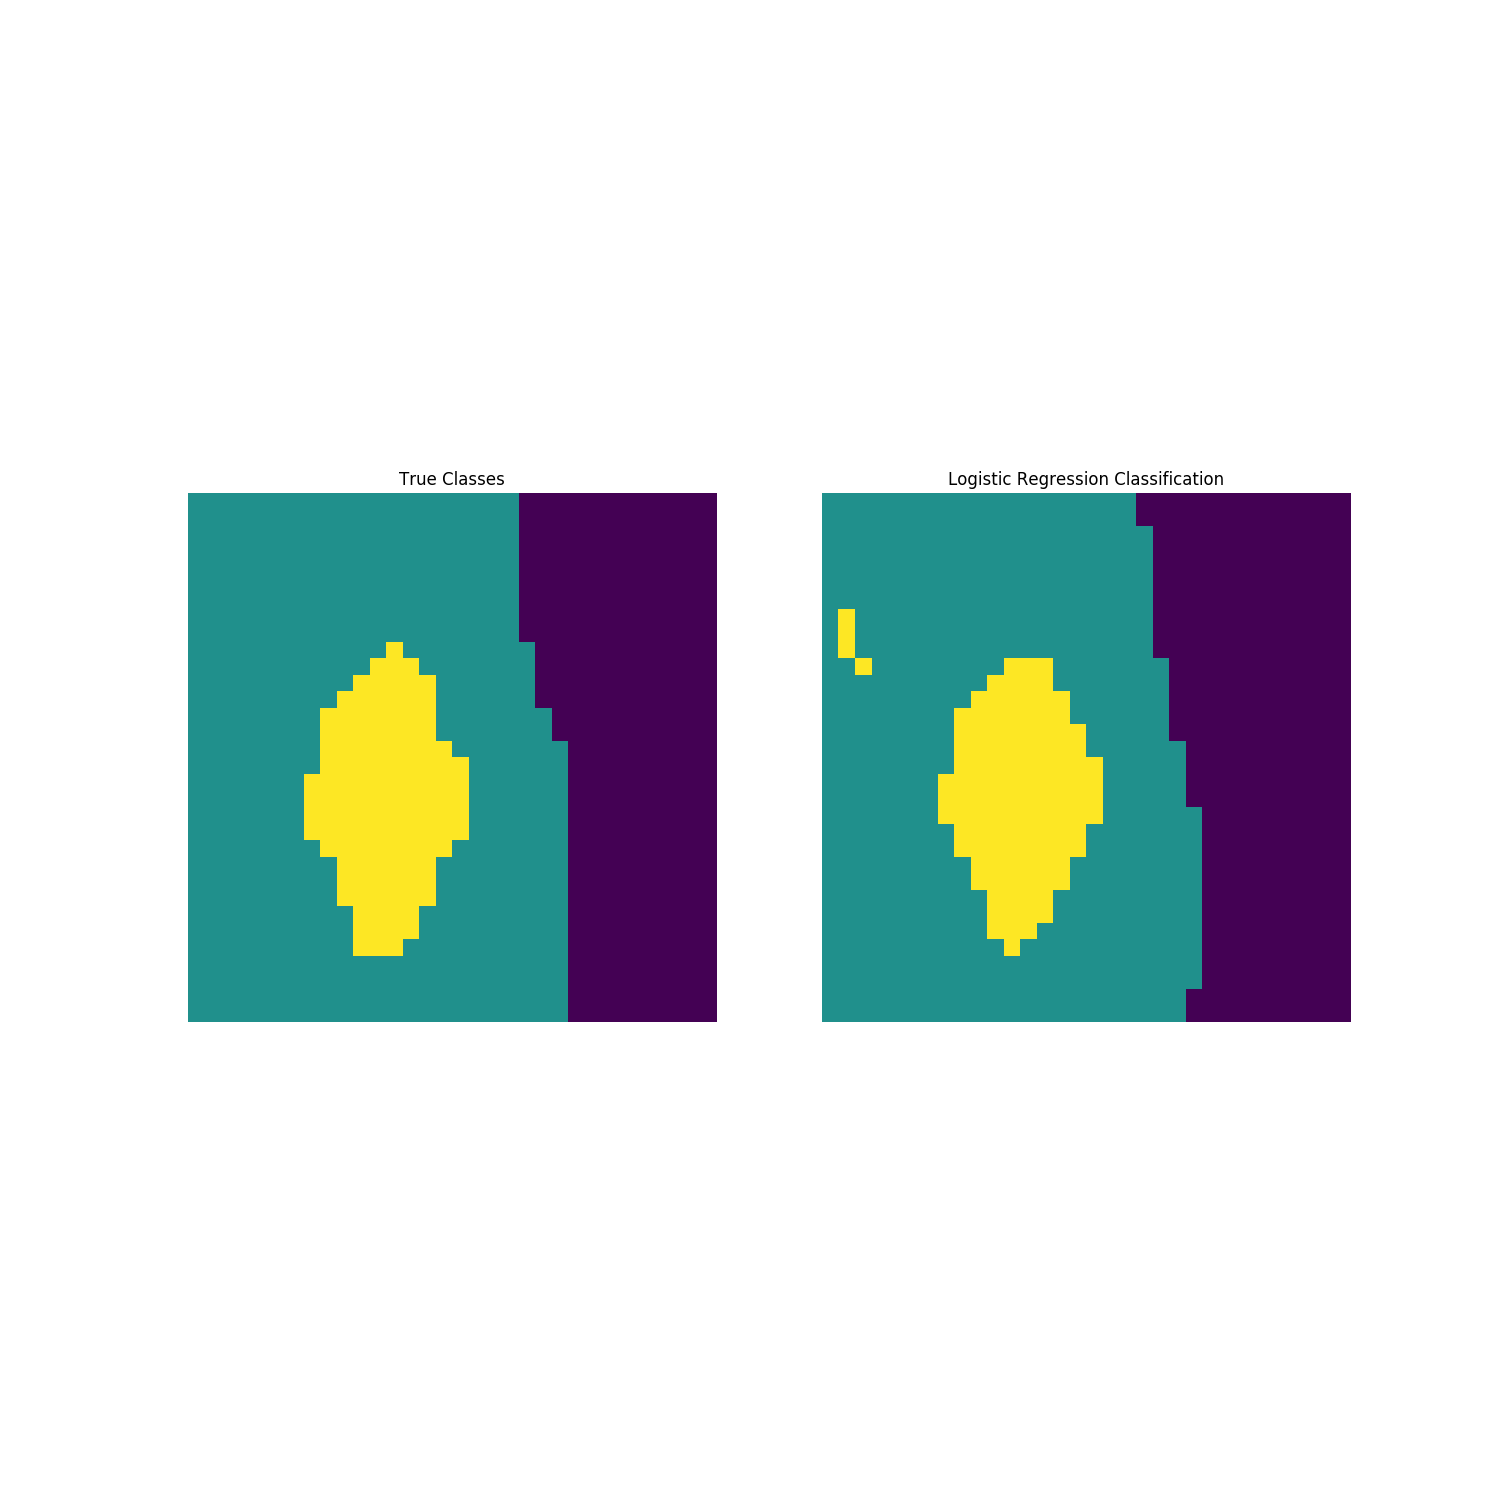

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.9354


/tf/Code/mypackage/Models/ClassicalLearners.py:43: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


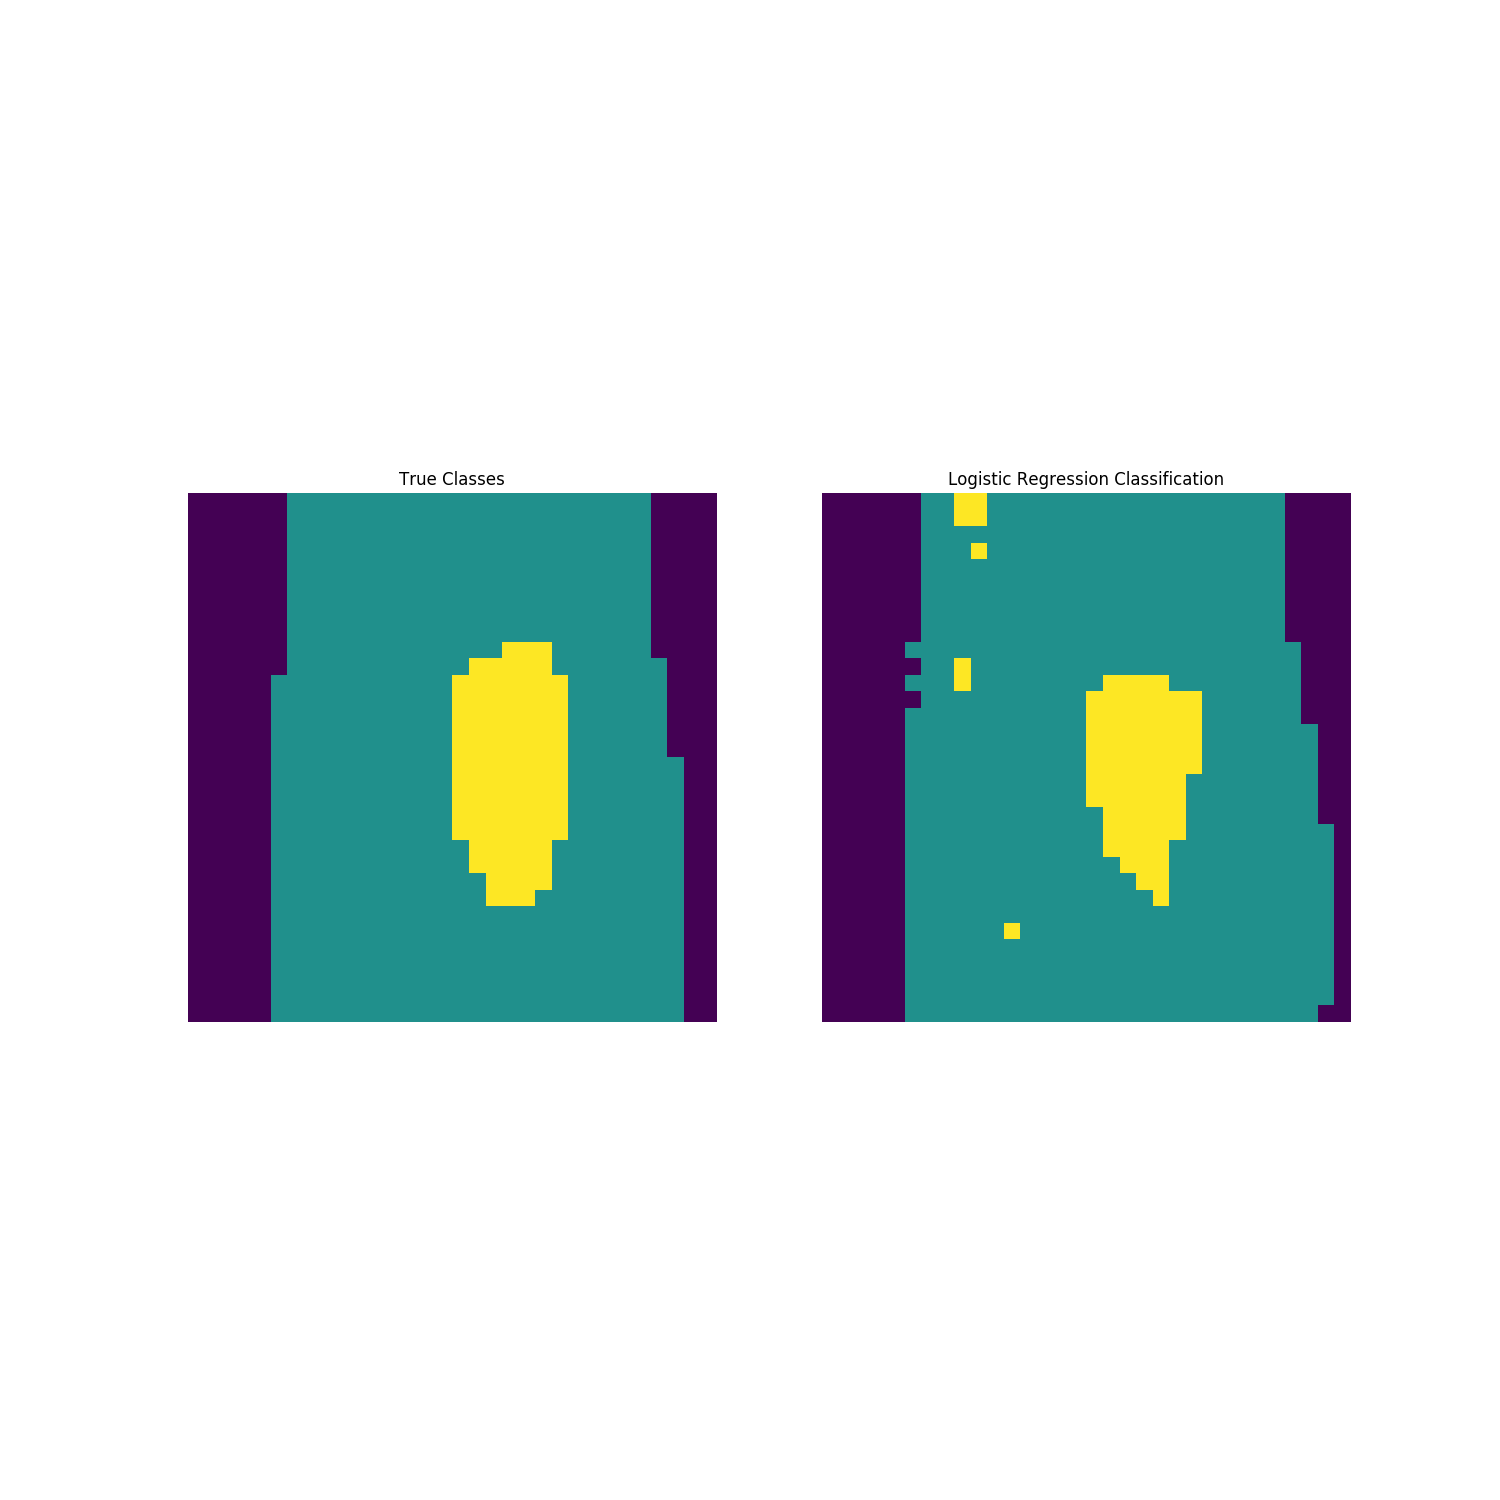

Weighted accuracy_score with weights=[ 0.  1. 20.] gives the score of: 0.8096


In [14]:
log_reg = mypackage.logistic_regression(X_train, Y_train, X_test, Y_test, C=1e5)

In [8]:
from sklearn import preprocessing

X, Y, info, X_rest = mypackage.Dataset.load("data/tomra", only_with_contaminant=True, load_rest=True)
X_rest, X = mypackage.Dataset.scale(X_rest, X, scale='RemoveTrend')
trans = mypackage.StackTransform(X, Y)
trans_rest = mypackage.StackTransform(X_rest)

# Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(trans.X_stack())
X_scaled = scaler.transform(trans.X_stack())
X_scaled = trans.Unstack(X_scaled)

log_reg = mypackage.logistic_regression(X_scaled, Y, X_rest, None, C=1e5, plot=False, metrics=False, max_iter=10000)

In [50]:
# Plot the classification of the rest
# file_list = ['20200213_115743_FM_fillet_repeat_sample_B_26', '20200213_114942_skinside_sample_B_22', '20200213_120225_FM_fillet_repeat_sample_B_35', '20200213_121453_new_FM_fillet_sample_C_32', '20200213_121213_new_FM_fillet_sample_C_27', '20200213_114630_fillet_sample48', '20200213_115538_FM_fillet_repeat_sample_B_21', '20200213_113731_fillet_sample29', '20200213_115916_FM_fillet_repeat_sample_B_29', '20200213_113311_fillet_sample20', '20200213_114007_fillet_sample34', '20200213_114322_fillet_sample40', '20200213_115706_FM_fillet_repeat_sample_B_25', '20200213_114523_fillet_sample45', '20200213_115030_skinside_sample_B_24', '20200213_114347_fillet_sample41', '20200213_115939_FM_fillet_repeat_sample_B_30', '20200213_120912_new_FM_fillet_sample_C_22', '20200213_113854_fillet_sample31', '20200213_114502_fillet_sample44', '20200213_121438_new_FM_fillet_sample_C_31', '20200213_113949_fillet_sample33', '20200213_120821_new_FM_fillet_sample_C_20', '20200213_120956_new_FM_fillet_sample_C_23', '20200213_121142_new_FM_fillet_sample_C_26', '20200213_113459_fillet_sample22', '20200213_114414_fillet_sample42', '20200213_113632_fillet_sample25', '20200213_121354_new_FM_fillet_sample_C_29', '20200213_114648_fillet_sample49', '20200213_115955_FM_fillet_repeat_sample_B_31', '20200213_121023_new_FM_fillet_sample_C_24', '20200213_115559_FM_fillet_repeat_sample_B_22', '20200213_114857_skinside_sample_B_20', '20200213_115118_skinside_sample_B_26', '20200213_120849_new_FM_fillet_sample_C_21', '20200213_113428_fillet_sample21', '20200213_115648_FM_fillet_repeat_sample_B_24', '20200213_113531_fillet_sample23', '20200213_114025_fillet_sample35', '20200213_115808_FM_fillet_repeat_sample_B_27', '20200213_113617_fillet_sample24', '20200213_114052_fillet_sample36', '20200213_115055_skinside_sample_B_25', '20200213_114552_fillet_sample46', '20200213_113705_fillet_sample27', '20200213_115449_FM_fillet_repeat_sample_B_20', '20200213_113719_fillet_sample28', '20200213_115625_FM_fillet_repeat_sample_B_23', '20200213_113826_fillet_sample30', '20200213_115201_skinside_sample_B_27', '20200213_121045_new_FM_fillet_sample_C_25', '20200213_120111_FM_fillet_repeat_sample_B_33', '20200213_114807_fillet_sample50', '20200213_113646_fillet_sample26', '20200213_114922_skinside_sample_B_21', '20200213_121417_new_FM_fillet_sample_C_30', '20200213_113925_fillet_sample32', '20200213_121237_new_FM_fillet_sample_C_28', '20200213_114437_fillet_sample43', '20200213_120158_FM_fillet_repeat_sample_B_34']
# for i, file_name in enumerate(file_list):
#     rest = mypackage.StackTransform(X_rest[i:i+1])
#     X_stacked = rest.X_stack()
#     Y_hat_stacked = log_reg.predict(X_stacked)
#     Y_hat = rest.Unstack(Y_hat_stacked, k=1)

#     plt.figure(figsize=(10, 5))
#     plt.title(file_name)
#     plt.imshow(np.squeeze(Y_hat))
#     plt.imsave(file_name+'.png', np.squeeze(Y_hat))
#     plt.show()

# Test Partial Least Squares - Discriminant Analysis (PLS-DA)

# Setup a ensemble SVM classification

In [1]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
# https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

# from sklearn import model_selection
# from sklearn.ensemble import GradientBoostingClassifier

# train = mypackage.StackTransform(X_train, Y_train)
# test = mypackage.StackTransform(X_test)

# # svc_classifier = svm.SVC(C=1, kernel='rbf', decision_function_shape='ovr')
# # svc_classifier.fit(train.X_stack(), train.Y_stack().ravel())
# # Y_hat = svc_classifier.predict(test.X_stack())
# # Y_hat = test.Unstack(Y_hat, k=1)

# X = train.X_stack()
# Y = train.Y_stack().ravel()
# seed = 7
# num_trees = 100
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# results = model_selection.cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())

# model.fit(train.X_stack(), train.Y_stack().ravel())

# # Y_hat = model.predict(test.X_stack())
# # Y_hat = test.Unstack(Y_hat, k=1)

# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 15))
# plt.subplot(1, 2, 1)
# plt.title("True Classes")
# i = 1
# plt.imshow(np.squeeze(Y_test[i]))
# plt.axis('off')
# plt.subplot(1, 2, 2)
# plt.title("Logistic Regression Classification")
# plt.imshow(np.squeeze(Y_hat[i]))
# plt.axis('off');